<a href="https://colab.research.google.com/github/duel0/mykonos/blob/main/Gruppo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gruppo 4 - The DAC side of the moon**

## Docs:
- [matplotlib](https://matplotlib.org/stable/)
- [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
- ;)

## Import librerie

In [1]:
import pandas as pd
import numpy as np
import sklearn
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import math
from matplotlib.colors import LogNorm, ListedColormap
from matplotlib.ticker import LogLocator, ScalarFormatter
from copy import deepcopy
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Connessione a Google Drive e importazione dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Impostazioni per il dataset e l'ambiente
is_new_dataset = False  # True per il nuovo dataset, False per il vecchio dataset
is_Colab = False  # True se si sta eseguendo su Google Colab, False altrimenti

###########################################################################################################################



if is_new_dataset: # Attenzione: Se si vuole utilizzare il vecchio dataset si deve sostituire LABEL con LABEL_FULL (per tutte le occorrenze)
    LABEL = 'LABEL'
    if is_Colab:
        df = pd.read_parquet('/content/drive/MyDrive/in_sdn_FSCILgroups_fixedDIR_fixedPL_20pkts_6f_net_1024bytes_infsTO_network_class_over_50.parquet') # Nuovo dataset
    else:
        df = pd.read_parquet('in_sdn_FSCILgroups_fixedDIR_fixedPL_20pkts_6f_net_1024bytes_infsTO_network_class_over_50.parquet') # Nuovo dataset

else: # Vecchio dataset
    LABEL = 'LABEL_FULL'
    if is_Colab:
        df = pd.read_parquet('/content/drive/MyDrive/in_sdn_20pkts_6f_net_1024bytes_infsTO_network_class_over_50.parquet') # Vecchio dataset
    else:
        df = pd.read_parquet('in_sdn_20pkts_6f_net_1024bytes_infsTO_network_class_over_50.parquet') # Vecchio dataset


print("\nAnteprima dei dati (prime 10 righe):")
df.head()


Anteprima dei dati (prime 10 righe):


PL  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [60, 60, 52, 539, 52, 52, 52, 52, 52, 52, 52, ...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [60, 60, 52, 56, 52, 1500, 52, 1500, 52, 1500,...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...                           [82, 44, 44, 44, 44, 44]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...                           [82, 44, 44, 44, 44, 44]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                                   [82, 44, 44, 44]   

                                                                                                  IAT  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [0, 45, 1268, 113, 21, 10101963, 17, 10241293,...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [0, 10237, 23, 9050, 13, 4352, 10, 58, 5, 48, ...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...      [0, 70, 3992308, 5999852, 12199941, 24000545]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...      [0, 28, 4391754, 5999959, 12000697, 24199353]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                          [0, 86, 3188545, 5999748]   

                                                                                                  DIR  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....            [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...                                 [0, 1, 1, 1, 1, 1]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...                                 [0, 1, 1, 1, 1, 1]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                                       [0, 1, 1, 1]   

                                                                                                  WIN  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [64240, 28960, 502, 502, 59, 502, 59, 502, 59,...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [29200, 65160, 58, 510, 58, 510, 63, 510, 69, ...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...                 [64, 5840, 5840, 5840, 5840, 5840]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...                 [64, 5840, 5840, 5840, 5840, 5840]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                             [64, 5840, 5840, 5840]   

                                                                                                  FLG  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [2, 18, 16, 24, 16, 16, 16, 16, 16, 16, 16, 16...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [2, 18, 16, 24, 16, 16, 16, 16, 16, 16, 16, 16...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...                            [2, 18, 18, 18, 18, 18]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...                            [2, 18, 18, 18, 18, 18]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                                    [2, 18, 18, 18]   

                                                                                                  TTL  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [63, 64, 63, 63, 64, 63, 64, 63, 64, 63, 64, 6...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [64, 63, 64, 63, 64, 63, 64, 63, 64, 63, 64, 6...   
20.45.208.153,1414,192.168.3.130,80,6_157863371...                           [63, 64, 64, 64, 64, 64]   
41.43.55.199,1415,192.168.3.130,80,6_1578633713...                           [63, 64, 64, 64, 64, 64]   
31.17.205.59,1417,192.168.3.130,80,6_1578633713...                                   [63, 64, 64, 64]   

                                                                                                  NET  \
200.175.2.130,47278,172.17.0.2,80,6_1577311772....  [69, 0, 0, 60, 125, 252, 64, 0, 63, 6, 70, 123...   
172.17.0.2,42850,200.175.2.130,11000,6_15773117...  [69, 0, 0, 60, 12, 142, 64, 0, 64, 6, 182, 233...  

In [ ]:
for i in df.index.str.contains('41.43.55.199'):
  if i == True:
    print(i)

True


## Verifica GPU

In [ ]:
print("Num GPUs Available: ", torch.cuda.device_count())

Num GPUs Available:  1


## Overview Dataset

**Tabella features:**

| Colonna   | Significato                                                                 |
|-----------|-----------------------------------------------------------------------------|
| **PL**    | Payload Length – lunghezza del payload del pacchetto (in byte).              |
| **IAT**   | Inter-Arrival Time – tempo tra l’arrivo di un pacchetto e il successivo.   |
| **DIR**   | Direction – direzione del pacchetto (0 = entrata, 1 = uscita, ecc.).         |
| **WIN**   | Window Size – dimensione della finestra TCP (flow control).                 |
| **FLG**   | Flags – flag TCP codificati (es. SYN, ACK, FIN, ecc. in forma numerica).    |
| **TTL**   | Time To Live – numero di hop residui (metrica tipica del layer IP).          |
| **NET**   | Network distance – distanza (in hop o IP mask) della sorgente dal target.    |
| **NET-OBF** | Network obfuscation – misura di offuscamento (es. NAT, spoofing IP).       |
| **FEAT_PAD**| Feature Padding – valori riempitivi se mancano pacchetti (padding feature-level).|
| **LOAD_PAD**| Load Padding – padding sulla lunghezza dei pacchetti (es. per mascherare).   |



In [ ]:
# Stampa informazioni aggiuntive sul file
print(f"- Numero di righe: {df.shape[0]}")
print(f"- Numero di colonne: {df.shape[1]}")
print("- Schema delle colonne:")
print(df.dtypes)

- Numero di righe: 225608
- Numero di colonne: 14
- Schema delle colonne:
PL           object
IAT          object
DIR          object
WIN          object
FLG          object
TTL          object
NET          object
NET-OBF      object
LABEL-cat    object
LABEL-bin     int64
LABEL        object
FEAT_PAD      int64
LOAD_PAD      int64
Filename     object
dtype: object


| **Etichetta**     | **Tipo di Attacco**         | **Descrizione**                                                                                                                                         | **Metodo di Simulazione nel dataset inSDN**                                                                                       |
|-------------------|-----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| DDoS_icmp         | DDoS (ICMP Flood)           | Attacco distribuito che invia un alto volume di pacchetti ICMP Echo Request per saturare la banda o la CPU del bersaglio.                               | Generato utilizzando più host compromessi che inviano pacchetti ICMP Echo Request simultaneamente verso il bersaglio.             |
| Probe             | Scansione di rete           | Attività di ricognizione per identificare porte aperte o servizi attivi su host target.                                                                 | Eseguito con strumenti come `nmap` per effettuare port scanning attivo e passivo su vari host nella rete.                         |
| Normal            | Traffico legittimo          | Traffico di rete normale e benigno, inclusi accessi a servizi comuni come HTTP, HTTPS, DNS, Email, FTP e SSH.                                           | Generato da utenti legittimi o script che simulano attività quotidiane su vari servizi di rete.                                  |
| DoS_hulk          | DoS (HTTP Flood - HULK)     | Attacco che invia un gran numero di richieste HTTP uniche e dinamiche (per evitare meccanismi di caching e mitigazioni) per saturare le risorse del server web.                                                       | `HULK` e `torshammer tools`.             |
| DoS_http          | DoS (HTTP Flood)            | Invio massivo di richieste HTTP GET/POST per sovraccaricare il server web.                                                                              | Eseguito con strumenti come `slowhttptest` o script personalizzati per inviare richieste HTTP in loop continuo.                   |
| BFA               | Brute Force Attack          | Tentativi ripetuti di accesso a servizi protetti (es. SSH, FTP) utilizzando combinazioni di username e password.                                        | Eseguito con strumenti come `Hydra` o la `Burp Suite` per effettuare tentativi di login automatizzati su servizi target.                 |
| DDoS_syn          | DDoS (SYN Flood)            | Attacco distribuito che invia pacchetti TCP SYN senza completare l'handshake, esaurendo le risorse del server.                                          | Generato da più host che inviano pacchetti TCP SYN con IP spoofed verso il server, senza completare l'handshake.                 |
| DoS_syn           | DoS (SYN Flood)             | Simile al DDoS_syn, ma l'attacco proviene da una singola sorgente.                                                                                      | Inviati pacchetti TCP SYN con IP spoofed da un singolo host verso il server target.                                               |
| DoS_slowloris     | DoS (Slowloris)             | Mantiene aperte molte connessioni HTTP incomplete per esaurire le risorse del server.                                                                   | Con `Slowloris`, che invia intestazioni HTTP incomplete a intervalli regolari per mantenere le connessioni aperte.   |
| Web-Attack        | Attacco Web generico        | Include attacchi come XSS, SQL injection, path traversal, ecc.                                                                                          | Realizzato tramite strumenti automatici come OWASP ZAP o SQLMap per eseguire vari attacchi web su applicazioni vulnerabili.      |
| BOTNET (OLD)            | Traffico da botnet          | Rappresenta il traffico generato da dispositivi compromessi che comunicano con server di comando e controllo (C&C). L'intrusore può controllare diversi dispositivi "infetti" per rubare informazioni, lanciare attacchi DDoS ecc...                                      | Simulato generando traffico tipico di botnet, inclusi comandi C&C, scansioni di rete e attacchi coordinati. Ci sono due host infetti (h1 e h2) ed un attaccante con il tool `Ares` da una macchina Kali.                        |
| DoS_udp           | DoS (UDP Flood)             | Invio massivo di pacchetti UDP a porte casuali per saturare le risorse del server.                                                                      | Generato con script che inviano pacchetti UDP con payload casuali verso porte random del server target.                           |

In [ ]:
print(df[LABEL].value_counts())
print("\n")

LABEL
DDoS_icmp        121331
Probe             60332
Normal            23532
DoS_hulk          13033
DoS_http           5198
BFA                 939
DDoS_syn            500
DoS_syn             362
DoS_slowloris       240
Web-Attack           91
DoS_udp              50
Name: count, dtype: int64




## Distribuzione delle classi


/tmp/ipython-input-9-4038898001.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-9-4038898001.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


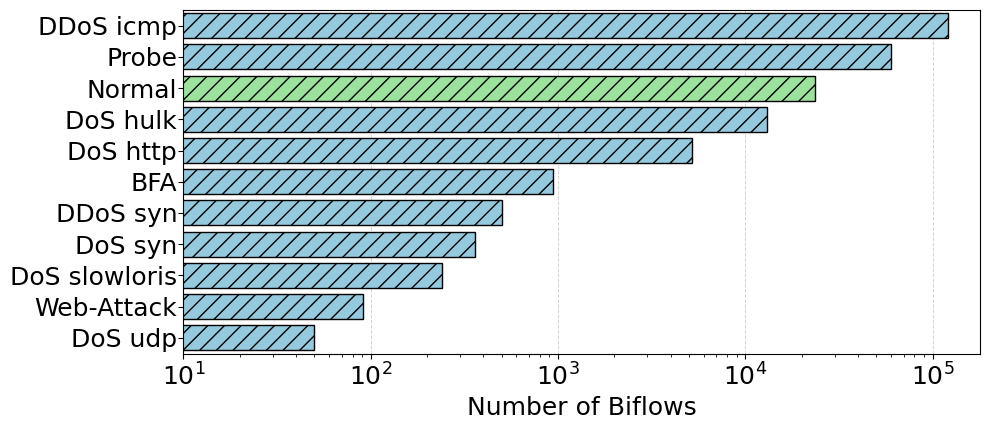

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

# Conta le occorrenze delle etichette
label_counts = df[LABEL].value_counts()
max_count = label_counts.max()
min_count = label_counts.min()

# Altezza proporzionale al numero di classi
fig_height = max(2, 0.40 * len(label_counts))

fig, ax = plt.subplots(1, 1, figsize=(10, fig_height))


# Dizionario palette per personalizzare solo la classe "Normal"
palette_custom = {label: "lightgreen" if label == "Normal" else "skyblue" if is_new_dataset else "orange"
                  for label in label_counts.index}

# Countplot
sns.countplot(
    y=LABEL,
    data=df,
    order=label_counts.index,
    ax=ax,
    hatch="//",
    edgecolor="black",
    palette=palette_custom
)

# Etichette più vicine all’asse Y
ax.tick_params(axis='y', pad=1)

# Sostituzione degli underscore con trattini nelle etichette dell'asse Y
ytick_labels = [label.get_text().replace('_', ' ') for label in ax.get_yticklabels()]
ax.set_yticklabels(ytick_labels)

# Aumenta dimensione font delle etichette sull'asse Y
ax.tick_params(axis='y', labelsize=18)  # Font più grande per yticklabel

# Aumenta dimensione font delle etichette sull'asse X
ax.tick_params(axis='x', labelsize=18)  # Font più grande per xticklabel

# Etichetta asse X
ax.set_xlabel("Number of Biflows", fontsize=18)
ax.set_ylabel("")

# Scala logaritmica
ax.set_xscale('log', base=10)

# Tick principali log
log_ticks = [10, 100, 1000, 10000, 100000]
ax.set_xticks(log_ticks)

# Linee verticali in corrispondenza dei tick principali
for tick in log_ticks:
    ax.axvline(tick, color='lightgray', linestyle='--', lw=0.7, zorder=0)


ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig("class_distribution.pdf", format="pdf")
plt.show()

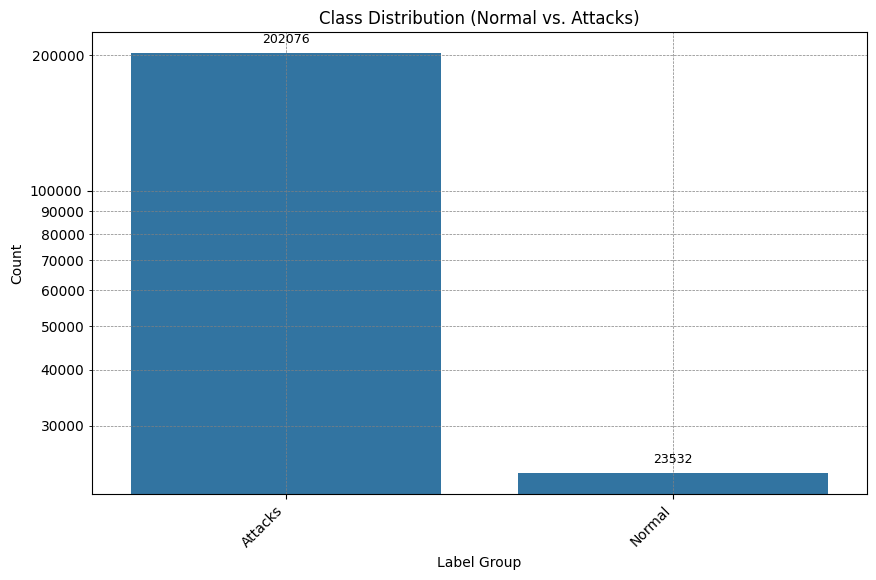

Total: 225608
Normal: 23532 (10.43%)
Attacks: 202076 (89.57%)


In [ ]:
df['LABEL_GROUP'] = df['LABEL-bin'].map({0: 'Normal', 1: 'Attacks'})

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='LABEL_GROUP', data=df, order=df['LABEL_GROUP'].value_counts().index)
plt.title('Class Distribution (Normal vs. Attacks)')
plt.xlabel('Label Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.yscale('log', base=10)

# Ticks asse y in scala logaritmica
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(ScalarFormatter())

# Griglia
plt.grid(ls='--', lw=0.5, c='grey', which='both')

# Etichette sopra le barre (valori interi)
for container in ax.containers:
    for bar in container:
        height = int(bar.get_height())
        ax.annotate(f'{height:}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

# Salvataggio e visualizzazione
plt.savefig('class_distribution_normal_vs_others.png')
plt.show()

# Statistiche
total_count = len(df)
normal_count = len(df[df['LABEL_GROUP'] == 'Normal'])
attack_count = total_count - normal_count

print(f"Total: {total_count}")
print(f"Normal: {normal_count} ({normal_count / total_count * 100:.2f}%)")
print(f"Attacks: {attack_count} ({attack_count / total_count * 100:.2f}%)")


## Boxplots

/tmp/ipython-input-5-3236577645.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


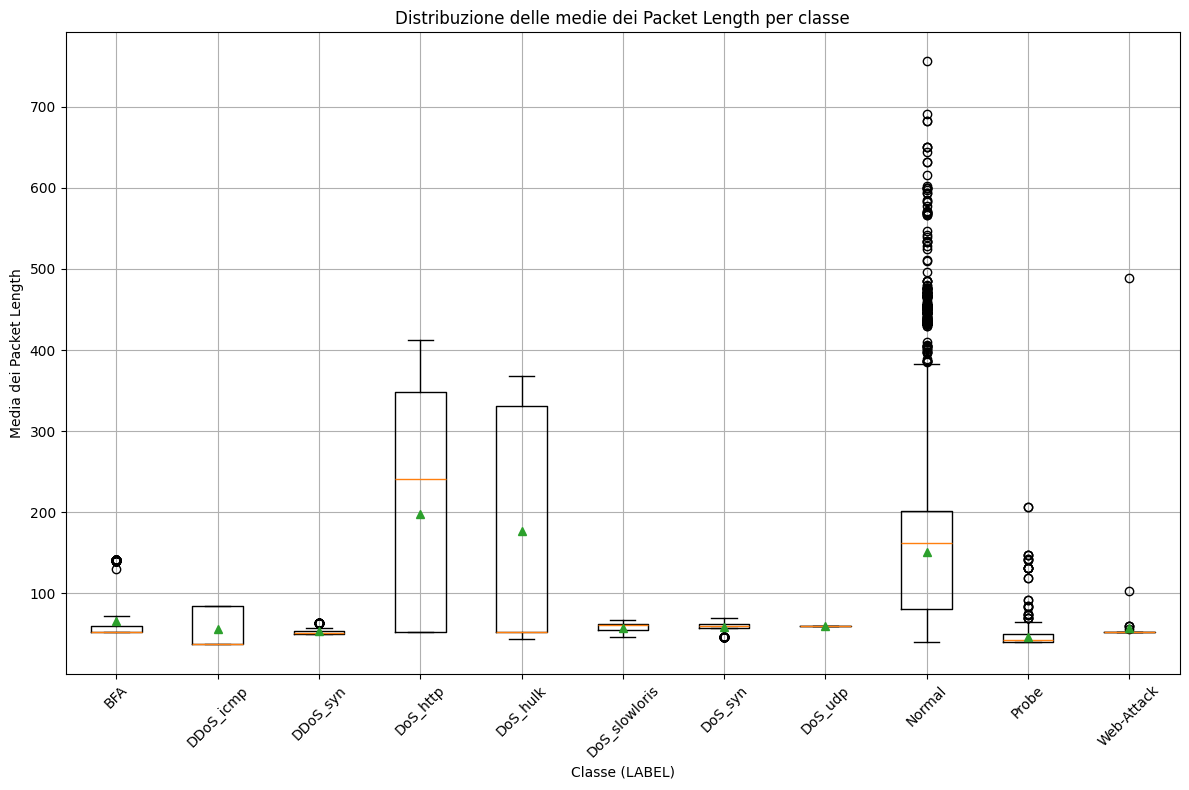

/tmp/ipython-input-5-3236577645.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


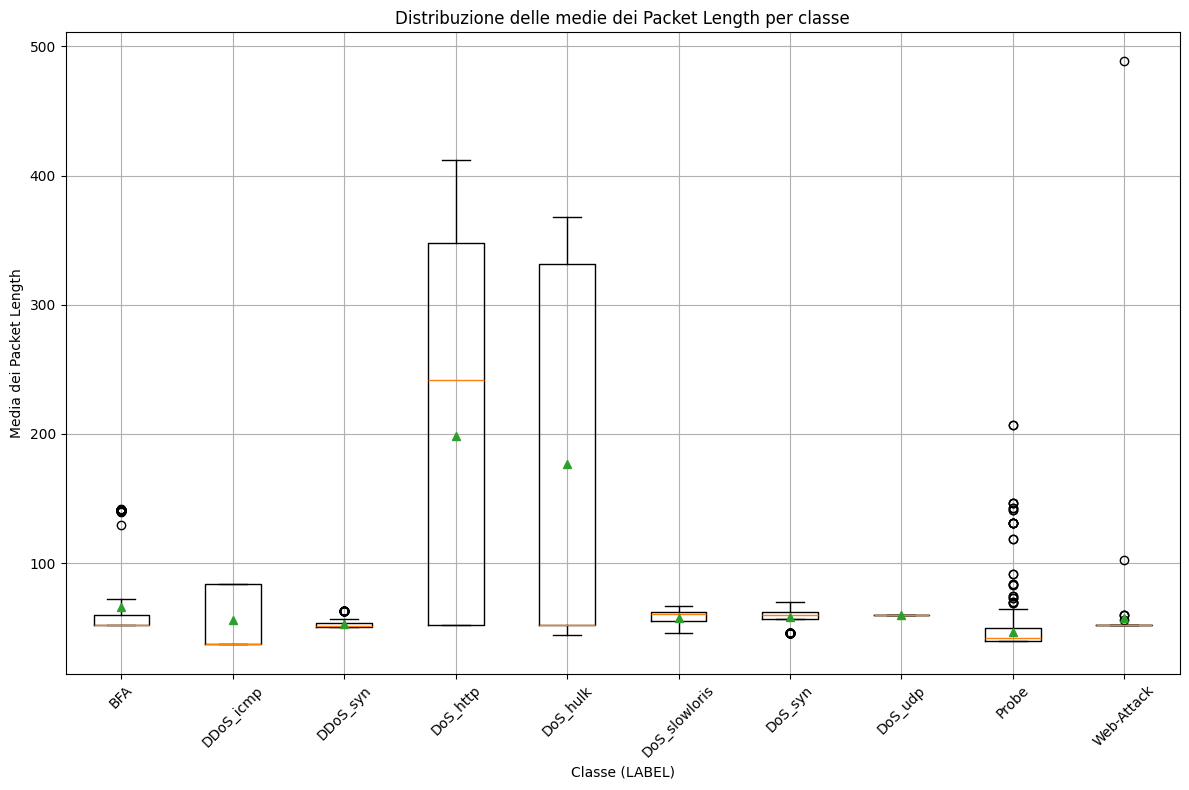

In [ ]:
def preprocess_packet_lengths(df, max_length=20):
    """
    Preprocessa la colonna 'PL' per garantire che ogni array abbia esattamente max_length elementi.
    Riempie con NaN se l'array è più corto.
    """
    def pad_or_truncate(pl_array):
        # Converte l'array in float per supportare NaN
        pl_array = np.array(pl_array, dtype=float)
        if len(pl_array) > max_length: #Se più lungo tronco a 20
            return pl_array[:max_length]
        else: #Se più corto fillo con NaN
            return np.pad(pl_array, (0, max_length - len(pl_array)), constant_values=np.nan)

    df['PL_processed'] = df['PL'].apply(pad_or_truncate)
    return df

def calculate_mean_packet_lengths(df, pl_column='PL_processed'):
    """
    Calcola la media dei packet length per ogni riga.
    """
    df['PL_mean'] = df[pl_column].apply(np.nanmean)  # Calcola la media ignorando i NaN
    return df

def create_boxplots(df, label_column=LABEL, mean_column='PL_mean', nome = ''):
    """
    Crea un unico boxplot per la distribuzione delle medie dei packet length,
    con ogni classe (LABEL) sull'asse X.
    """
    # Raggruppa i dati per LABEL e raccogli le medie
    grouped = df.groupby(label_column)[mean_column].apply(list)

    # Prepara i dati per il boxplot
    labels = grouped.index.tolist()
    data = grouped.tolist()

    # Crea il boxplot
    plt.figure(figsize=(12, 8))
    plt.boxplot(data, labels=labels, showmeans=True)
    plt.title("Distribuzione delle medie dei Packet Length per classe")
    plt.xlabel("Classe (LABEL)")
    plt.ylabel("Media dei Packet Length")
    plt.xticks(rotation=45)  # Ruota le etichette sull'asse X per leggibilità
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(nome+'.png')
    plt.show()


def boxplotta(df, nome):
    df = preprocess_packet_lengths(df)

    # Calcola la media dei packet length
    df = calculate_mean_packet_lengths(df)



    # Crea i boxplot
    create_boxplots(df, nome = nome)

df['PL'] = df['PL'].apply(lambda x: x[:10])
boxplotta(df, 'boxplot')

df_normaldrop = df.drop(df[df[LABEL] == 'Normal'].index)
boxplotta(df_normaldrop, 'boxplot_no_normal')

## Heatmaps


Elaborazione feature: PL...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per PL: min=44.0, max=1414.2543527630583


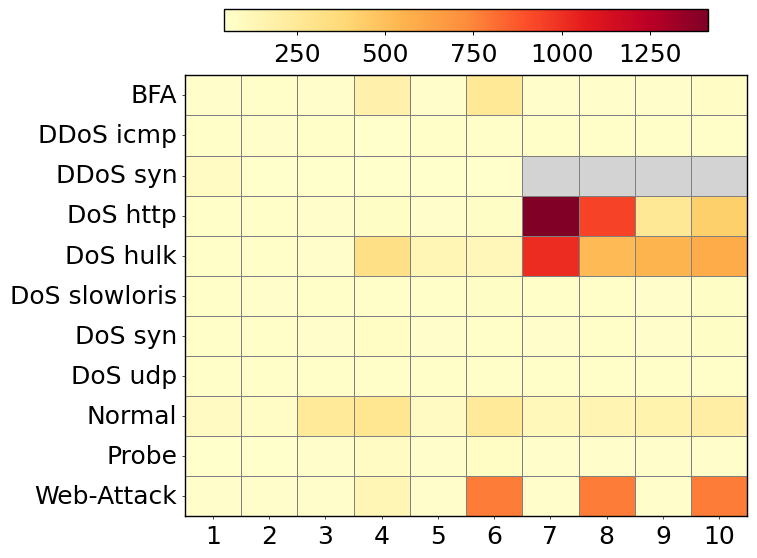

Heatmap salvata per PL in:
→PDF: heatmaps/heatmap_PL.pdf

Elaborazione feature: IAT...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per IAT: min=0.0, max=24098511.40625


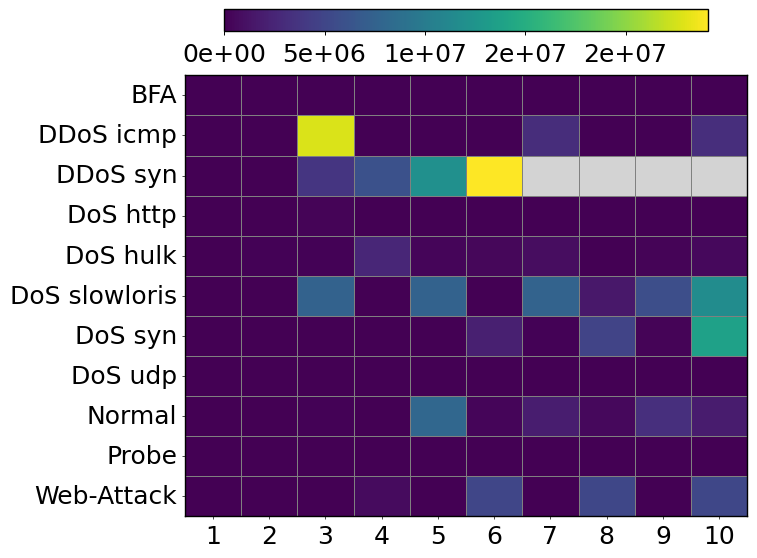

Heatmap salvata per IAT in:
→PDF: heatmaps/heatmap_IAT.pdf

Elaborazione feature: DIR...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per DIR: min=0.0, max=1.0


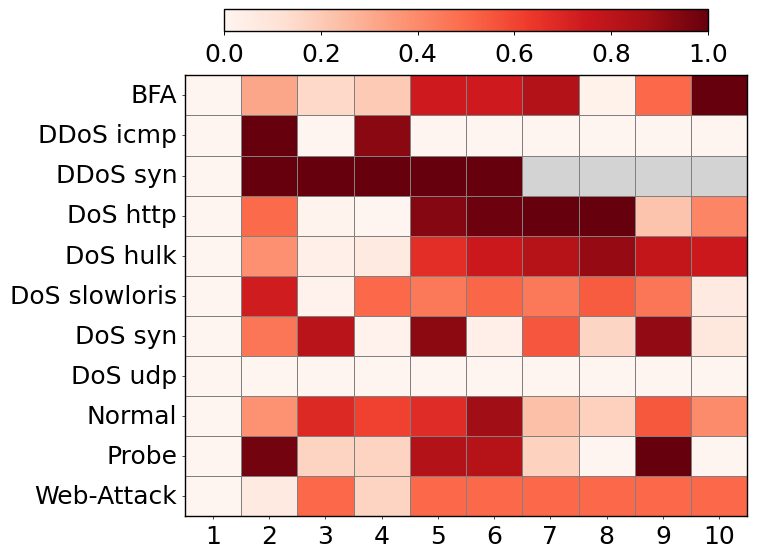

Heatmap salvata per DIR in:
→PDF: heatmaps/heatmap_DIR.pdf

Elaborazione feature: WIN...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per WIN: min=-1.0, max=61962.467398648645


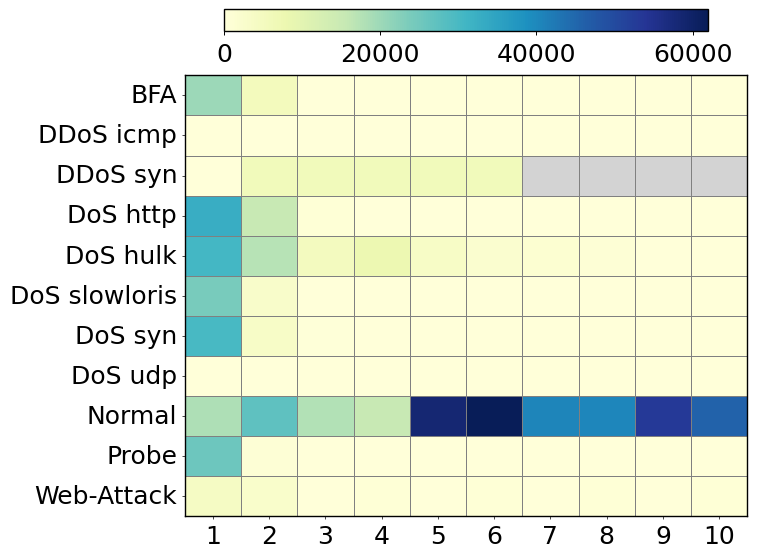

Heatmap salvata per WIN in:
→PDF: heatmaps/heatmap_WIN.pdf

Elaborazione feature: FLG...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per FLG: min=-1.0, max=24.540499621498864


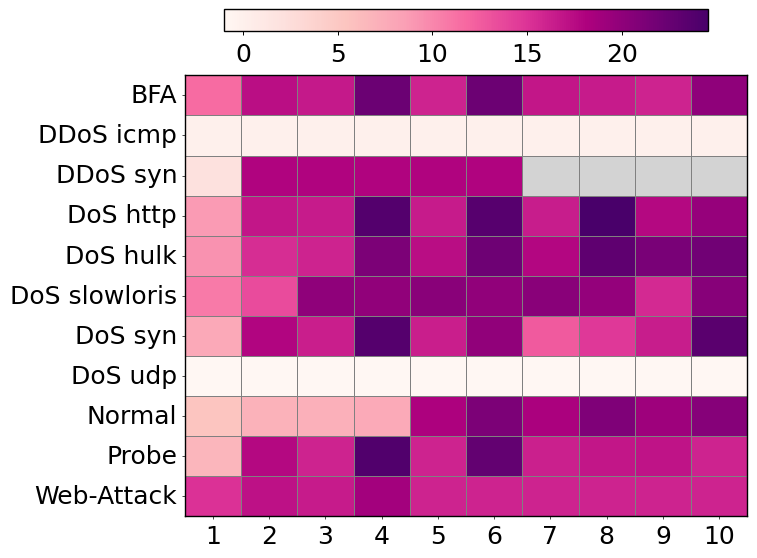

Heatmap salvata per FLG in:
→PDF: heatmaps/heatmap_FLG.pdf

Elaborazione feature: TTL...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per TTL: min=52.80202877411656, max=120.31097972972972


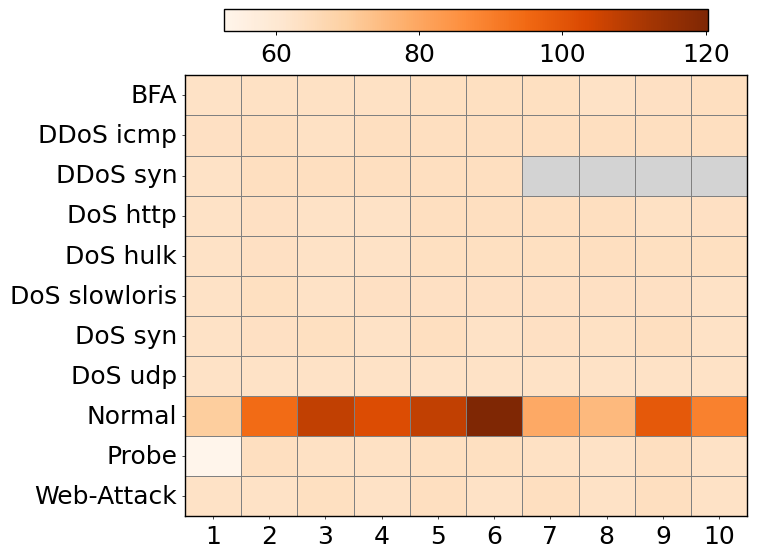

Heatmap salvata per TTL in:
→PDF: heatmaps/heatmap_TTL.pdf

Elaborazione feature: NET...
Range valori per NET: min=0.0, max=189.84


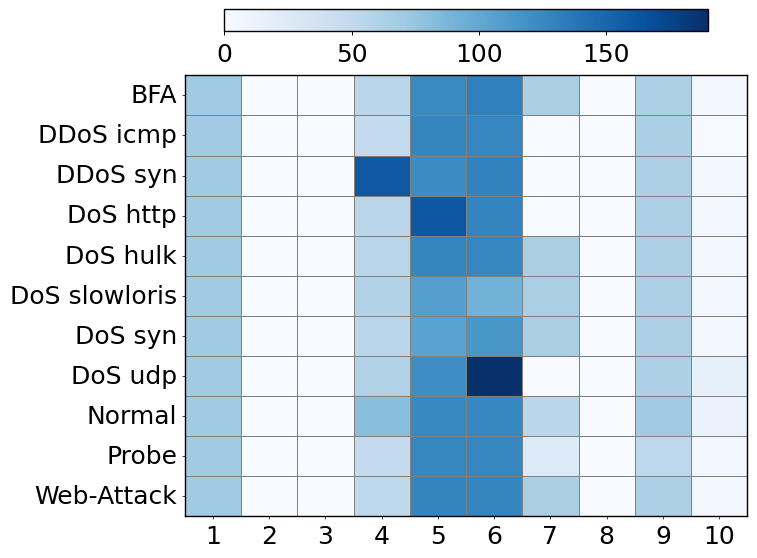

Heatmap salvata per NET in:
→PDF: heatmaps/heatmap_NET.pdf

Elaborazione feature: NET-OBF...
Range valori per NET-OBF: min=0.0, max=189.84


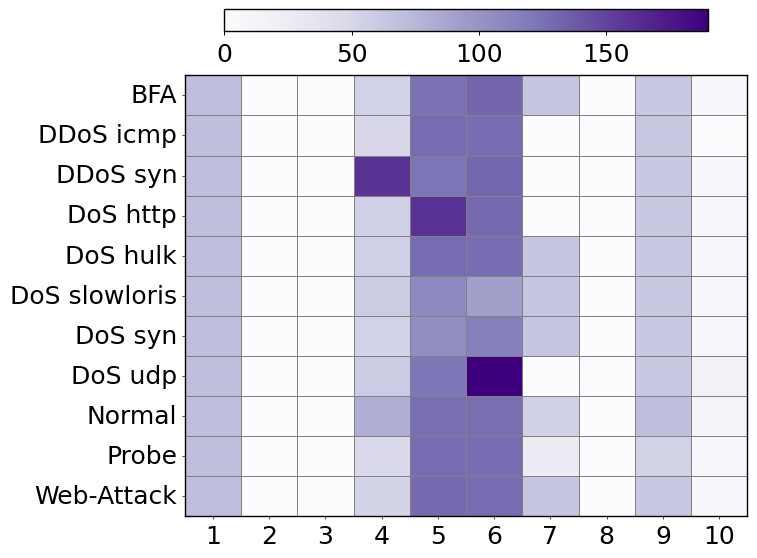

Heatmap salvata per NET-OBF in:
→PDF: heatmaps/heatmap_NET-OBF.pdf

Elaborazione feature: FEAT_PAD...
Attenzione: La colonna 'FEAT_PAD' non sembra contenere array/liste. Contiene: <class 'numpy.int64'>. Salto.
Assicurati che le colonne feature contengano array di valori numerici.

Elaborazione feature: LOAD_PAD...
Attenzione: La colonna 'LOAD_PAD' non sembra contenere array/liste. Contiene: <class 'numpy.int64'>. Salto.
Assicurati che le colonne feature contengano array di valori numerici.

Elaborazione completata.


In [ ]:
# --- Configurazione ---
LABEL_COLUMN = LABEL # Colonna usata per raggruppare (le classi)
FEATURE_COLUMNS = ['PL', 'IAT', 'DIR', 'WIN', 'FLG', 'TTL', 'NET', 'NET-OBF', 'FEAT_PAD', 'LOAD_PAD']
NUM_PACKETS = 10 # Numero di pacchetti iniziali da considerare
OUTPUT_DIR = 'heatmaps' # Directory dove salvare le heatmap

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from matplotlib.colors import ListedColormap, LogNorm
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker



def preprocess_and_calculate_means(df, feature_col, label_col, num_packets):
    def get_first_n_packets(arr):
        if arr is None:
            return np.full(num_packets, np.nan)
        if isinstance(arr, (list, np.ndarray)):
            arr_np = np.array(arr, dtype=float)
            if len(arr_np) < num_packets:
                return np.pad(arr_np, (0, num_packets - len(arr_np)), 'constant', constant_values=np.nan)
            return arr_np[:num_packets]
        return np.full(num_packets, np.nan)

    df_feature = df[[label_col, feature_col]].copy()
    df_feature['truncated_feature'] = df_feature[feature_col].apply(get_first_n_packets)

    class_means = {}
    for label, group in df_feature.groupby(label_col):
        arrays = [arr for arr in group['truncated_feature'] if isinstance(arr, np.ndarray) and not np.all(np.isnan(arr))]
        if len(arrays) > 0:
            matrix = np.vstack(arrays)
            # Gestisce il caso di slice vuote
            with np.errstate(invalid='ignore'):
                mean_values = np.nanmean(matrix, axis=0)
                # Se tutti i valori sono NaN, sostituisce con array di NaN
                if np.all(np.isnan(mean_values)):
                    class_means[label] = np.full(num_packets, np.nan)
                else:
                    class_means[label] = mean_values
        else:
            class_means[label] = np.full(num_packets, np.nan)

    heatmap_data = pd.DataFrame.from_dict(class_means, orient='index', columns=[f'Packet_{i}' for i in range(num_packets)])
    return heatmap_data

def plot_heatmap(data_df, feature_name, output_dir):
    if data_df.empty:
        print(f"Nessun dato da plottare per la feature: {feature_name}")
        return

    # Crea una copia dei dati per evitare modifiche indesiderate
    data_filtered = data_df.copy()

    # Stampa per debug
    print(f"Range valori per {feature_name}: min={data_filtered.min().min()}, max={data_filtered.max().max()}")

    # Dimensioni più compatte e proporzionate
    n_cols = len(data_filtered.columns)
    n_rows = len(data_filtered.index)

    # Calcolo dimensioni per ottenere celle più rettangolari
    cell_width = 0.55  # Larghezza celle aumentata
    cell_height = 0.35  # Altezza celle aumentata

    # Dimensioni figura
    fig_width = n_cols * cell_width + 2  # Più spazio per etichette
    fig_height = n_rows * cell_height + 3.5  # Più spazio per titolo e colorbar

    # Crea figura con dimensioni calcolate
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Imposta il layout: l'heatmap occupa la parte inferiore, lasciando spazio sopra per la colorbar
    plt.subplots_adjust(left=0.20, bottom=0.15, right=0.95, top=0.75)  # Più spazio sopra

    # Palette di colori in base alla feature
    palettes = {
        "PL": "YlOrRd",       # Rosso-arancio per lunghezze pacchetti
        "IAT": "viridis",     # Verde-blu per tempi
        "DIR": "Reds",        # Monobanda rosso
        "WIN": "YlGnBu",      # Verde-blu per finestre
        "FLG": "RdPu",        # Viola-rosso per flag
        "TTL": "Oranges",     # Arancio per TTL
        "NET": "Blues",       # Blu per distanza di rete
        "NET-OBF": "Purples", # Viola per obfuscamento
        "FEAT_PAD": "Greys",  # Grigi per feature padding
        "LOAD_PAD": "Greys"   # Grigi per load padding
    }

    cmap = sns.color_palette(palettes.get(feature_name, "viridis"), as_cmap=True)
    cmap_with_nan = ListedColormap(cmap(np.linspace(0, 1, 256)))
    cmap_with_nan.set_bad(color='lightgray')  # Celle NaN grigie chiare

    # Creazione della maschera per i NaN
    mask_nan = data_filtered.isna()

    # Heatmap senza annotazioni NaN
    im = sns.heatmap(
        data_filtered,
        ax=ax,
        annot=False,
        fmt=".1f",
        cmap=cmap_with_nan,
        mask=mask_nan,
        linewidths=0.5,
        linecolor='gray',
        cbar=False,
        square=False,
        xticklabels=True,
        yticklabels=True,
    )

    # Colorbar sopra con la stessa larghezza dell'heatmap
    ax_pos = ax.get_position()  # Ottiene la posizione dell'heatmap

    cbar_width = ax_pos.width * 0.86  # 90% della larghezza dell'heatmap
    cbar_left = ax_pos.x0 + (ax_pos.width - cbar_width) / 2  # centro orizzontale

    cbar_ax = fig.add_axes([cbar_left, ax_pos.y1 + 0.06, cbar_width, 0.03])

    cbar = fig.colorbar(
        im.collections[0],
        cax=cbar_ax,
        orientation='horizontal'
    )

    if feature_name == "IAT":
      # Imposta la notazione scientifica direttamente sui tick, evitando offset "1eX"
      cbar.ax.ticklabel_format(style='scientific', axis='x', scilimits=(0, 0))

      # Nasconde l'etichetta offset ("1e7", ecc.)
      cbar.ax.xaxis.offsetText.set_visible(False)

      # Formatta i tick principali come esponenziali
      formatter = ticker.FuncFormatter(lambda x, _: f'{x:.0e}')
      cbar.ax.xaxis.set_major_formatter(formatter)

    # Stile colorbar
    cbar.ax.tick_params(labelsize=18, length=3, width=0.7, pad=5)
    cbar.outline.set_edgecolor('black')
    cbar.outline.set_linewidth(1)

    # Tick degli assi
    ax.set_xticks(np.arange(len(data_filtered.columns)) + 0.5)
    ax.set_xticklabels(range(1, len(data_filtered.columns) + 1), fontsize=18)  # Parti da 1
    ax.set_yticks(np.arange(len(data_filtered.index)) + 0.5)
    ax.set_yticklabels(data_filtered.index, fontsize=15, rotation=0)


    # Tick parameters
    ax.tick_params(axis='both', which='major', labelsize=18, length=2, width=0.5)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)

    # Rimuove underscore dalle etichette Y (classi reali/predette)
    ax.set_yticklabels([label.get_text().replace('_', ' ') for label in ax.get_yticklabels()])

    # Rimuove underscore dalle etichette X (se presenti)
    ax.set_xticklabels([label.get_text().replace('_', ' ') for label in ax.get_xticklabels()])

    # BORDINO NERO ATTORNO ALL'HEATMAP
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
        spine.set_visible(True)

    # Salvataggi
    os.makedirs(output_dir, exist_ok=True)
    path_pdf = os.path.join(output_dir, f'heatmap_{feature_name}.pdf')

    plt.savefig(path_pdf, bbox_inches='tight', dpi=300, facecolor='white')
    #plt.savefig(path_pdf, bbox_inches=None, dpi=300, facecolor='white', pad_inches=5.5)
    plt.show()

    print(f"Heatmap salvata per {feature_name} in:\n→PDF: {path_pdf}")




# Loop principale
for feature in FEATURE_COLUMNS:
    print(f"\nElaborazione feature: {feature}...")
    if feature not in df.columns:
        print(f"Attenzione: La colonna feature '{feature}' non è presente nel DataFrame. Salto.")
        continue

    # Controlla se la colonna feature contiene effettivamente dati iterabili (liste/array)
    sample_value = df[feature].dropna().iloc[0] if not df[feature].dropna().empty else None
    if sample_value is None or not isinstance(sample_value, (list, np.ndarray, pd.Series)):
          print(f"Attenzione: La colonna '{feature}' non sembra contenere array/liste. Contiene: {type(sample_value)}. Salto.")
          print("Assicurati che le colonne feature contengano array di valori numerici.")
          continue

    heatmap_df = preprocess_and_calculate_means(df, feature, LABEL_COLUMN, NUM_PACKETS)

    if not heatmap_df.empty:
        plot_heatmap(heatmap_df, feature, OUTPUT_DIR)
    else:
        print(f"Nessun dato per la heatmap generato per la feature: {feature}")

print("\nElaborazione completata.")

## Random Forest

Dimensioni dei dataset:
X_train: (180486, 80), y_train: (180486,)
X_test: (45122, 80), y_test: (45122,)

Addestramento del Random Forest Classifier...

Accuracy: 0.9982
F1 Score (macro): 0.9327
F1 Score (weighted): 0.9981

Report di classificazione:
               precision    recall  f1-score   support

          BFA       0.96      0.87      0.91       188
    DDoS_icmp       1.00      1.00      1.00     24266
     DDoS_syn       1.00      1.00      1.00       100
     DoS_http       1.00      1.00      1.00      1040
     DoS_hulk       1.00      1.00      1.00      2607
DoS_slowloris       0.75      0.92      0.82        48
      DoS_syn       0.83      0.42      0.56        72
      DoS_udp       1.00      1.00      1.00        10
       Normal       1.00      1.00      1.00      4706
        Probe       1.00      1.00      1.00     12067
   Web-Attack       1.00      0.94      0.97        18

     accuracy                           1.00     45122
    macro avg       0.96      0.9

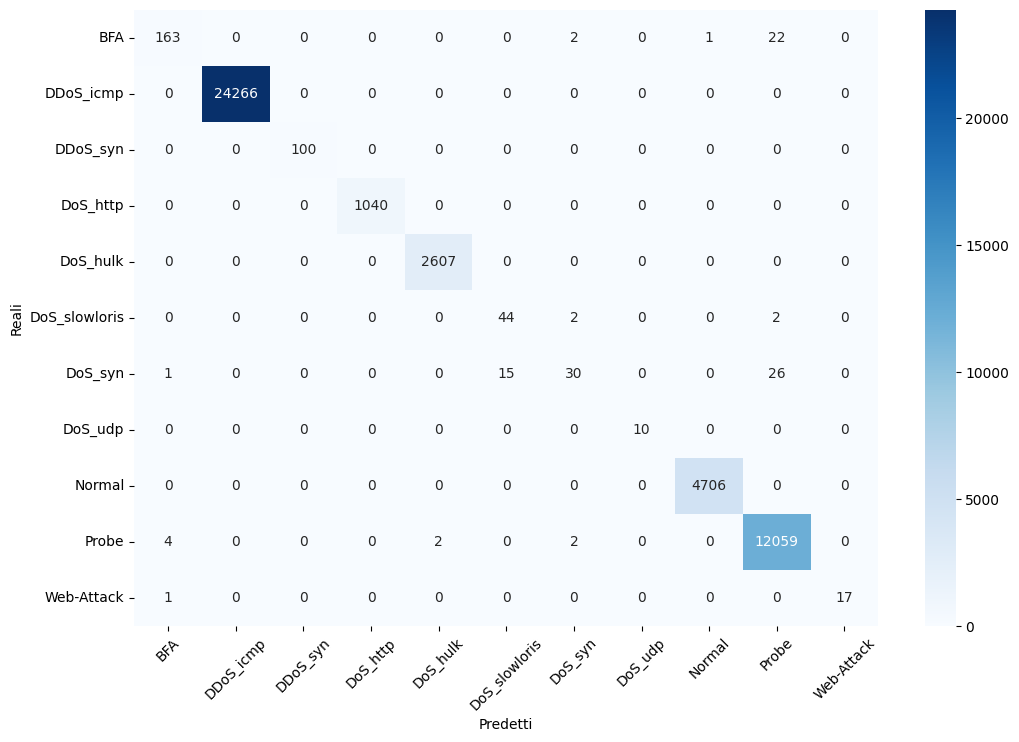

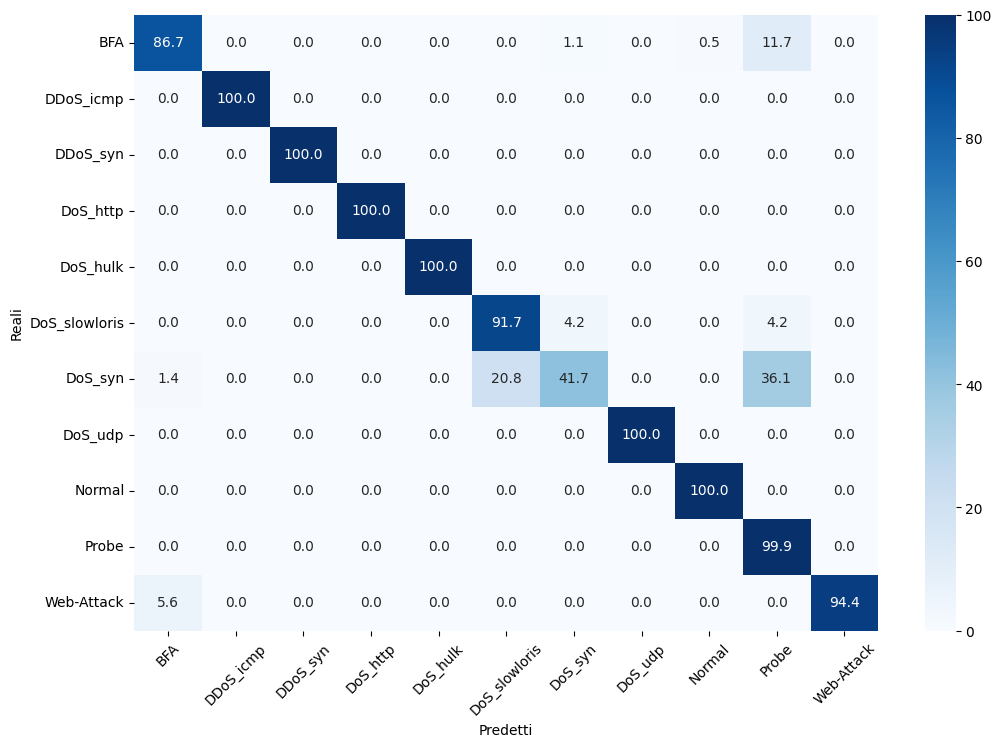


Top 20 Feature Importances:
      feature  importance
69      NET_9    0.098850
79  NET-OBF_9    0.087435
41      FLG_1    0.080544
40      FLG_0    0.079160
30      WIN_0    0.067303
68      NET_8    0.047537
78  NET-OBF_8    0.044267
50      TTL_0    0.042087
11      IAT_1    0.033975
1        PL_1    0.032040
73  NET-OBF_3    0.029933
31      WIN_1    0.028958
66      NET_6    0.028149
76  NET-OBF_6    0.023472
0        PL_0    0.022255
32      WIN_2    0.022117
21      DIR_1    0.021615
63      NET_3    0.019007
33      WIN_3    0.017791
12      IAT_2    0.016249


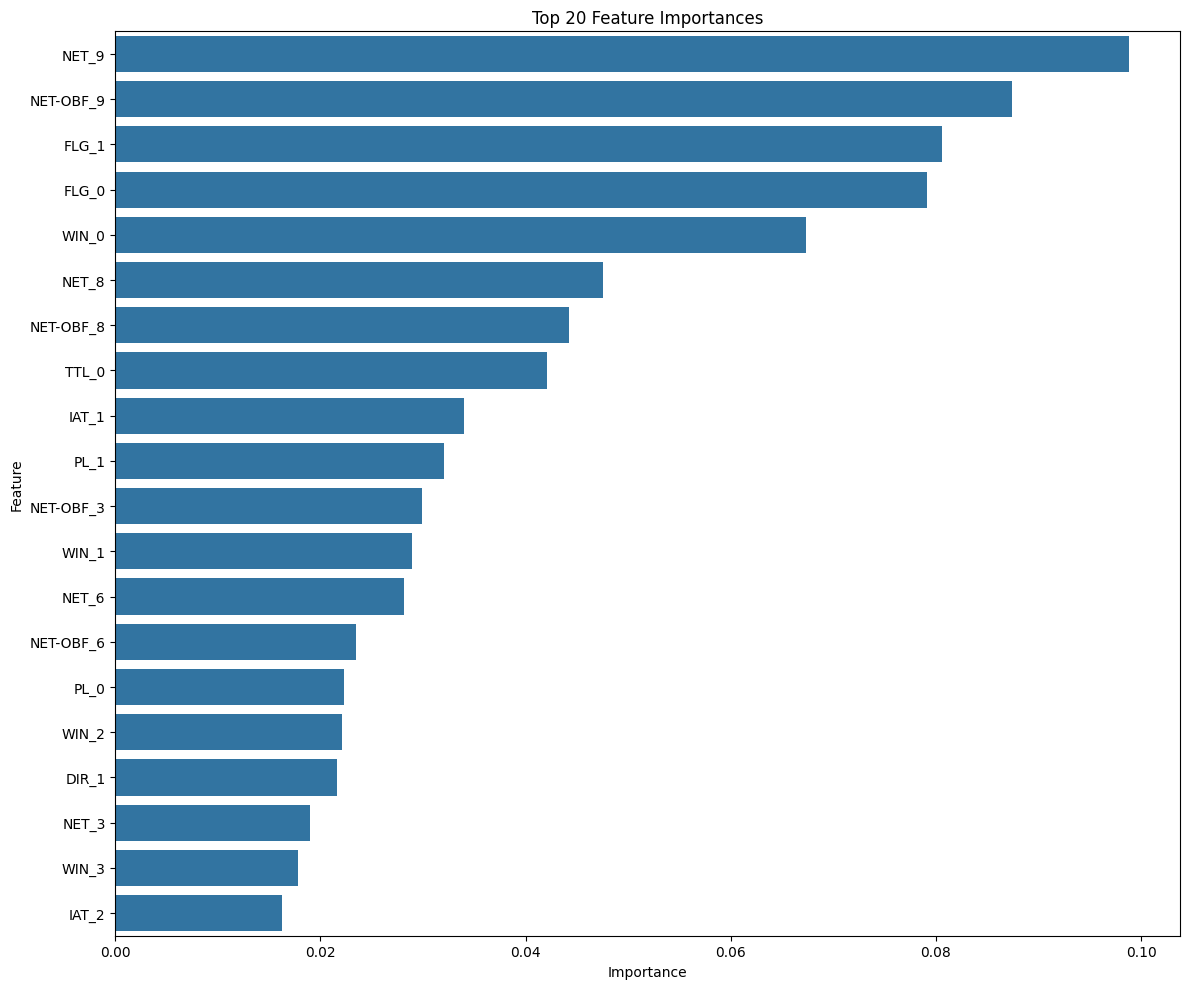

In [ ]:
# ---------------- CONFIGURAZIONE ----------------
array_features_to_use = ['PL', 'IAT', 'DIR', 'WIN', 'FLG', 'TTL', 'NET', 'NET-OBF']
num_elements_to_use = 10
include_FEAT_PAD = False
include_LOAD_PAD = False
target_column = LABEL

# ---------------- ESTRAZIONE FEATURE ----------------
X = pd.DataFrame()

def extract_elements(arr, n):
    if arr is None or not isinstance(arr, (list, np.ndarray)):
        return [np.nan] * n
    arr_np = np.array(arr, dtype=float)
    if len(arr_np) < n:
        return np.pad(arr_np, (0, n - len(arr_np)), 'constant', constant_values=np.nan).tolist()
    return arr_np[:n].tolist()

for feature in array_features_to_use:
    if feature in df.columns:
        extracted_data = df[feature].apply(lambda x: extract_elements(x, num_elements_to_use))
        for i in range(num_elements_to_use):
            X[f'{feature}_{i}'] = extracted_data.apply(lambda x: x[i])

if include_FEAT_PAD and 'FEAT_PAD' in df.columns:
    X['FEAT_PAD'] = df['FEAT_PAD']

if include_LOAD_PAD and 'LOAD_PAD' in df.columns:
    X['LOAD_PAD'] = df['LOAD_PAD']

# ---------------- TARGET E IMPUTAZIONE ----------------
y = df[target_column]

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ---------------- SPLIT E NORMALIZZAZIONE ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dimensioni dei dataset:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# ---------------- MODELLO ----------------
print("\nAddestramento del Random Forest Classifier...")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# ---------------- VALUTAZIONE ----------------
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1_macro:.4f}")
print(f"F1 Score (weighted): {f1_weighted:.4f}")

print("\nReport di classificazione:")
print(classification_report(y_test, y_pred))

# ---------------- MATRICE DI CONFUSIONE ----------------
output_dir = "rf"
os.makedirs(output_dir, exist_ok=True)
attack_labels = np.unique(y)
plt.figure(figsize=(12,8))
plt.plot()
cm = confusion_matrix(y_test, y_pred, labels=attack_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=attack_labels, yticklabels=attack_labels)
plt.xlabel('Predetti')
plt.ylabel('Reali')
plt.xticks(rotation=45)
plt.savefig('rf/confusion_matrix_rf_abs.png',)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot()
cm_norm = confusion_matrix(y_test, y_pred, labels=attack_labels, normalize='true')
sns.heatmap(cm_norm*100, annot=True, fmt='.1f', cmap='Blues', vmax=100, xticklabels=attack_labels, yticklabels=attack_labels)
plt.xlabel('Predetti')
plt.ylabel('Reali')
plt.xticks(rotation=45)

plt.savefig('rf/confusion_matrix_rf_perc.png')
plt.show()


Top 20 Feature Importances:
      feature  importance
69      NET_9    0.098850
79  NET-OBF_9    0.087435
41      FLG_1    0.080544
40      FLG_0    0.079160
30      WIN_0    0.067303
68      NET_8    0.047537
78  NET-OBF_8    0.044267
50      TTL_0    0.042087
11      IAT_1    0.033975
1        PL_1    0.032040
73  NET-OBF_3    0.029933
31      WIN_1    0.028958
66      NET_6    0.028149
76  NET-OBF_6    0.023472
0        PL_0    0.022255
32      WIN_2    0.022117
21      DIR_1    0.021615
63      NET_3    0.019007
33      WIN_3    0.017791
12      IAT_2    0.016249


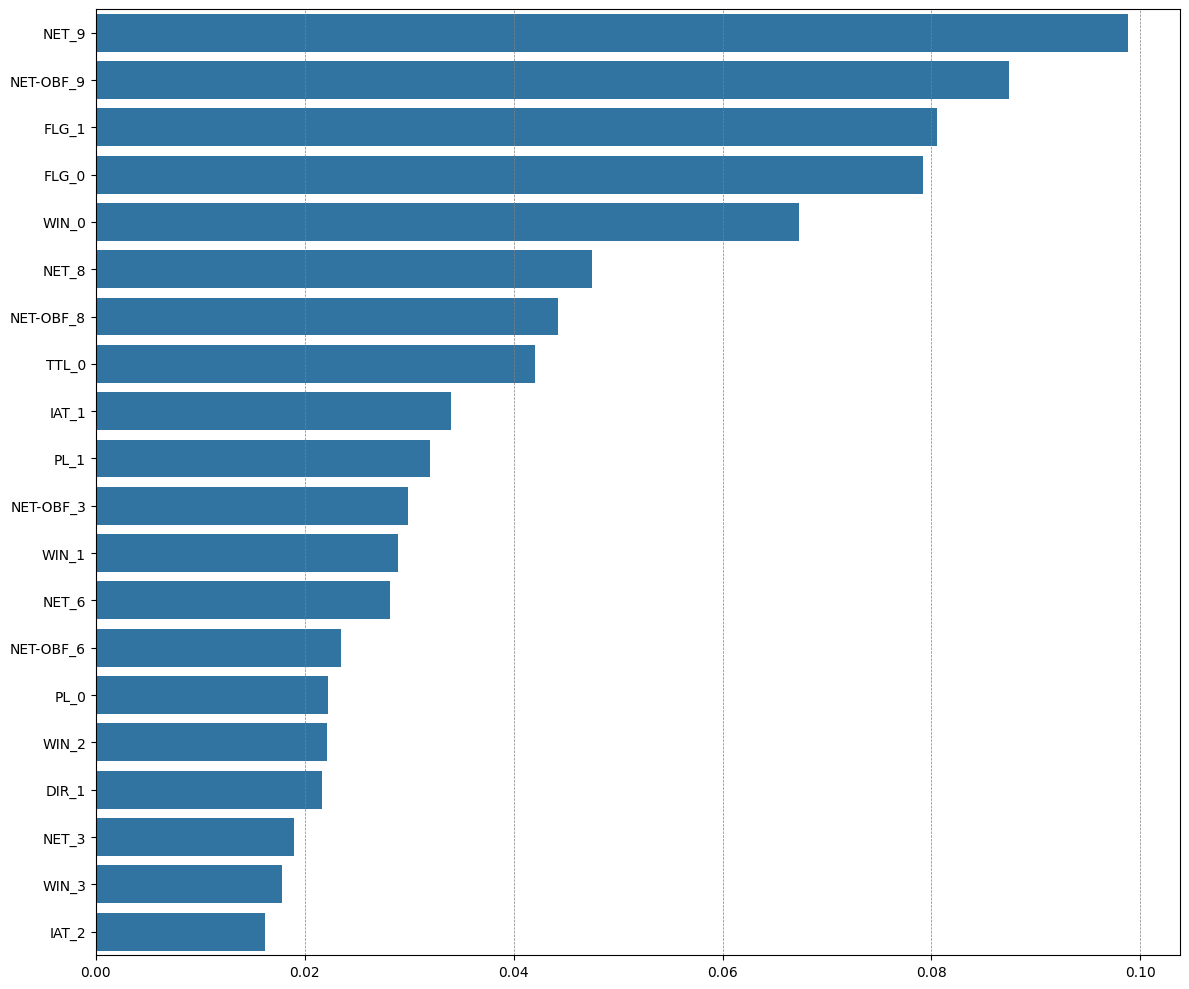

In [ ]:
# ---------------- FEATURE IMPORTANCE ----------------
if hasattr(rf_classifier, "feature_importances_"):
    n_top_features = 20
    importances = rf_classifier.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(
        {"feature": feature_names, "importance": importances}
    )
    feature_importance_df = feature_importance_df.sort_values(
        "importance", ascending=False
    )

    print(f"\nTop {n_top_features} Feature Importances:")
    print(feature_importance_df.head(n_top_features))

    plt.figure(figsize=(12, 10))
    plt.grid(ls="--", lw=0.5, c="grey", which="both")
    sns.barplot(
        x="importance", y="feature", data=feature_importance_df.head(n_top_features)
    )
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()
    plt.savefig("rf/feature_importance_random_forest.png")
    plt.show()

## Analisi Packet Lenght

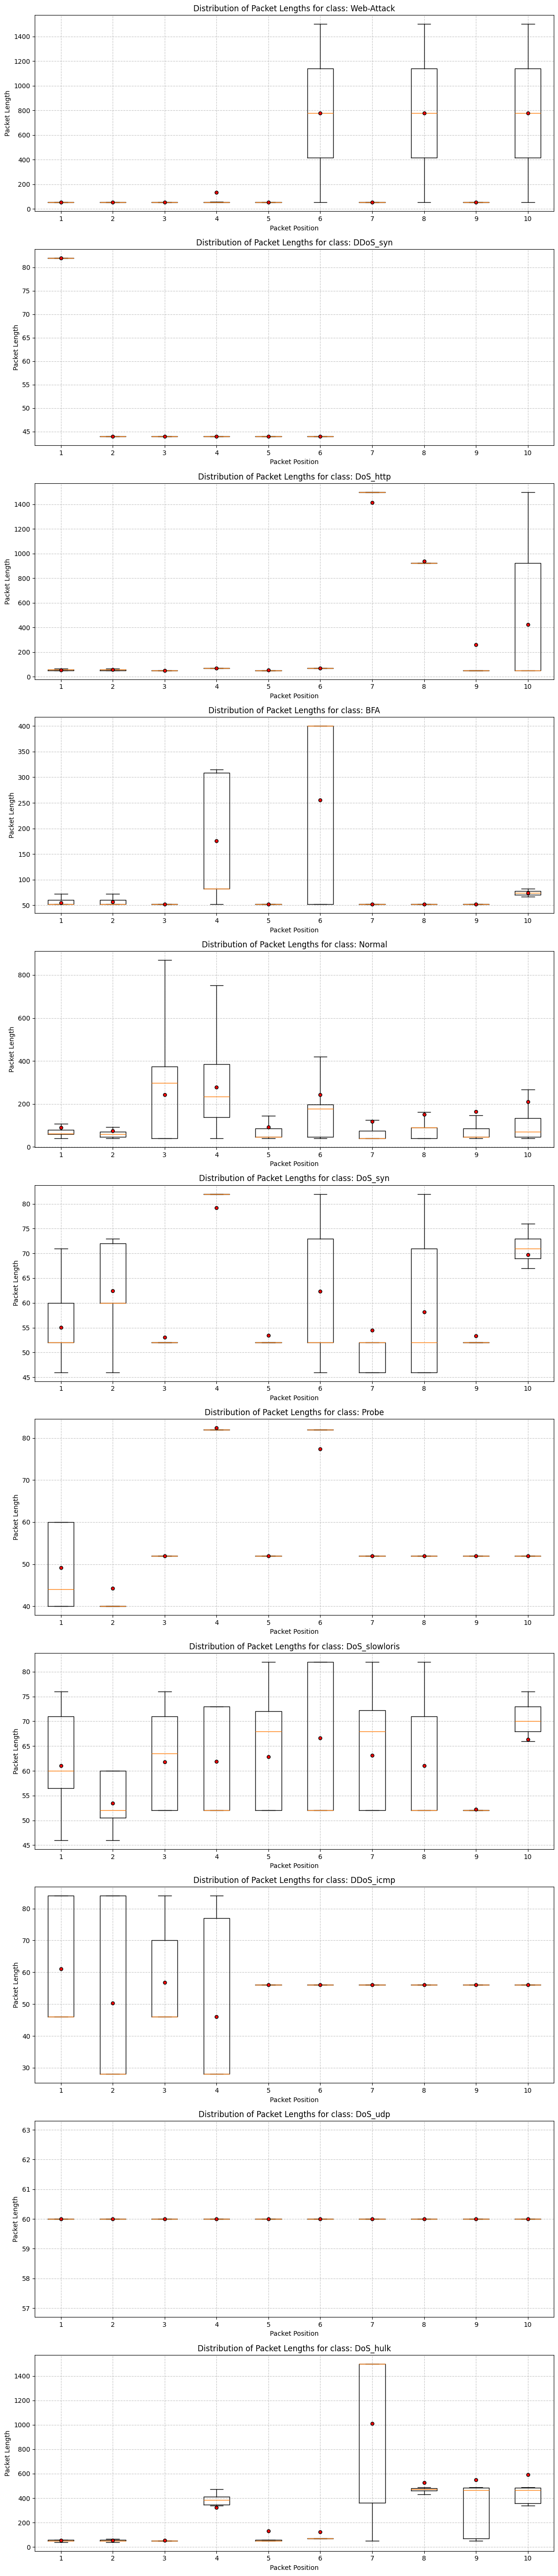

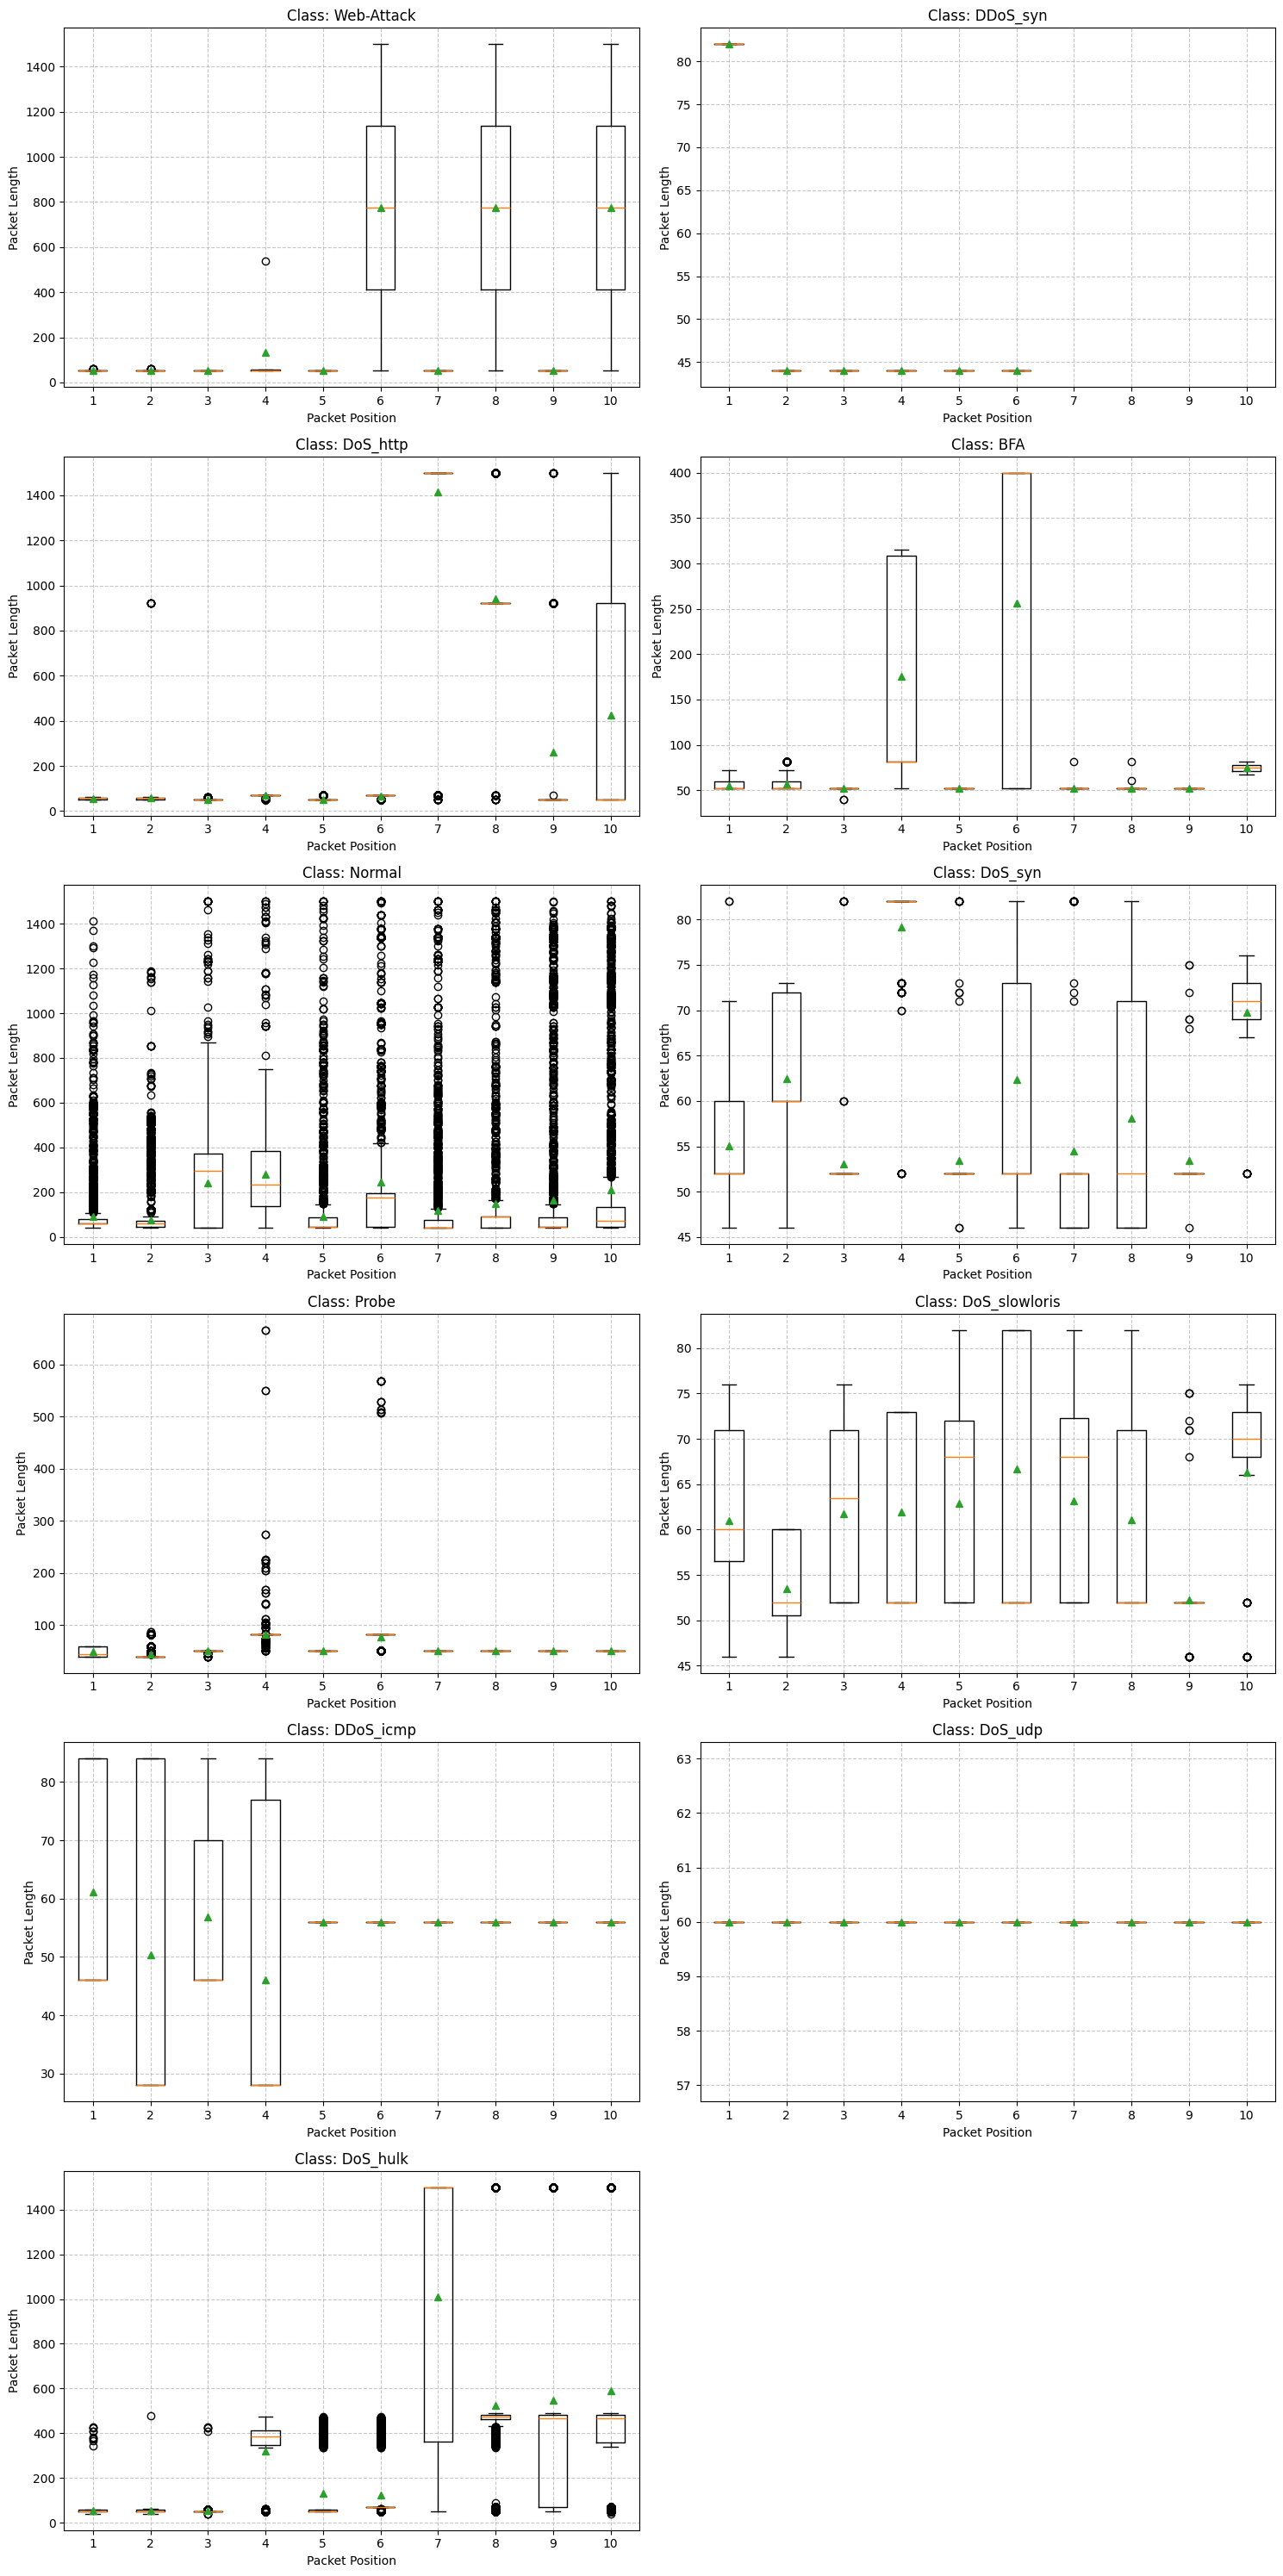

In [ ]:
# Create boxplots for each LABEL class showing distribution of packet lengths for first 10 packets

# Define the number of packets to analyze
num_packets = 10

output_dir = "boxplots"
os.makedirs(output_dir, exist_ok=True)

# Preprocess the PL column to ensure all arrays have exactly 10 elements
def preprocess_packet_lengths(df, max_length=10):
    """Preprocesses the PL column to ensure each array has exactly max_length elements.
    Fills with NaN if the array is shorter than max_length."""

    def pad_or_truncate(pl_array):
        if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
            return np.full(max_length, np.nan)

        pl_array = np.array(pl_array, dtype=float)
        if len(pl_array) > max_length:
            return pl_array[:max_length]  # Truncate if longer
        else:
            return np.pad(pl_array, (0, max_length - len(pl_array)),
                          constant_values=np.nan)  # Pad with NaN if shorter

    return df['PL'].apply(pad_or_truncate)

# Create a list to store processed arrays for each row
processed_arrays = preprocess_packet_lengths(df)

# Create a DataFrame where each row is a flow and each column is a packet position
df_packets = pd.DataFrame(processed_arrays.tolist(),
                         columns=[f'Packet_{i+1}' for i in range(num_packets)],
                         index=df.index)

# Add the class label to the DataFrame
df_packets[LABEL] = df[LABEL]

# Get unique class labels
unique_classes = df[LABEL].unique()

# Set up the figure for subplots - one plot per class
num_classes = len(unique_classes)
fig, axes = plt.subplots(num_classes, 1, figsize=(12, 5 * num_classes))

# If there's only one class, make axes into a list for consistent handling
if num_classes == 1:
    axes = [axes]

# Create a boxplot for each class
for i, class_label in enumerate(unique_classes):
    # Filter data for this class
    class_data = df_packets[df_packets[LABEL] == class_label].iloc[:, :num_packets]

    # Get data for boxplot - each column becomes a box
    data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

    # Create boxplot
    axes[i].boxplot(data_to_plot, showmeans=True, meanprops={'marker':'o',
                                                 'markerfacecolor':'red',
                                                 'markeredgecolor':'black',
                                                'markersize':5},
                                                showfliers=False)

    axes[i].set_title(f'Distribution of Packet Lengths for class: {class_label}')
    axes[i].set_xlabel('Packet Position')
    axes[i].set_ylabel('Packet Length')
    axes[i].set_xticks(range(1, num_packets + 1))
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
filepath = os.path.join(output_dir, 'packet_length_distributions_by_class.png')
plt.savefig(filepath)
plt.show()

# For better visualization especially with many classes, we can also create
# a grid of subplots (optimize layout based on number of classes)
num_classes = len(unique_classes)
max_cols = 2  # Maximum number of columns in the grid
num_rows = (num_classes + max_cols - 1) // max_cols  # Calculate needed rows

fig, axes = plt.subplots(num_rows, max_cols, figsize=(15, 5 * num_rows))
# Flatten axes array for easier indexing
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Create a boxplot for each class in the grid layout
for i, class_label in enumerate(unique_classes):
    if i < len(axes):
        # Filter data for this class
        class_data = df_packets[df_packets[LABEL] == class_label].iloc[:, :num_packets]

        # Get data for boxplot
        data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

        # Create boxplot
        axes[i].boxplot(data_to_plot, showmeans=True)
        axes[i].set_title(f'Class: {class_label}')
        axes[i].set_xlabel('Packet Position')
        axes[i].set_ylabel('Packet Length')
        axes[i].set_xticks(range(1, num_packets + 1))
        axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
filepath = os.path.join(output_dir, "packet_length_grid_by_class.png")
plt.savefig(filepath)
plt.show()

# Prepara la cartella per i singoli boxplot per classe
output_dir = "boxplots/per_class"
os.makedirs(output_dir, exist_ok=True)

# Crea e salva un boxplot per ogni classe
for class_label in unique_classes:
    # Filtra i dati per la classe corrente
    class_data = df_packets[df_packets[LABEL] == class_label].iloc[:, :num_packets]
    data_to_plot = [class_data[f"Packet_{j+1}"].dropna() for j in range(num_packets)]

    # Crea figura
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(
        data_to_plot,
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "red",
            "markeredgecolor": "black",
            "markersize": 5,
        },
        showfliers=False,
    )

    ax.set_title(f"Distribution of Packet Lengths - Class: {class_label}")
    ax.set_xlabel("Packet Position")
    ax.set_ylabel("Packet Length")
    ax.set_xticks(range(1, num_packets + 1))
    ax.grid(True, linestyle="--", alpha=0.7)

    # Salva nella cartella 'boxplots'
    filename = f"class_{str(class_label).replace(' ', '_')}.png"
    filepath = os.path.join(output_dir, filename)
    plt.tight_layout()
    plt.savefig(filepath)
    plt.close(fig)  # Chiudi la figura per liberare memoria

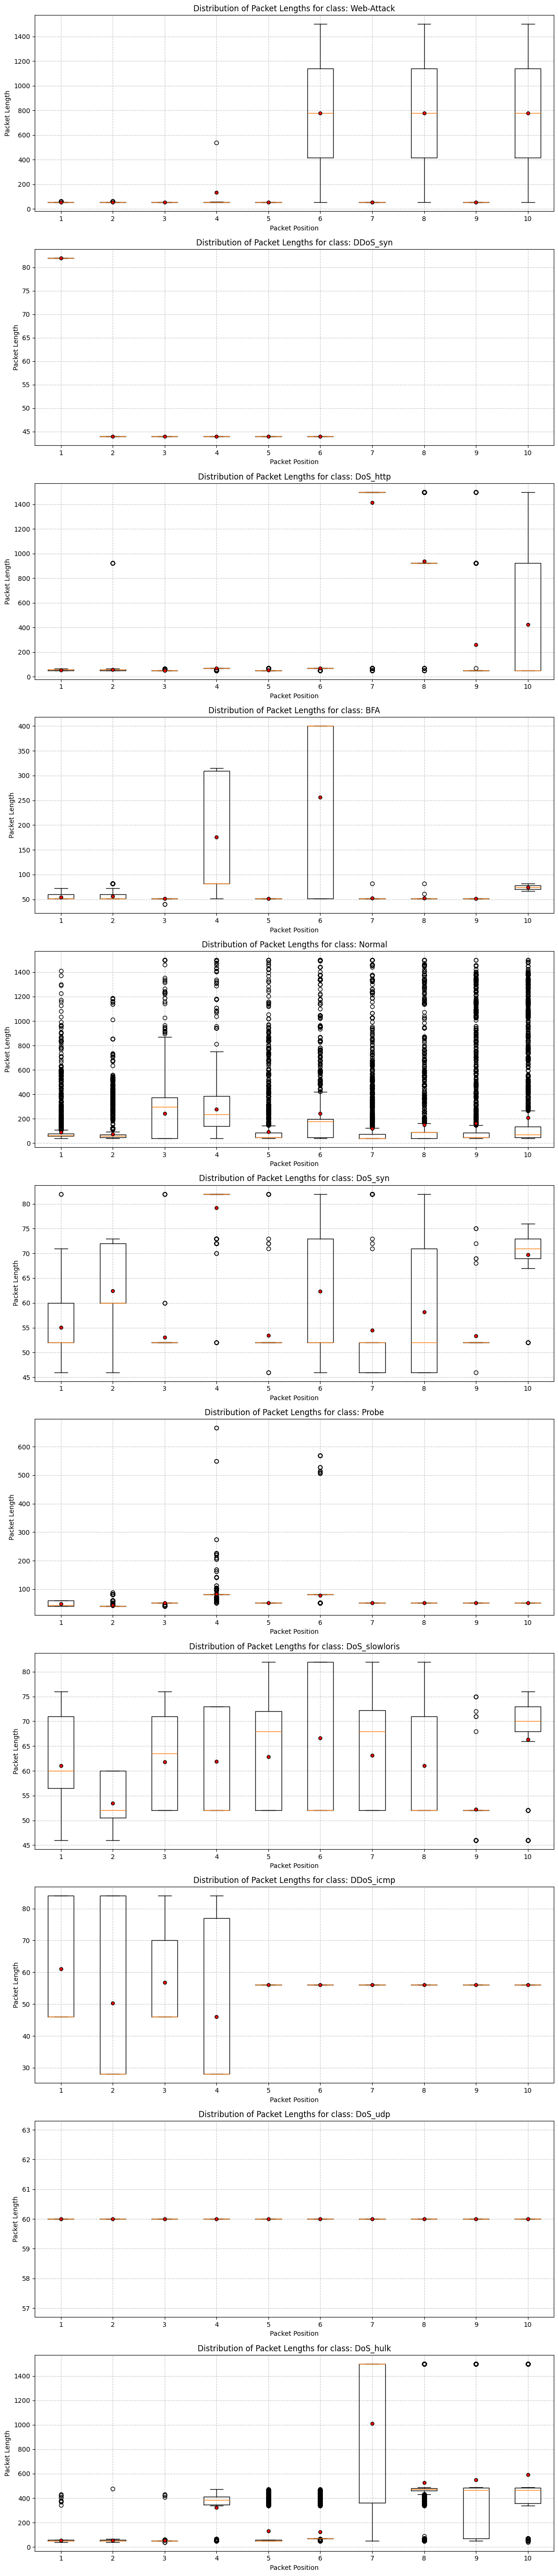

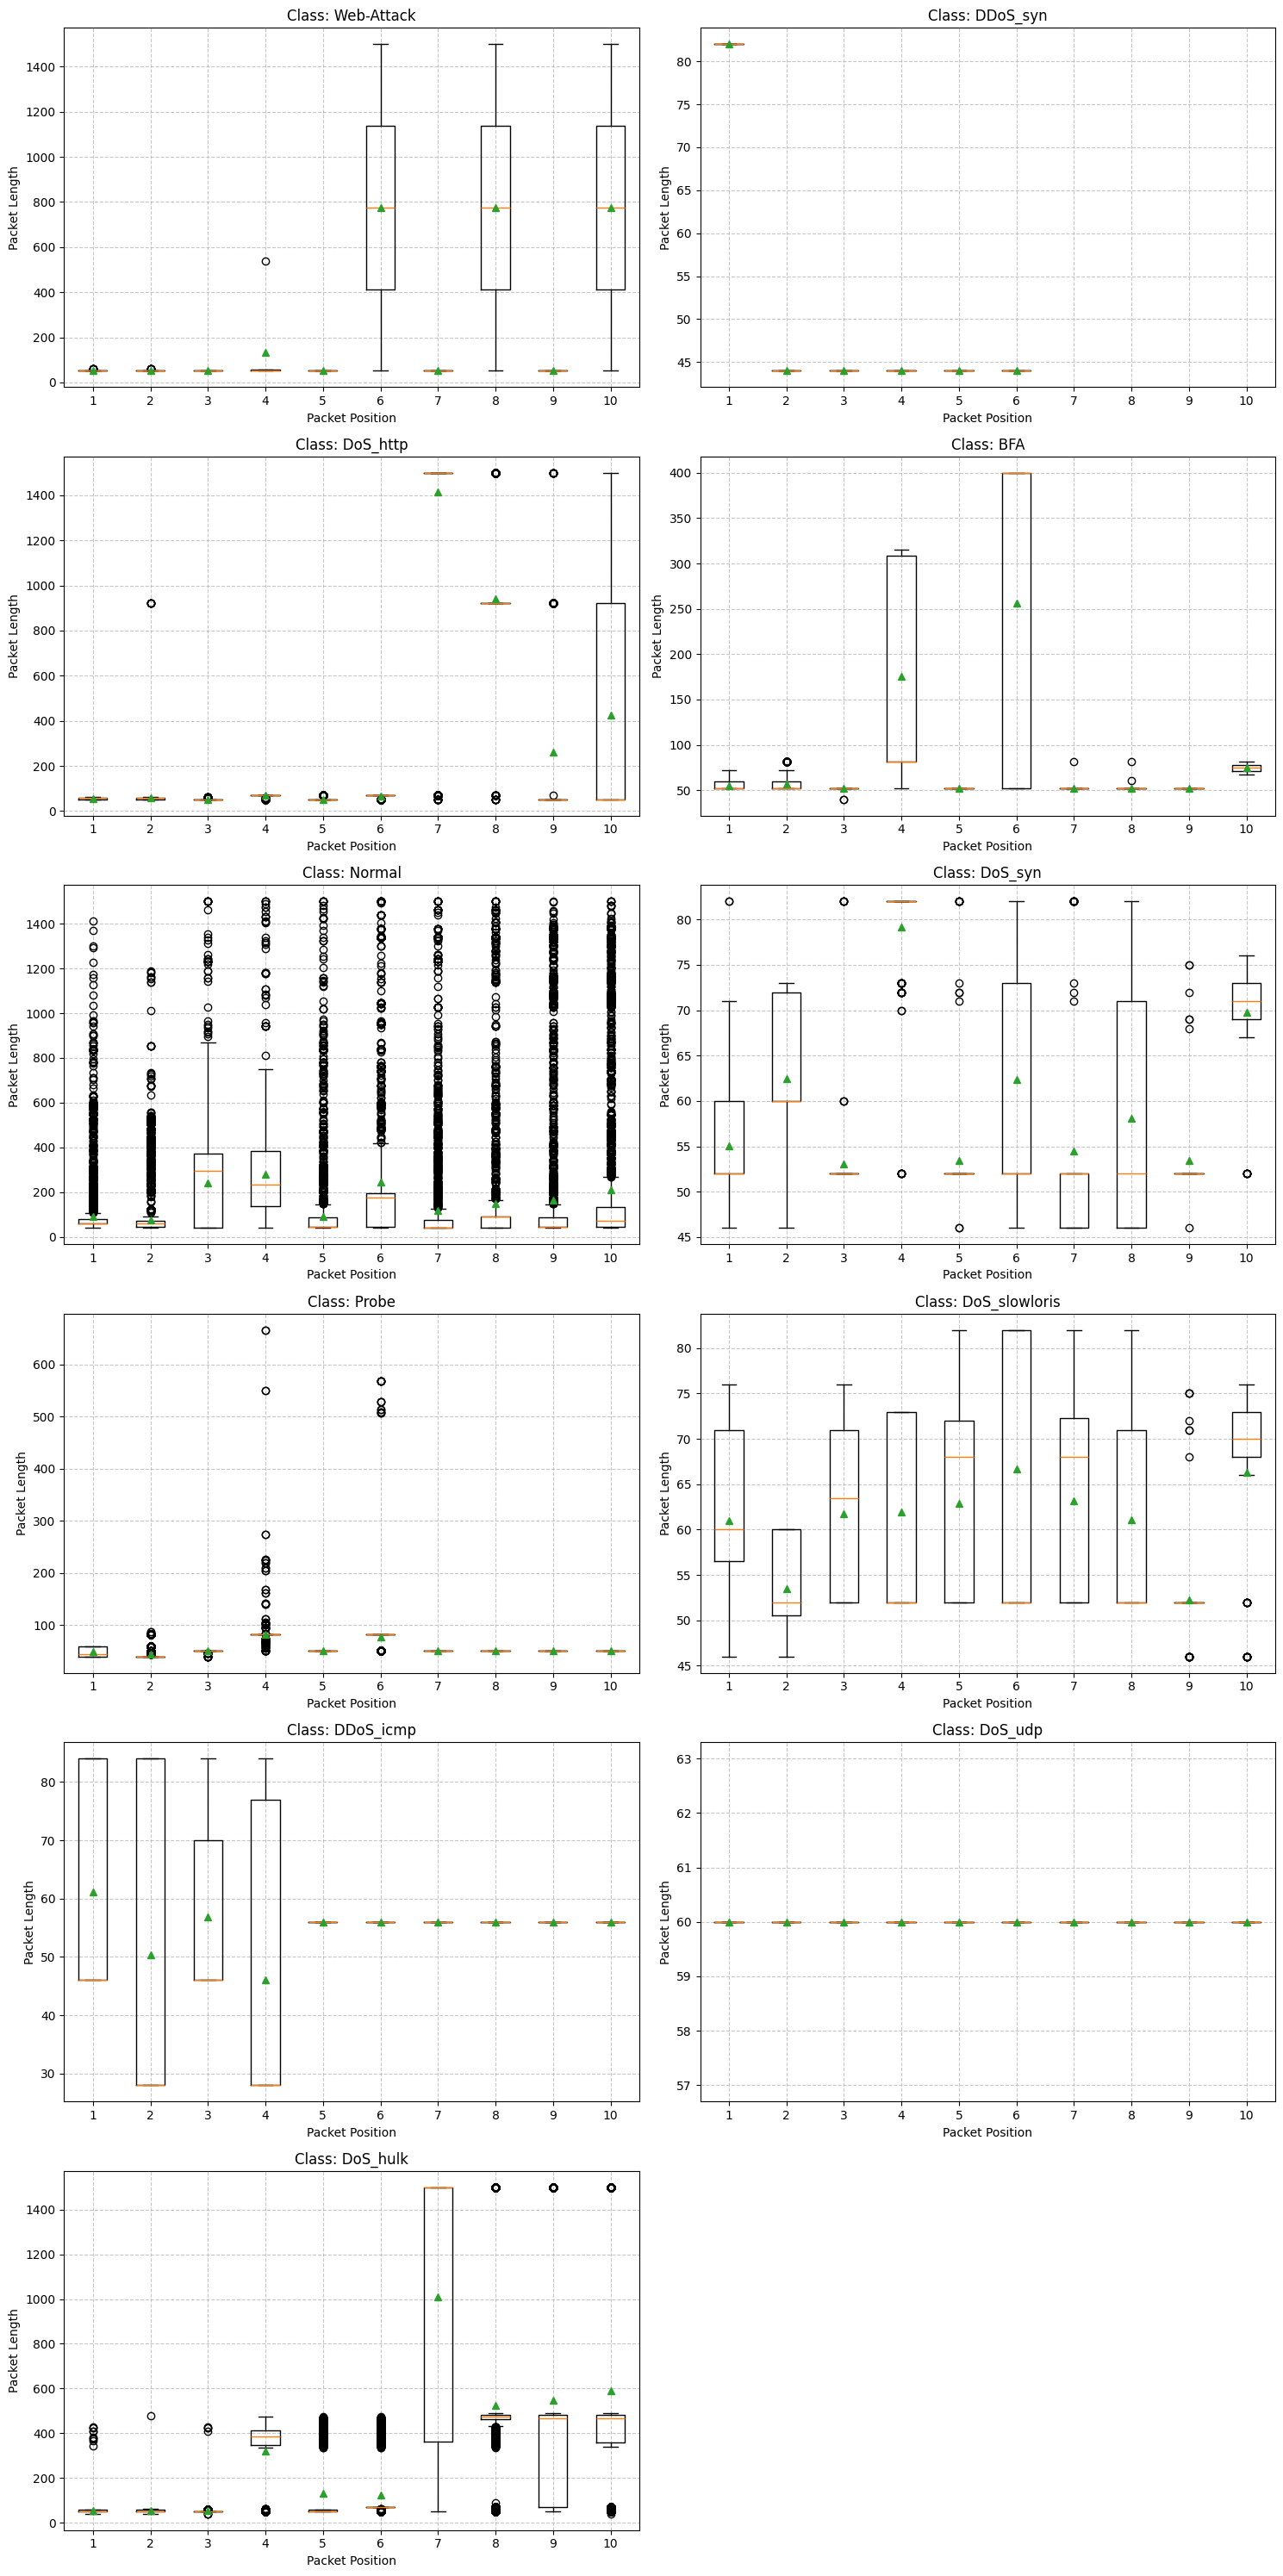

In [ ]:
# Create boxplots for each LABEL class showing distribution of packet lengths for first 10 packets

# Define the number of packets to analyze
num_packets = 10

# Preprocess the PL column to ensure all arrays have exactly 10 elements
def preprocess_packet_lengths(df, max_length=10):
    """Preprocesses the PL column to ensure each array has exactly max_length elements.
    Fills with NaN if the array is shorter than max_length."""

    def pad_or_truncate(pl_array):
        if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
            return np.full(max_length, np.nan)

        pl_array = np.array(pl_array, dtype=float)
        if len(pl_array) > max_length:
            return pl_array[:max_length]  # Truncate if longer
        else:
            return np.pad(pl_array, (0, max_length - len(pl_array)),
                          constant_values=np.nan)  # Pad with NaN if shorter

    return df['PL'].apply(pad_or_truncate)

# Create a list to store processed arrays for each row
processed_arrays = preprocess_packet_lengths(df)

# Create a DataFrame where each row is a flow and each column is a packet position
df_packets = pd.DataFrame(processed_arrays.tolist(),
                         columns=[f'Packet_{i+1}' for i in range(num_packets)],
                         index=df.index)

# Add the class label to the DataFrame
df_packets[LABEL] = df[LABEL]

# Get unique class labels
unique_classes = df[LABEL].unique()

# Set up the figure for subplots - one plot per class
num_classes = len(unique_classes)
fig, axes = plt.subplots(num_classes, 1, figsize=(12, 5 * num_classes))

# If there's only one class, make axes into a list for consistent handling
if num_classes == 1:
    axes = [axes]

# Create a boxplot for each class
for i, class_label in enumerate(unique_classes):
    # Filter data for this class
    class_data = df_packets[df_packets[LABEL] == class_label].iloc[:, :num_packets]

    # Get data for boxplot - each column becomes a box
    data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

    # Create boxplot
    axes[i].boxplot(data_to_plot, showmeans=True, meanprops={'marker':'o',
                                                 'markerfacecolor':'red',
                                                 'markeredgecolor':'black',
                                                'markersize':5})

    axes[i].set_title(f'Distribution of Packet Lengths for class: {class_label}')
    axes[i].set_xlabel('Packet Position')
    axes[i].set_ylabel('Packet Length')
    axes[i].set_xticks(range(1, num_packets + 1))
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('packet_length_distributions_by_class.png')
plt.show()

# For better visualization especially with many classes, we can also create
# a grid of subplots (optimize layout based on number of classes)
num_classes = len(unique_classes)
max_cols = 2  # Maximum number of columns in the grid
num_rows = (num_classes + max_cols - 1) // max_cols  # Calculate needed rows

fig, axes = plt.subplots(num_rows, max_cols, figsize=(15, 5 * num_rows))
# Flatten axes array for easier indexing
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Create a boxplot for each class in the grid layout
for i, class_label in enumerate(unique_classes):
    if i < len(axes):
        # Filter data for this class
        class_data = df_packets[df_packets[LABEL] == class_label].iloc[:, :num_packets]

        # Get data for boxplot
        data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

        # Create boxplot
        axes[i].boxplot(data_to_plot, showmeans=True)
        axes[i].set_title(f'Class: {class_label}')
        axes[i].set_xlabel('Packet Position')
        axes[i].set_ylabel('Packet Length')
        axes[i].set_xticks(range(1, num_packets + 1))
        axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('packet_length_grid_by_class.png')
plt.show()

Packet 1 - Count: 39296, Mean: 119.10, Median: 60.00, % >= 1500: 0.80%
Packet 2 - Count: 39296, Mean: 78.90, Median: 46.00, % >= 1500: 0.40%
Packet 3 - Count: 30604, Mean: 327.19, Median: 46.00, % >= 1500: 3.66%
Packet 4 - Count: 26746, Mean: 316.60, Median: 248.00, % >= 1500: 0.64%
Packet 5 - Count: 15479, Mean: 273.73, Median: 46.00, % >= 1500: 4.16%
Packet 6 - Count: 15022, Mean: 784.28, Median: 185.00, % >= 1500: 16.60%
Packet 7 - Count: 14321, Mean: 297.25, Median: 40.00, % >= 1500: 5.26%
Packet 8 - Count: 14036, Mean: 326.53, Median: 91.00, % >= 1500: 6.38%
Packet 9 - Count: 13303, Mean: 347.11, Median: 46.00, % >= 1500: 4.47%
Packet 10 - Count: 13210, Mean: 396.12, Median: 115.00, % >= 1500: 5.53%


<ipython-input-35-dc24108a292c>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


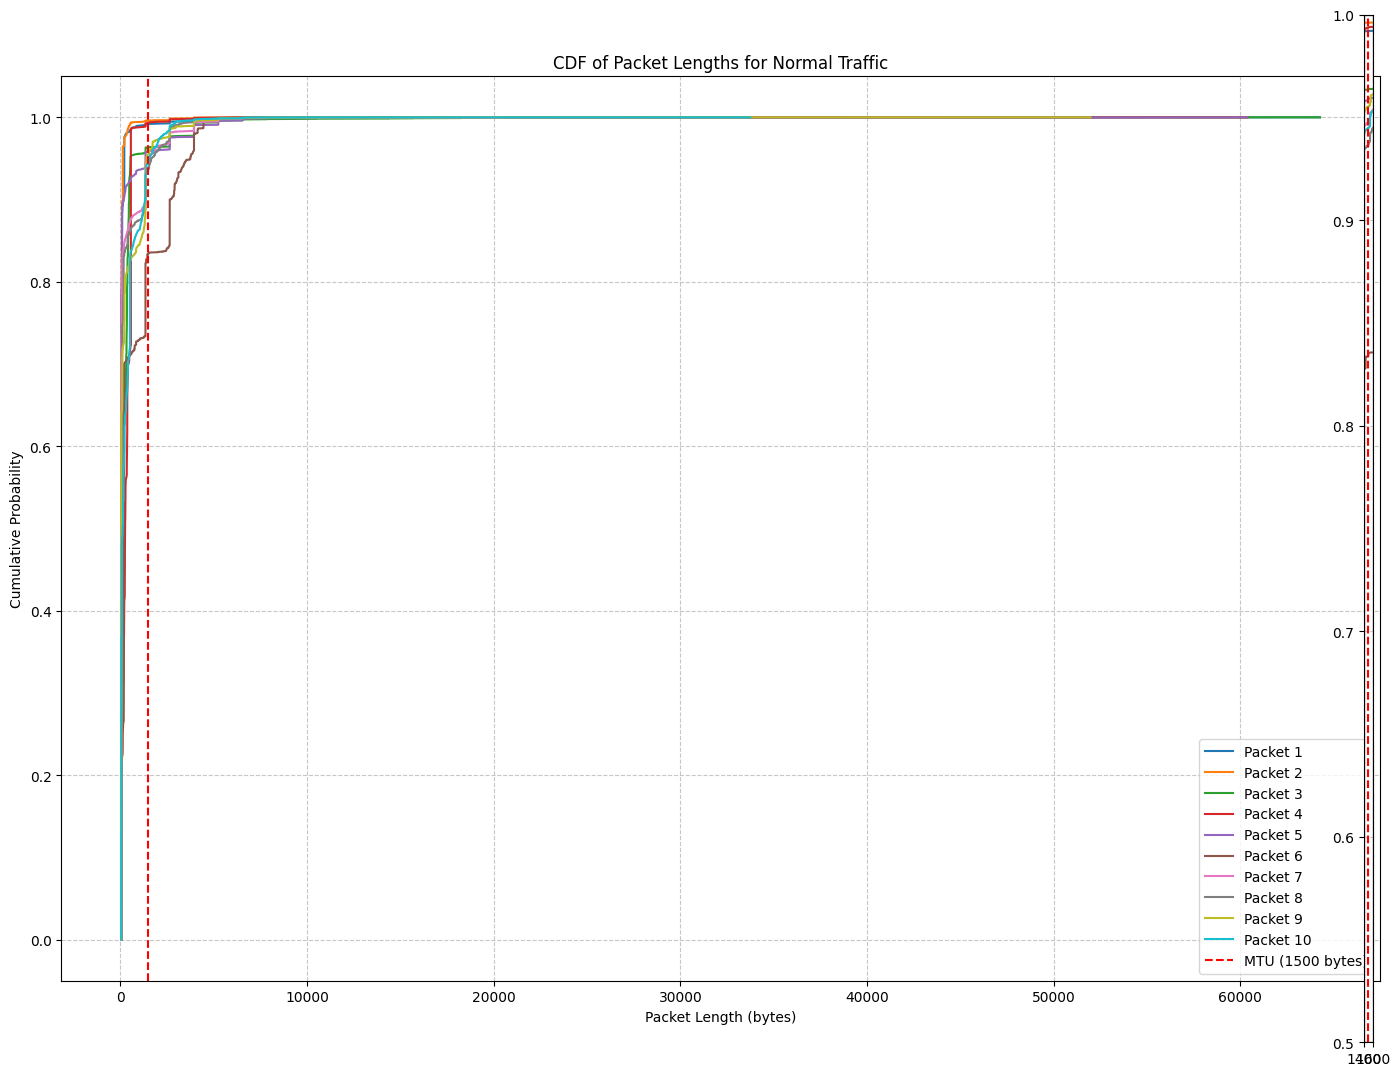

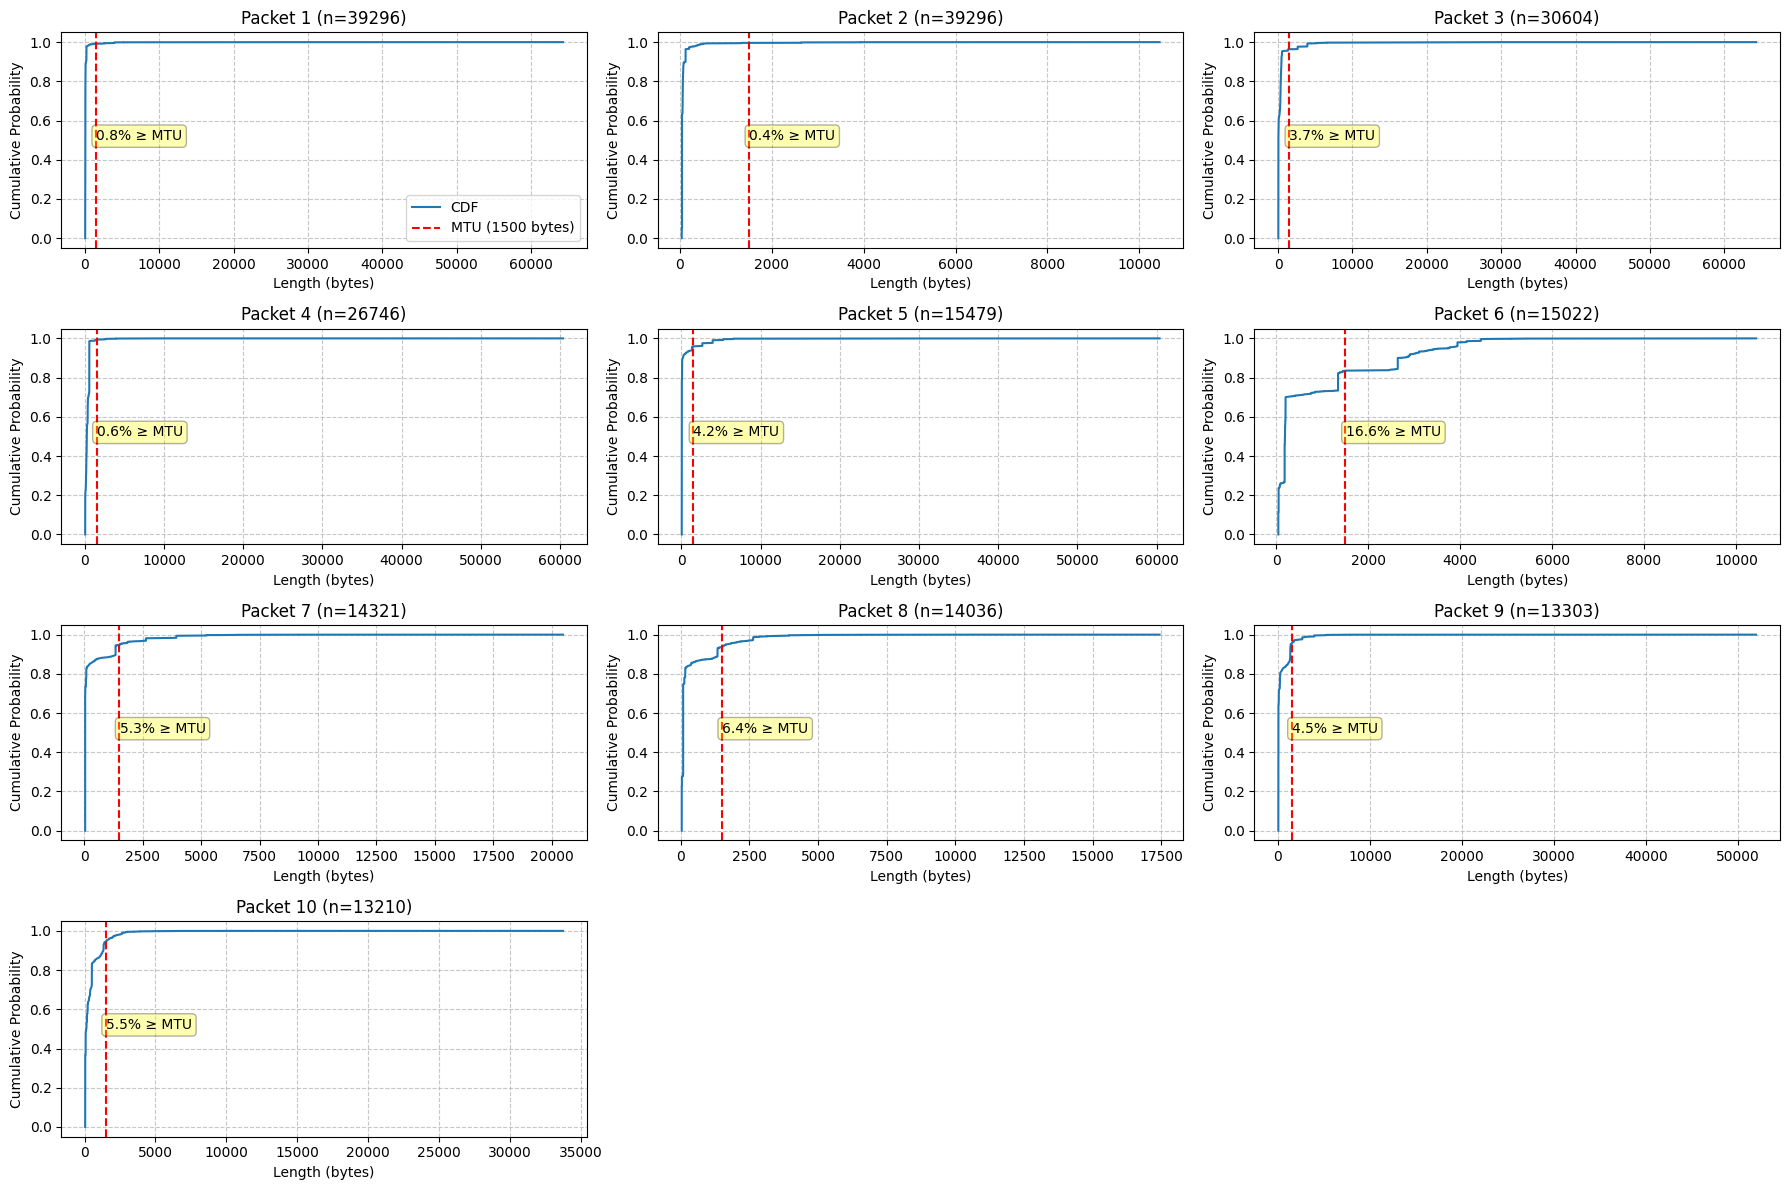

In [ ]:
# Plot CDF of packet lengths for 'Normal' class with MTU line

# Define the number of packets to analyze
num_packets = 10

# Filter the dataset to get only the 'Normal' class
df_normal = df[df[LABEL] == 'Normal'].copy()

# Preprocess the PL column to get the first 10 packets
def get_packet_lengths(pl_array, max_length=10):
    if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
        return np.full(max_length, np.nan)

    pl_array = np.array(pl_array, dtype=float)
    if len(pl_array) > max_length:
        return pl_array[:max_length]  # Truncate if longer
    else:
        return np.pad(pl_array, (0, max_length - len(pl_array)),
                      constant_values=np.nan)  # Pad with NaN if shorter

# Process arrays
processed_arrays = df_normal['PL'].apply(get_packet_lengths)

# Create a DataFrame where each row is a flow and each column is a packet position
df_normal_packets = pd.DataFrame(processed_arrays.tolist(),
                     columns=[f'Packet_{i+1}' for i in range(num_packets)],
                     index=df_normal.index)

# Create a figure for the CDF plots
plt.figure(figsize=(14, 10))

# Plot CDF for each packet position
for i in range(num_packets):
    # Get data for current packet position
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    # Calculate the proportional ranks (CDF y-values)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot the CDF
    plt.plot(sorted_data, y_values, label=f'Packet {i+1}')

    # Print statistics about this packet position
    print(f"Packet {i+1} - Count: {len(data)}, Mean: {data.mean():.2f}, Median: {data.median():.2f}, % >= 1500: {(data >= 1500).mean()*100:.2f}%")

# Add a vertical line at MTU=1500
plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

# Add labels and title
plt.title('CDF of Packet Lengths for Normal Traffic')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add zoom inset for the region around MTU=1500
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
axins = zoomed_inset_axes(plt.gca(), 2.5, loc='center right')  # zoom factor: 2.5

# Plot same data in the inset
for i in range(num_packets):
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axins.plot(sorted_data, y_values)

# Add the vertical line in the inset too
axins.axvline(x=1500, color='red', linestyle='--')

# Set the limits for the inset
axins.set_xlim(1400, 1600)  # x-limits around MTU
axins.set_ylim(0.5, 1.0)    # Adjust as needed to focus on the interesting part
axins.grid(True, linestyle='--', alpha=0.7)

# Mark the region of the inset
mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('normal_packet_length_cdf.png')
plt.show()

# Now create a detailed plot focusing on a single figure with subplots for each packet position
plt.figure(figsize=(18, 12))

# Calculate number of rows and columns for the subplot grid
rows = int(np.ceil(num_packets / 3))
cols = min(num_packets, 3)

# Create subplots for each packet position
for i in range(num_packets):
    plt.subplot(rows, cols, i+1)

    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot CDF
    plt.plot(sorted_data, y_values, label='CDF')

    # Add vertical line at MTU
    plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

    # Annotate the percentage of packets with size >= MTU
    mtu_pct = (data >= 1500).mean() * 100
    plt.annotate(f"{mtu_pct:.1f}% ≥ MTU",
                 xy=(1510, 0.5),
                 xytext=(1510, 0.5),
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

    plt.title(f'Packet {i+1} (n={len(data)})')
    plt.xlabel('Length (bytes)')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend if it's the first subplot
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.savefig('normal_packet_length_cdf_detailed.png')
plt.show()

Packet 1 - Count: 5198, Mean: 56.08, Median: 60.00, % >= 1500: 0.00%
Packet 2 - Count: 5198, Mean: 57.12, Median: 60.00, % >= 1500: 0.00%
Packet 3 - Count: 5197, Mean: 52.13, Median: 52.00, % >= 1500: 0.00%
Packet 4 - Count: 2655, Mean: 68.50, Median: 69.00, % >= 1500: 0.00%
Packet 5 - Count: 2648, Mean: 52.98, Median: 52.00, % >= 1500: 0.00%
Packet 6 - Count: 2648, Mean: 68.20, Median: 69.00, % >= 1500: 0.00%
Packet 7 - Count: 2642, Mean: 1414.25, Median: 1500.00, % >= 1500: 94.02%
Packet 8 - Count: 2642, Mean: 939.59, Median: 923.00, % >= 1500: 4.73%
Packet 9 - Count: 442, Mean: 259.49, Median: 52.00, % >= 1500: 3.17%
Packet 10 - Count: 67, Mean: 424.61, Median: 52.00, % >= 1500: 1.49%


<ipython-input-31-d45ab4e4ef94>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


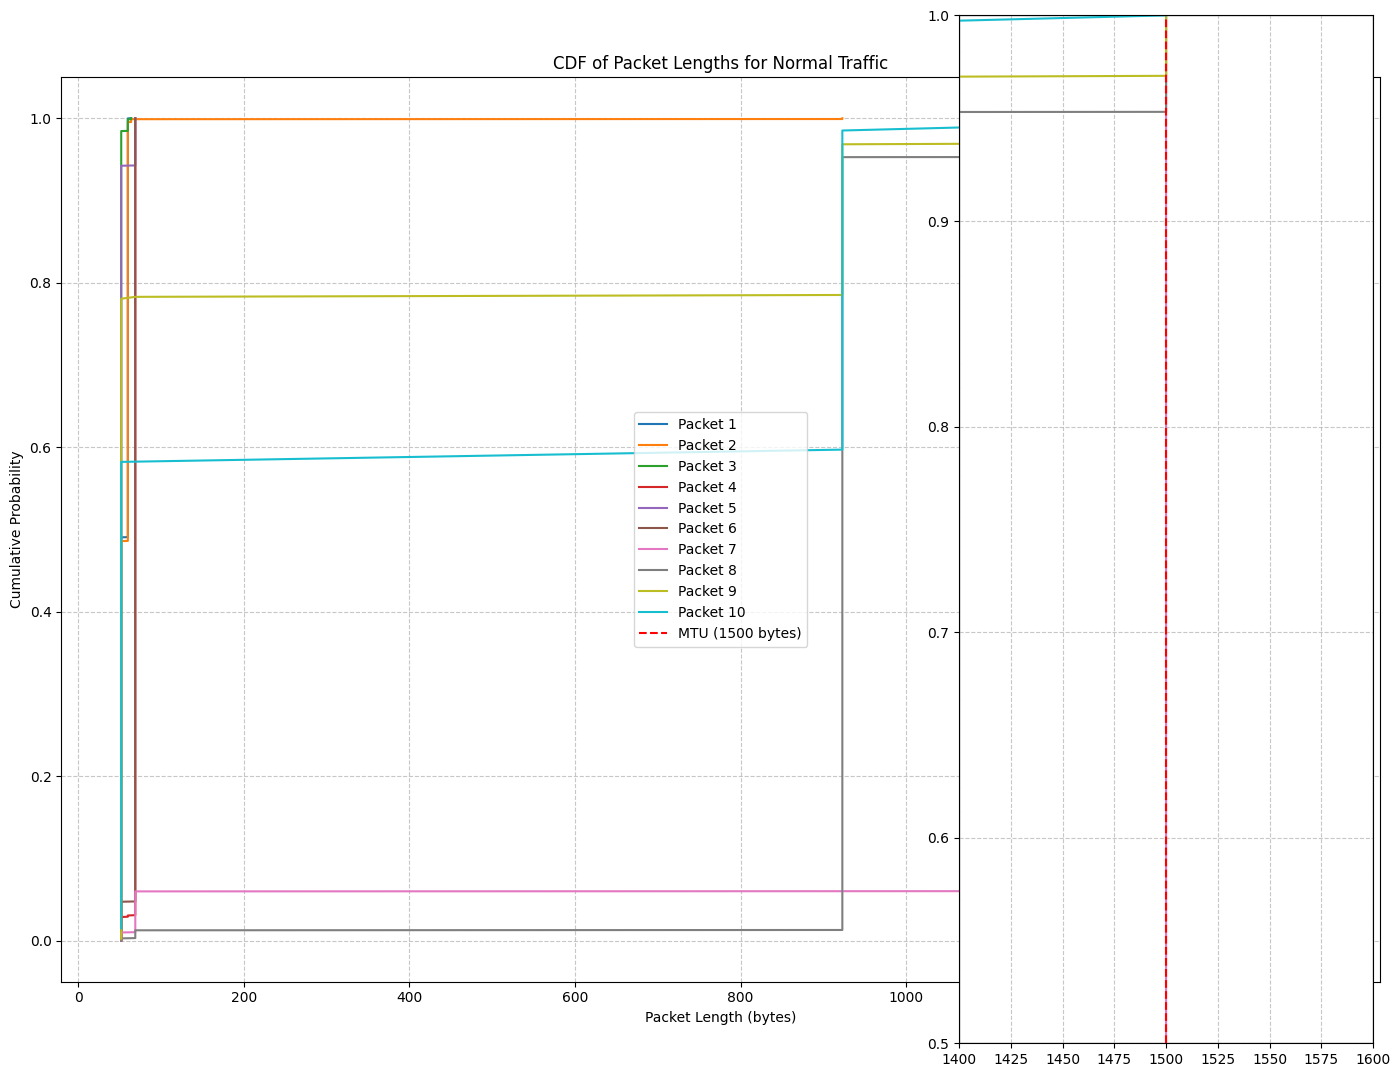

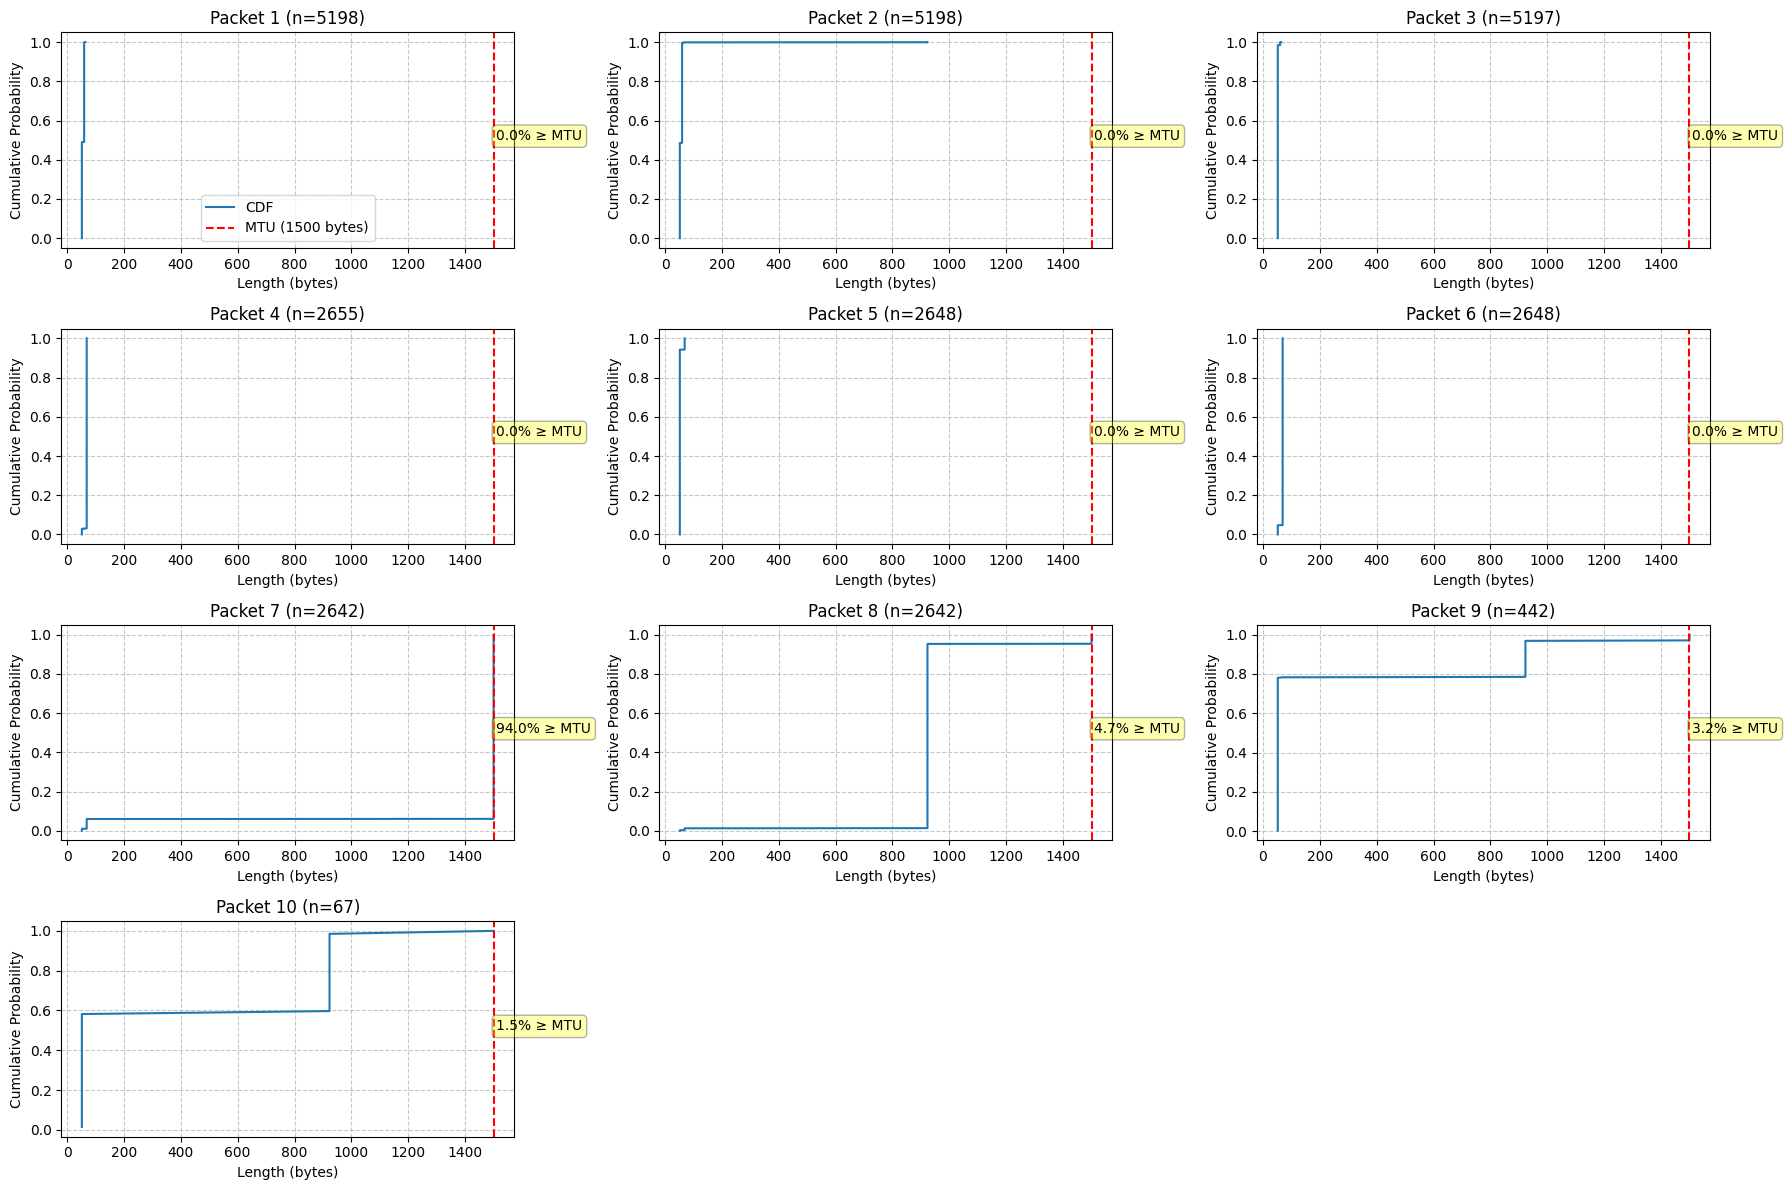

In [ ]:
# Plot CDF of packet lengths for 'Normal' class with MTU line

# Define the number of packets to analyze
num_packets = 10

# Filter the dataset to get only the 'DOS_http' class
df_normal = df[df[LABEL] == 'DoS_http'].copy()

# Preprocess the PL column to get the first 10 packets
def get_packet_lengths(pl_array, max_length=10):
    if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
        return np.full(max_length, np.nan)

    pl_array = np.array(pl_array, dtype=float)
    if len(pl_array) > max_length:
        return pl_array[:max_length]  # Truncate if longer
    else:
        return np.pad(pl_array, (0, max_length - len(pl_array)),
                      constant_values=np.nan)  # Pad with NaN if shorter

# Process arrays
processed_arrays = df_normal['PL'].apply(get_packet_lengths)

# Create a DataFrame where each row is a flow and each column is a packet position
df_normal_packets = pd.DataFrame(processed_arrays.tolist(),
                     columns=[f'Packet_{i+1}' for i in range(num_packets)],
                     index=df_normal.index)

# Create a figure for the CDF plots
plt.figure(figsize=(14, 10))

# Plot CDF for each packet position
for i in range(num_packets):
    # Get data for current packet position
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    # Calculate the proportional ranks (CDF y-values)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot the CDF
    plt.plot(sorted_data, y_values, label=f'Packet {i+1}')

    # Print statistics about this packet position
    print(f"Packet {i+1} - Count: {len(data)}, Mean: {data.mean():.2f}, Median: {data.median():.2f}, % >= 1500: {(data >= 1500).mean()*100:.2f}%")

# Add a vertical line at MTU=1500
plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

# Add labels and title
plt.title('CDF of Packet Lengths for Normal Traffic')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add zoom inset for the region around MTU=1500
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
axins = zoomed_inset_axes(plt.gca(), 2.5, loc='center right')  # zoom factor: 2.5

# Plot same data in the inset
for i in range(num_packets):
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axins.plot(sorted_data, y_values)

# Add the vertical line in the inset too
axins.axvline(x=1500, color='red', linestyle='--')

# Set the limits for the inset
axins.set_xlim(1400, 1600)  # x-limits around MTU
axins.set_ylim(0.5, 1.0)    # Adjust as needed to focus on the interesting part
axins.grid(True, linestyle='--', alpha=0.7)

# Mark the region of the inset
mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('normal_packet_length_cdf.png')
plt.show()

# Now create a detailed plot focusing on a single figure with subplots for each packet position
plt.figure(figsize=(18, 12))

# Calculate number of rows and columns for the subplot grid
rows = int(np.ceil(num_packets / 3))
cols = min(num_packets, 3)

# Create subplots for each packet position
for i in range(num_packets):
    plt.subplot(rows, cols, i+1)

    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot CDF
    plt.plot(sorted_data, y_values, label='CDF')

    # Add vertical line at MTU
    plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

    # Annotate the percentage of packets with size >= MTU
    mtu_pct = (data >= 1500).mean() * 100
    plt.annotate(f"{mtu_pct:.1f}% ≥ MTU",
                 xy=(1510, 0.5),
                 xytext=(1510, 0.5),
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

    plt.title(f'Packet {i+1} (n={len(data)})')
    plt.xlabel('Length (bytes)')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend if it's the first subplot
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.savefig('normal_packet_length_cdf_detailed.png')
plt.show()


In [4]:
# Crea la directory per i PDF se non esiste
output_dir = "packet_length_cdfs"
os.makedirs(output_dir, exist_ok=True)

# Define the number of packets to analyze
num_packets = 10

# Get all unique classes
unique_classes = df[LABEL].unique()
print(f"Analyzing {len(unique_classes)} traffic classes...")

# Process all packet lengths for all flows
def preprocess_packet_arrays(df, feature='PL', max_length=10):
    """Preprocess the feature arrays to ensure uniform length"""
    processed_data = {}

    for class_label in df[LABEL].unique():
        # Filter data for this class
        class_df = df[df[LABEL] == class_label]

        # Process arrays for this class
        class_arrays = []
        for arr in class_df[feature]:
            if arr is None or not isinstance(arr, (list, np.ndarray)):
                continue

            # Convert to numpy array if it's a list
            arr_np = np.array(arr, dtype=float)

            # Use only first max_length elements
            if len(arr_np) > max_length:
                arr_np = arr_np[:max_length]

            # Add to class arrays
            class_arrays.append(arr_np)

        # Store all arrays for this class
        processed_data[class_label] = class_arrays
        print(f"Class: {class_label}, Number of flows: {len(class_arrays)}")

    return processed_data

# Process all data
processed_data = preprocess_packet_arrays(df)

# Calculate CDF for each class (combining all packet lengths)
def calculate_class_cdfs(processed_data):
    """Calculate CDF data for each class by combining all packet lengths"""
    cdf_data = {}

    for class_label, arrays in processed_data.items():
        # Flatten all packet lengths for this class
        all_lengths = np.concatenate([arr for arr in arrays if len(arr) > 0])

        if len(all_lengths) > 0:
            # Sort data for CDF
            sorted_data = np.sort(all_lengths)
            # Calculate the proportional ranks (CDF y-values)
            y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

            # Store CDF data
            cdf_data[class_label] = {
                'x': sorted_data,
                'y': y_values,
                'count': len(all_lengths),
                'mean': np.mean(all_lengths),
                'median': np.median(all_lengths),
                'pct_mtu': (all_lengths >= 1500).mean() * 100
            }

    return cdf_data

# Calculate CDFs
cdf_data = calculate_class_cdfs(processed_data)

# Imposta font size globale a 18
plt.rcParams.update({'font.size': 18})

# 1. Plot CDF for all classes in a single plot (modificato)
plt.figure(figsize=(9, 5))  # Grafico più compatto

# Usa una color map
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_classes)))

# Plot CDF per ogni classe
for i, class_label in enumerate(unique_classes):
    if class_label in cdf_data:
        data = cdf_data[class_label]
        pct_mtu = data['pct_mtu']

        # Etichetta legenda con percentuale >= MTU
        legend_label = f"{class_label.replace('_', ' ')} ({pct_mtu:.1f}% ≥ MTU)"
        plt.plot(data['x'], data['y'], label=legend_label, color=colors[i], linewidth=2.5)

        # Print statistiche (puoi tenerlo o rimuoverlo)
        print(f"{class_label} - Packets: {data['count']}, Mean: {data['mean']:.2f}, "
              f"Median: {data['median']:.2f}, % ≥ MTU: {pct_mtu:.2f}%")

# Linea verticale a MTU
plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

# Etichette e titolo
plt.title('')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=12)

# Limite asse X a 3000
plt.xlim(0, 3000)

plt.tight_layout()
pdf_path = os.path.join(output_dir, 'all_classes_cdf.pdf')
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
print(f"Salvato grafico completo in: {pdf_path}")
plt.close()

print(f"Tutti i grafici CDF sono stati salvati nella directory: {output_dir}")

Analyzing 12 traffic classes...
Class: Web-Attack, Number of flows: 174
Class: DDoS_syn, Number of flows: 500
Class: DoS_http, Number of flows: 5302
Class: BFA, Number of flows: 1405
Class: Normal, Number of flows: 39296
Class: DoS_syn, Number of flows: 380
Class: Probe, Number of flows: 73615
Class: DoS_slowloris, Number of flows: 306
Class: DDoS_icmp, Number of flows: 121331
Class: DoS_udp, Number of flows: 50
Class: BOTNET, Number of flows: 164
Class: DoS_hulk, Number of flows: 15205
Web-Attack - Packets: 782, Mean: 308.79, Median: 52.00, % ≥ MTU: 10.87%
DDoS_syn - Packets: 2291, Mean: 52.29, Median: 44.00, % ≥ MTU: 0.00%
DoS_http - Packets: 29669, Mean: 265.22, Median: 60.00, % ≥ MTU: 8.93%
BFA - Packets: 6636, Mean: 201.73, Median: 52.00, % ≥ MTU: 6.15%
Normal - Packets: 221313, Mean: 275.49, Median: 60.00, % ≥ MTU: 3.56%
DoS_syn - Packets: 1939, Mean: 59.85, Median: 52.00, % ≥ MTU: 0.00%
Probe - Packets: 280291, Mean: 53.99, Median: 52.00, % ≥ MTU: 0.00%
DoS_slowloris - Packets: 

## Generazione grafici risultati

In [38]:
!unzip all_outputs.zip

Archive:  all_outputs.zip
   creating: results_proposal/images
   creating: results_proposal/images/in_sdn_bic_bic_10_classi_lastclass_0to10
   creating: results_proposal/images/in_sdn_bic_bic_10_classi_lastclass_0to10/F1_no_upperbound
  inflating: results_proposal/images/in_sdn_bic_bic_10_classi_lastclass_0to10/F1_no_upperbound/exp_name.info  
   creating: results_proposal/images/in_sdn_bic_bic_10_classi_lastclass_0to10/F1_no_upperbound/material
  inflating: results_proposal/images/in_sdn_bic_bic_10_classi_lastclass_0to10/F1_no_upperbound/material/per_class_metrics_metrics_f1_score_macro-material.parquet  
   creating: results_proposal/images/in_sdn_bic_bic_10_classi_lastclass_0to10/F1_no_upperbound/img
   creating: results_proposal/images/in_sdn_bic_bic_10_classi_lastclass_0to10/F1_no_upperbound/img/per_class_metrics
  inflating: results_proposal/images/in_sdn_bic_bic_10_classi_lastclass_0to10/F1_no_upperbound/img/per_class_metrics/lp_average_per_class_metrics_Lopez17CNN_f1_score_dra

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from pathlib import Path

# Configurazione seaborn per grafici più accattivanti
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (10, 6),
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Directory di input e output
input_dir = 'results_proposal/images'
output_dir = 'results_proposal_seaborn'
os.makedirs(output_dir, exist_ok=True)

# Mappatura nomi approcci per renderli più leggibili
approach_mapping = {
    'bic_bic': 'BiC',
    'bic_memento': 'BiC+Memento',
    'icarlp_icarlp': 'iCaRL+',
    'jointft_jointft_MEM': 'JointFT+Mem',
    'jointft_jointft_SENZA_MEM': 'JointFT',
    'lwf_lwf': 'LwF',
    'scratch_scratch': 'Scratch',
    'afc_afc': 'AFC',
}


approach_mapping = {        # Cambiare qui per rinominare
    'bic_bic': 'BiC',                    
    'bic_memento': 'Memento',       
    'icarlp_icarlp': 'iCaRL+',          
    'jointft_jointft_MEM': 'FT-Mem', 
    'jointft_jointft_SENZA_MEM': 'FT',
    'lwf_lwf': 'LwF',                    
    'scratch_scratch': 'Scratch',       
    'afc_afc': 'AFC'             
}

approach_markers = {         # Cambiare la chiave se si rinomina l'approccio
    'BiC': 'o',           
    'Memento': 's',  
    'iCaRL+': '^',       
    'FT-Mem': 'D',   
    'FT': 'v',  
    'LwF': 'p',           
    'Scratch': '8',       
    'AFC': '*'              
}

# Mappatura colori per gli approcci
approach_colors = {
    'BiC': "#0D35FF",
    'Memento': "#FF0101",
    'iCaRL+': "#E069CC",
    'FT-Mem': "#FF6D1F",
    'FT': "#FFDD02",
    'LwF': "#34DB3C",
    'Scratch': "#A37D56",
    'AFC': "#1EC7E1"
}

def extract_info_from_path(path):
    """Estrae informazioni dal path del file"""
    parts = Path(path).parts

    # Trova la cartella che contiene l'approccio
    for part in parts:
        if 'in_sdn_' in part:
            # CORRETTO: Controlla prima il caso più specifico
            if '_6_classi_SINGLE' in part:
                scenario_type = '6_SINGLE'
            elif '_6_classi' in part:
                scenario_type = '6_classi'
            elif '_lastclass_0to10' in part:
                scenario_type = '0to10'
            else:
                scenario_type = '11 classi (Baseline)'

            # Estrai nome approccio (stesso ordine corretto)
            approach_part = part.replace('in_sdn_', '').replace('*', '')
            if '_6_classi_SINGLE' in approach_part:
                approach_part = approach_part.replace('_6_classi_SINGLE', '')
            elif '_6_classi' in approach_part:
                approach_part = approach_part.replace('_6_classi', '')
            elif '_lastclass_0to10' in approach_part:
                approach_part = approach_part.replace('_lastclass_0to10', '')


            # Mappa il nome dell'approccio
            for key, value in approach_mapping.items():
                if key in approach_part:
                    approach_name = value
                    break
            else:
                # Fallback per nomi non mappati
                approach_name = approach_part.replace('_', ' ').title()

            break

    # Trova la metrica (BA o F1) - controlla se le parti iniziano con F1 o BA
    metric = 'unknown'
    for part in parts:
        if part.startswith('F1'):
            metric = 'F1'
            break
        elif part.startswith('BA'):
            metric = 'BA'
            break

    # Trova se è upperbound o no - controlla se c'è "no_upperbound" in qualsiasi parte
    upperbound = True
    for part in parts:
        if 'no_upperbound' in part:
            upperbound = False
            break

    return {
        'approach': approach_name,
        'scenario': scenario_type,
        'metric': metric,
        'upperbound': upperbound
    }


def load_all_data():
    """Carica tutti i file parquet dai risultati"""
    all_data = []

    # Trova tutti i file material/*.parquet
    pattern = os.path.join(input_dir, '**', 'material', '*.parquet')
    files = glob.glob(pattern, recursive=True)

    print(f"Trovati {len(files)} file parquet")

    for file_path in files:
        try:
            # Carica il dataframe
            df = pd.read_parquet(file_path)

            # Estrai informazioni dal path
            info = extract_info_from_path(file_path)

            # Aggiungi metadati al dataframe
            for key, value in info.items():
                df[key] = value

            df['file_path'] = file_path
            
            # FILTRO: Esclude la classe benigna (classe 8) quando è la last class negli scenari 0to10
            if info['scenario'] == '0to10' and 'Last App' in df.columns:
                initial_rows = len(df)
                df = df[df['Last App'] != 8]
                filtered_rows = len(df)
                if initial_rows != filtered_rows:
                    print(f"  Filtrate {initial_rows - filtered_rows} righe con last_app=8 (classe benigna) da {Path(file_path).name}")
            
            all_data.append(df)

        except Exception as e:
            print(f"Errore nel caricare {file_path}: {e}")

    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        print(f"Dataset combinato: {len(combined_df)} righe")
        print(f"Approcci trovati: {sorted(combined_df['approach'].unique())}")
        print(f"Metriche: {sorted(combined_df['metric'].unique())}")
        print(f"Scenari: {sorted(combined_df['scenario'].unique())}")
        
        # Statistiche aggiuntive sul filtro applicato
        scenario_0to10 = combined_df[combined_df['scenario'] == '0to10']
        if not scenario_0to10.empty and 'last_app' in scenario_0to10.columns:
            print(f"\nStatistiche scenario 0to10 dopo il filtro:")
            print(f"  Valori unici di last_app: {sorted(scenario_0to10['last_app'].unique())}")
            print(f"  Distribuzione last_app:")
            print(scenario_0to10['last_app'].value_counts().sort_index())
        
        return combined_df
    else:
        print("Nessun dato caricato!")
        return pd.DataFrame()

# Carica tutti i dati
print("Caricamento dati da results_proposal...")
df_all = load_all_data()

Caricamento dati da results_proposal...
Trovati 92 file parquet
  Filtrate 8 righe con last_app=8 (classe benigna) da per_class_metrics_metrics_f1_score_macro-material.parquet
  Filtrate 8 righe con last_app=8 (classe benigna) da per_class_metrics_metrics_balanced_accuracy_score_macro-material.parquet
  Filtrate 8 righe con last_app=8 (classe benigna) da per_class_metrics_metrics_f1_score_macro-material.parquet
  Filtrate 8 righe con last_app=8 (classe benigna) da per_class_metrics_metrics_balanced_accuracy_score_macro-material.parquet
  Filtrate 8 righe con last_app=8 (classe benigna) da per_class_metrics_metrics_f1_score_macro-material.parquet
  Filtrate 8 righe con last_app=8 (classe benigna) da per_class_metrics_metrics_balanced_accuracy_score_macro-material.parquet
  Filtrate 8 righe con last_app=8 (classe benigna) da per_class_metrics_metrics_f1_score_macro-material.parquet
  Filtrate 8 righe con last_app=8 (classe benigna) da per_class_metrics_metrics_balanced_accuracy_score_mac

In [44]:
df_all.head()

Seed  Fseed  Shots     Network Approach  Batch Size  Patience  \
0     0     -1     -1  Lopez17CNN  Scratch          64        20   
1     0     -1     -1  Lopez17CNN  Scratch          64        20   
2     0     -1     -1  Lopez17CNN  Scratch          64        20   
3     0     -1     -1  Lopez17CNN  Scratch          64        20   
4     0     -1     -1  Lopez17CNN  Scratch          64        20   

  Out Features Size  Momentum  Base Lambda  ...  Episode  #Apps   F1 Score  \
0              None       0.0         -1.0  ...        0     11  92.091154   
1              None       0.0         -1.0  ...        0     11  92.091154   
2              None       0.0         -1.0  ...        0     11        NaN   
3              None       0.0         -1.0  ...        0     11  92.091154   
4              None       0.0         -1.0  ...        0     11        NaN   

   Type  approach              scenario metric  upperbound  \
0  Base   Scratch  11 classi (Baseline)     F1       False   
1   Old   Scratch  11 classi (Baseline)     F1       False   
2   New   Scratch  11 classi (Baseline)     F1       False   
3   All   Scratch  11 classi (Baseline)     F1       False   
4  Base   Scratch  11 classi (Baseline)     BA        True   

                                           file_path  Balanced Accuracy  
0  results_proposal/images/in_sdn_scratch_scratch...                NaN  
1  results_proposal/images/in_sdn_scratch_scratch...                NaN  
2  results_proposal/images/in_sdn_scratch_scratch...                NaN  
3  results_proposal/images/in_sdn_scratch_scratch...                NaN  
4  results_proposal/images/in_sdn_scratch_scratch...          91.836149  

[5 rows x 30 columns]

\n=== GENERAZIONE LINE PLOT PER SCENARI 6 CLASSI (PER TIPO DATASET) ===
\n Creando line plot per F1, upperbound=True
Trovati 4 file per Scratch 11 classi
Valore di riferimento Scratch 11 classi: 92.09%
Valori unici nella colonna Type: ['Base' 'Old' 'All' 'New']
Tipi di dataset da processare: ['Old', 'New', 'All']

Processando dataset type: Old
Trovate 430 righe per Old
   Salvato: f1_score_6_classi_no_upperbound_old.pdf


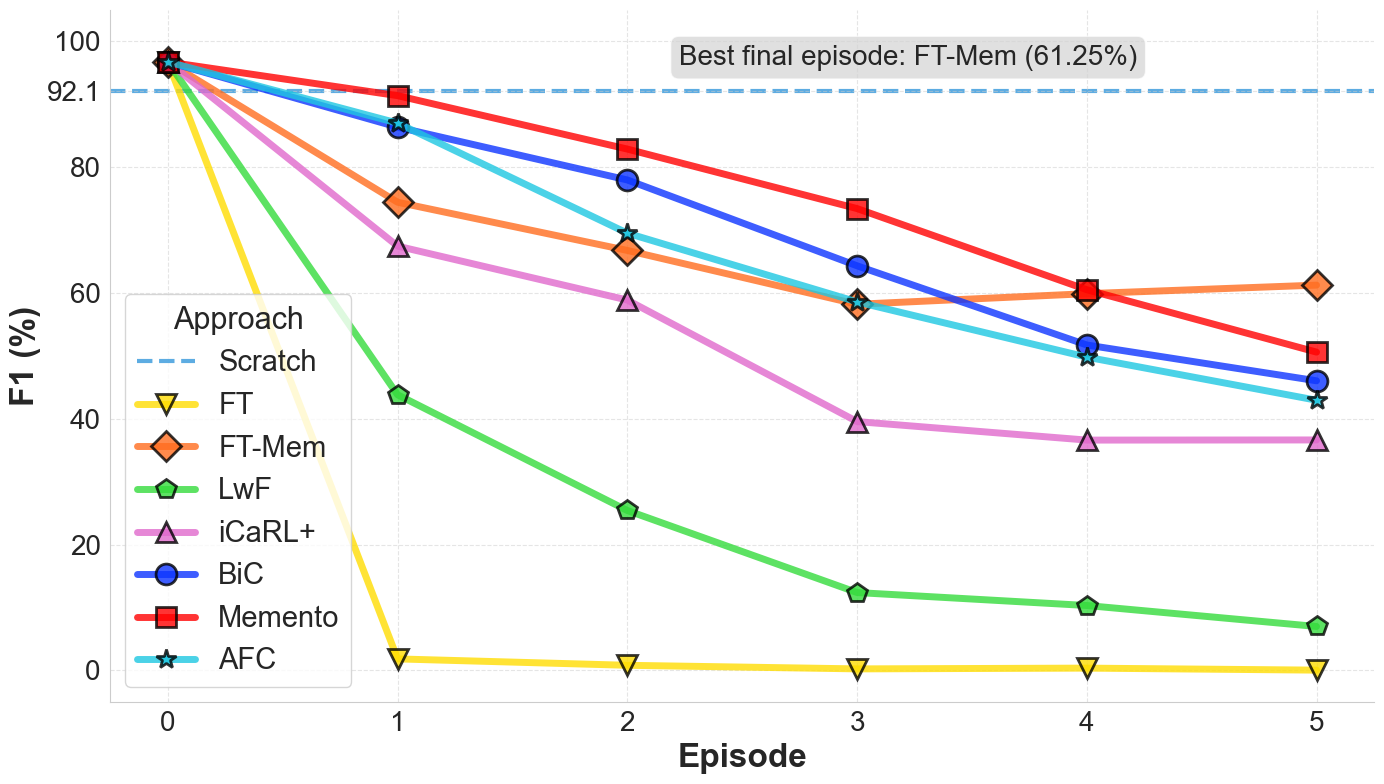

   8 approcci, 6 episodi per Old

Processando dataset type: New
Trovate 350 righe per New
   Salvato: f1_score_6_classi_no_upperbound_new.pdf


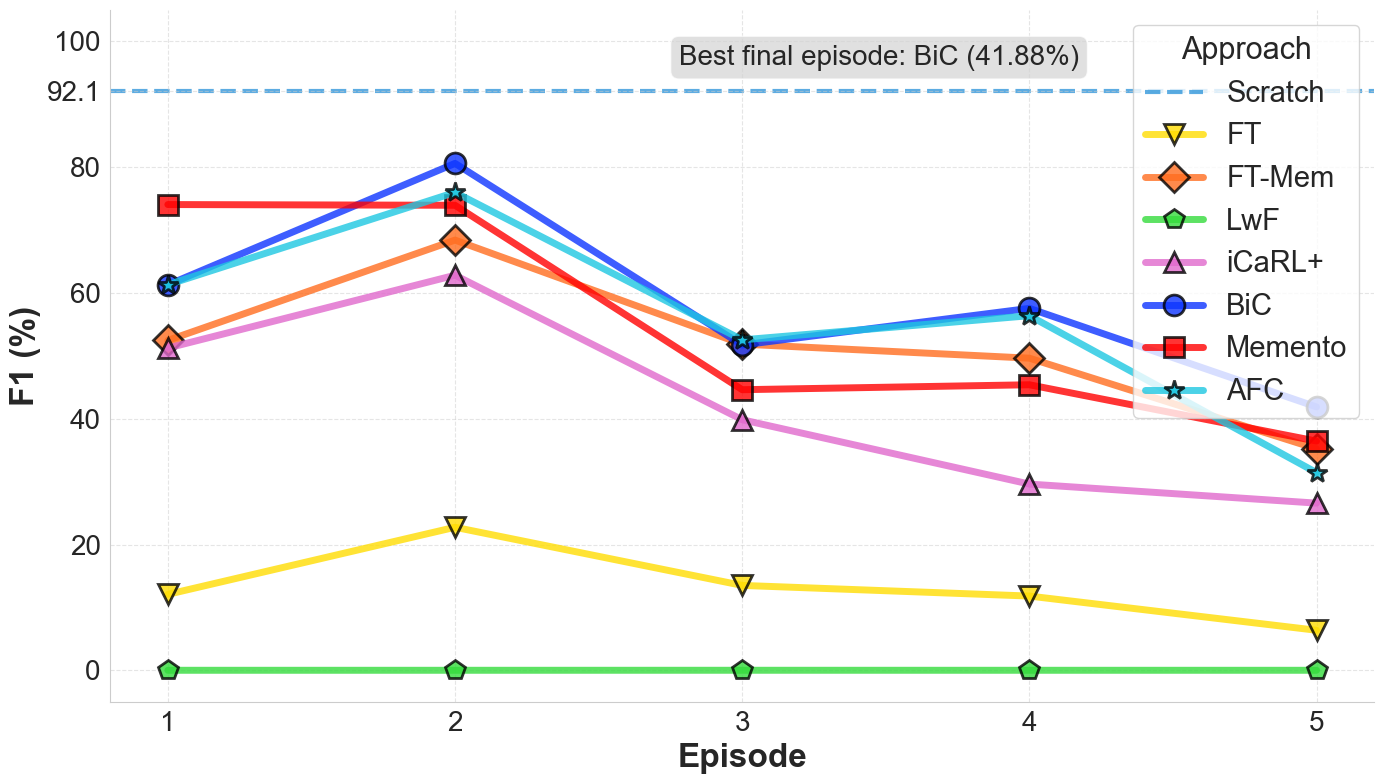

   7 approcci, 5 episodi per New

Processando dataset type: All
Trovate 1640 righe per All
   Salvato: f1_score_6_classi_no_upperbound_all.pdf


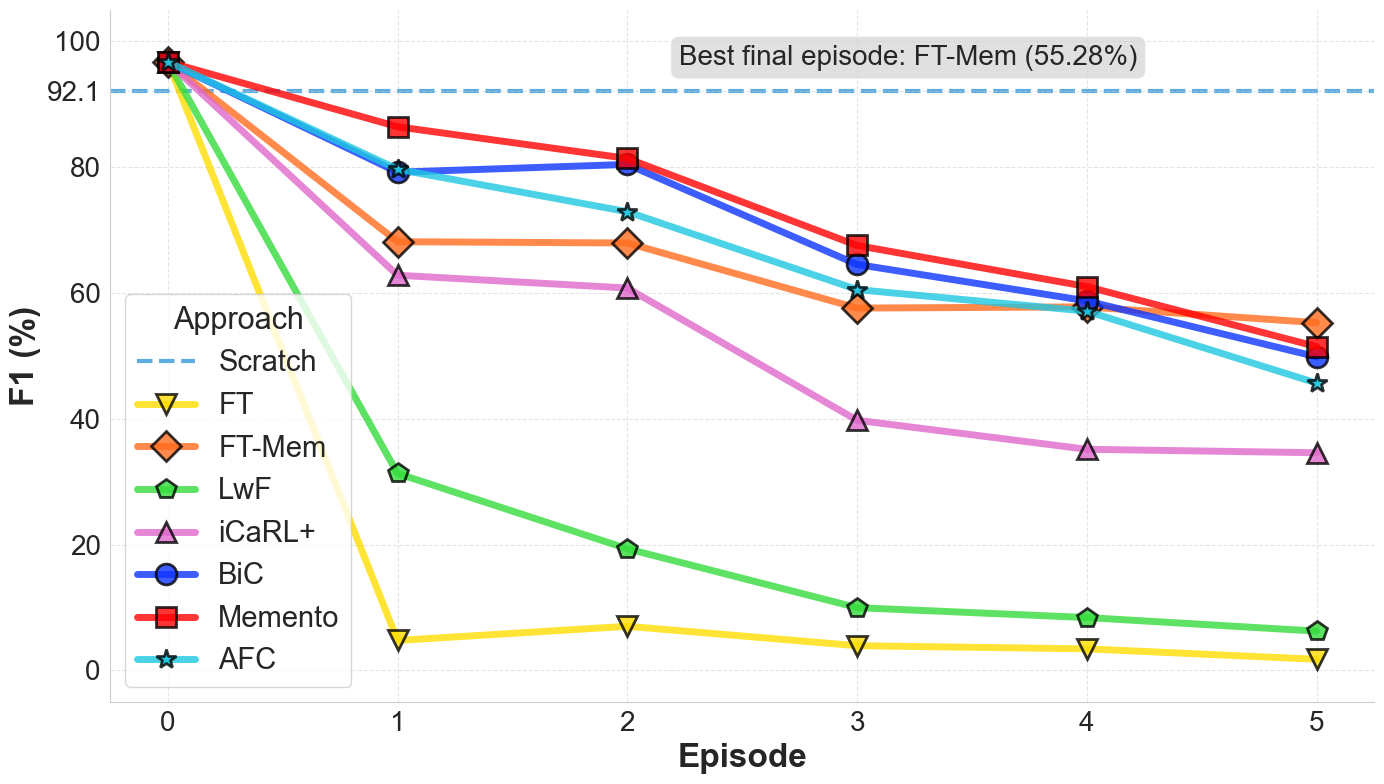

   8 approcci, 6 episodi per All
    Generati grafici per 3 tipi di dataset
• Old: 8 approcci, 6 episodi
• New: 7 approcci, 5 episodi
• All: 8 approcci, 6 episodi


In [117]:
def create_lineplot_6_classi(df, metric='F1', upperbound=True):
    """Crea line plot per scenari 6_classi (multi-episodio) separati per tipo di dataset"""

    # Carica i dati di Scratch 11 classi per la linea di riferimento
    scratch_11_path = '/Users/luca/Desktop/Data Analysis & Cybersecurity/mykonos/results_proposal/images/in_sdn_scratch_scratch_11_classi'
    pattern_11 = os.path.join(scratch_11_path, '**', 'material', '*.parquet')
    files_11 = glob.glob(pattern_11, recursive=True)

    scratch_11_data = []
    if files_11:
        print(f"Trovati {len(files_11)} file per Scratch 11 classi")
        for file_path in files_11:
            try:
                df_11 = pd.read_parquet(file_path)
                info = extract_info_from_path(file_path)
                for key, value in info.items():
                    df_11[key] = value
                df_11['scenario'] = '11_classes'
                scratch_11_data.append(df_11)
            except Exception as e:
                print(f"Errore nel caricare {file_path}: {e}")

    # Calcola il valore di riferimento di Scratch 11 classi
    scratch_11_ref_value = None
    if scratch_11_data:
        combined_scratch_11 = pd.concat(scratch_11_data, ignore_index=True)
        
        # Scegli la colonna corretta in base alla metrica
        if metric == 'F1':
            score_column = 'F1 Score'
        elif metric == 'BA':
            score_column = 'Balanced Accuracy'
        else:
            print(f"Metrica {metric} non riconosciuta")
            return None

        scratch_11_filtered = combined_scratch_11[
            (combined_scratch_11['approach'] == 'Scratch') & 
            (combined_scratch_11['Episode'] == 0) &
            (combined_scratch_11['upperbound'] == upperbound) &
            (combined_scratch_11[score_column].notna())
        ]
        
        if not scratch_11_filtered.empty:
            scratch_11_ref_value = scratch_11_filtered[score_column].mean()
            print(f"Valore di riferimento Scratch 11 classi: {scratch_11_ref_value:.2f}%")


    # Filtra i dati per scenario 6_classi, metrica e upperbound
    df_filtered = df[
        (df['scenario'] == '6_classi') &
        (df['metric'] == metric) &
        (df['upperbound'] == upperbound)
    ].copy()

    if df_filtered.empty:
        print(f"Nessun dato trovato per {metric}, upperbound={upperbound}, scenario=6_classi")
        return None

    # Verifica che ci sia una colonna Episode
    if 'Episode' not in df_filtered.columns:
        print("Colonna 'Episode' non trovata nei dati")
        return None

    # Scegli la colonna corretta in base alla metrica
    if metric == 'F1':
        score_column = 'F1 Score'
    elif metric == 'BA':
        score_column = 'Balanced Accuracy'
    else:
        print(f"Metrica {metric} non riconosciuta")
        return None

    # Verifica che la colonna esista
    if score_column not in df_filtered.columns:
        print(f"Colonna {score_column} non trovata nei dati")
        return None

    # Rimuovi righe con valori NaN
    df_filtered = df_filtered.dropna(subset=[score_column])

    if df_filtered.empty:
        print(f"Nessun dato valido (non-NaN) trovato per {metric}")
        return None

    # Usa la colonna Type esistente nel dataframe
    if 'Type' not in df_filtered.columns:
        print("Colonna 'Type' non trovata nei dati")
        print(f"Colonne disponibili: {df_filtered.columns.tolist()}")
        return None

    # Controlla i valori unici nella colonna Type
    print(f"Valori unici nella colonna Type: {df_filtered['Type'].unique()}")

    # Determina i tipi di dataset disponibili dalla colonna Type
    available_types = df_filtered['Type'].unique()
    dataset_types = []
    
    # Aggiungi i tipi effettivamente presenti nei dati
    if 'Old' in available_types:
        dataset_types.append('Old')
    if 'New' in available_types:
        dataset_types.append('New')
    
    # Aggiungi sempre 'All' per vedere tutti i dati combinati
    dataset_types.append('All')

    print(f"Tipi di dataset da processare: {dataset_types}")


    all_stats = {}

    for dataset_type in dataset_types:
        print(f"\nProcessando dataset type: {dataset_type}")
        
        # Filtra per tipo di dataset
        if dataset_type == 'All':
            type_filtered = df_filtered.copy()
        else:
            type_filtered = df_filtered[df_filtered['Type'] == dataset_type].copy()

        if type_filtered.empty:
            print(f"   Nessun dato trovato per type={dataset_type}")
            continue

        print(f"Trovate {len(type_filtered)} righe per {dataset_type}")

        # Raggruppa per approccio ed episodio
        stats = type_filtered.groupby(['approach', 'Episode']).agg({
            score_column: ['mean', 'std', 'count']
        }).round(3)

        stats.columns = ['mean', 'std', 'count']
        stats = stats.reset_index()
        stats['type'] = dataset_type

        # Salva le statistiche
        all_stats[dataset_type] = stats

        # Crea il grafico per questo tipo
        plt.figure(figsize=(14, 8))

        # Plot manuale per ogni approccio con marker diversi
        approaches = stats['approach'].unique()

        # Ordina gli approcci con Scratch per primo
        custom_order = ['Scratch', 'FT', 'FT-Mem', 'LwF', 'iCaRL+', 'BiC', 'Memento', 'AFC']
        ordered_approaches = []
        for desired_approach in custom_order:
            if desired_approach in approaches:
                ordered_approaches.append(desired_approach)
        # Aggiungi eventuali approcci non nella lista personalizzata
        for approach in approaches:
            if approach not in ordered_approaches:
                ordered_approaches.append(approach)

        # PRIMA aggiungi la linea di riferimento di Scratch 11 classi (se disponibile)
        if scratch_11_ref_value is not None:
            episodes = sorted(stats['Episode'].unique())
            plt.axhline(
                y=scratch_11_ref_value, 
                color='#3498DB', 
                linestyle='--', 
                linewidth=3,
                alpha=0.8,
                label='Scratch',  # Questo apparirà per primo nella legenda
                zorder=0
            )

        # POI aggiungi le linee degli altri approcci
        for approach in ordered_approaches:
            approach_data = stats[stats['approach'] == approach]
            
            # Ottieni colore e marker per questo approccio
            color = approach_colors.get(approach, 'gray')
            marker = approach_markers.get(approach, 'o')  # Default: cerchio
            
            # Non aggiungere label per Scratch (sarà già nella legenda dalla linea orizzontale)
            label = None if approach.lower() == 'scratch' else approach
            
            plt.plot(
                approach_data['Episode'],
                approach_data['mean'],
                marker=marker,
                markersize=15,
                linewidth=5,
                alpha=0.8,
                color=color,
                label=label,  # None per Scratch, nome per gli altri
                markeredgecolor='black',  # Bordino nero sui marker
                markeredgewidth=2
            )

        # SPOSTA FUORI DAL LOOP: Aggiungi il valore di Scratch come ytick UNA SOLA VOLTA
        if scratch_11_ref_value is not None:
            current_yticks = plt.gca().get_yticks()
            new_yticks = list(current_yticks) + [scratch_11_ref_value]
            new_yticks = sorted(set(new_yticks))  # Rimuovi duplicati e ordina
            
            plt.gca().set_yticks(new_yticks)
            
            # Personalizza le etichette dei yticks per evidenziare il valore di Scratch
            ytick_labels = []
            for tick in new_yticks:
                if abs(tick - scratch_11_ref_value) < 0.1:  # Se è il tick di Scratch
                    ytick_labels.append(f'{scratch_11_ref_value:.1f}')
                else:
                    ytick_labels.append(f'{tick:.0f}')
            
            plt.gca().set_yticklabels(ytick_labels)



        # Personalizza il grafico
        # Imposta i tick degli episodi come interi
        episodes = sorted(stats['Episode'].unique())
        plt.xticks(episodes, fontsize=20)
        plt.yticks(fontsize=20)
        plt.ylim(-5, 105)  # Imposta limiti Y da -5 a 105


        #upperbound_text = "(with upperbound)" if upperbound else ""
        #type_text = f" - {dataset_type} Dataset" if dataset_type != 'All' else " - All Data"
        #plt.title(f'{metric} Score per Episode - 6 Classes scenario {upperbound_text}{type_text}',
        #         fontsize=26, fontweight='bold', pad=20)
        plt.xlabel('Episode', fontsize=24, fontweight='bold')
        plt.ylabel(f'{metric} (%)', fontsize=24, fontweight='bold')

        # Configura la legenda
        plt.legend(title='Approach', title_fontsize=22, fontsize=21,
                   loc='best', frameon=True, fancybox=True, shadow=False)

        # Aggiungi griglia
        plt.grid(True, alpha=0.5, linestyle='--')
        plt.gca().set_axisbelow(True)

        # Rimuovi spine superiore e destra
        sns.despine()

        # Imposta i tick degli episodi come interi
        episodes = sorted(stats['Episode'].unique())
        plt.xticks(episodes, fontsize=20)
        plt.yticks(fontsize=20)
        plt.ylim(-5, 105)

        # Aggiungi informazioni statistiche
        final_episode_stats = stats[stats['Episode'] == max(episodes)]
        if not final_episode_stats.empty:
            best_final = final_episode_stats.loc[final_episode_stats['mean'].idxmax()]

            info_text = f"Best final episode: {best_final['approach']} ({best_final['mean']:.2f}%)"
            plt.text(0.45, 0.95, info_text, transform=plt.gca().transAxes,
                     verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.7),
                     fontsize=20)

        plt.tight_layout()

        # Salva il grafico con suffisso per il tipo
        upperbound_suffix = "_upperbound" if upperbound else "_no_upperbound"
        type_suffix = f"_{dataset_type.lower()}"
        filename = f"{metric.lower()}_score_6_classi{upperbound_suffix}{type_suffix}.pdf"
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, format='pdf', dpi=300, bbox_inches='tight')
        plt.savefig(filepath.replace('.pdf', '.png'), format='png', dpi=300, bbox_inches='tight')

        print(f"   Salvato: {filename}")
        plt.show()

        # Statistiche per questo tipo
        n_approaches = len(stats['approach'].unique())
        n_episodes = len(stats['Episode'].unique())
        print(f"   {n_approaches} approcci, {n_episodes} episodi per {dataset_type}")

    return all_stats

# Genera line plot per scenari 6_classi
print("\\n=== GENERAZIONE LINE PLOT PER SCENARI 6 CLASSI (PER TIPO DATASET) ===")

if not df_all.empty:
    for metric in ['F1']:#, 'BA']:
        for upperbound in [True]:#, False]:
            print(f"\\n Creando line plot per {metric}, upperbound={upperbound}")
            result = create_lineplot_6_classi(df_all, metric=metric, upperbound=False)
            if result is not None:
                print(f"    Generati grafici per {len(result)} tipi di dataset")
                for dataset_type, stats in result.items():
                    if stats is not None and not stats.empty:
                        n_approaches = len(stats['approach'].unique())
                        n_episodes = len(stats['Episode'].unique()) 
                        print(f"• {dataset_type}: {n_approaches} approcci, {n_episodes} episodi")
else:
    print(" Nessun dato disponibile per i line plot")

Creating comparative barplots 
Found 4 files with 11 classes data
Dataset types to process: ['Old', 'New', 'All']
Global Scratch 11 classes upperbound: 92.1%

Processing F1 Score, upperbound=False, type=Old
   Using global Scratch 11 classes upperbound for Old: 92.1%


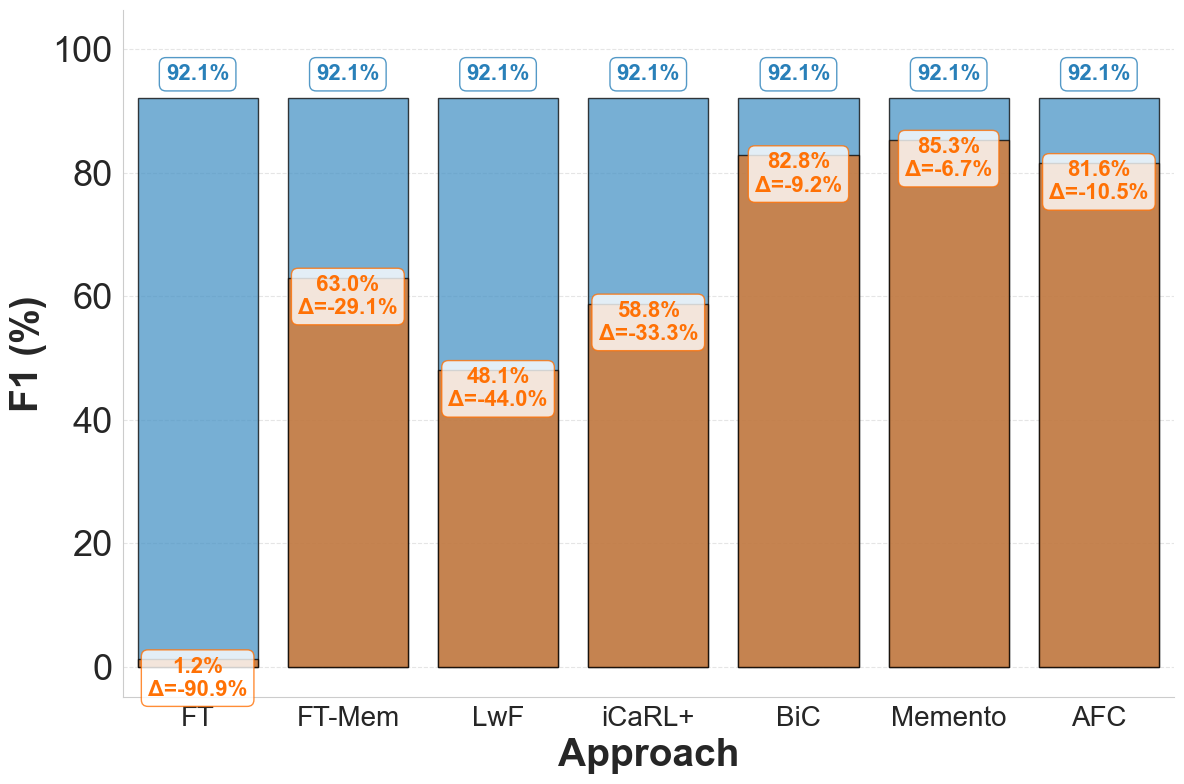

    Saved: f1_score_episode1_vs_scratch11_upperbound_no_upperbound_0to10_old.pdf

   Detailed statistics for F1 Score (without upperbound) - Old:
      Scratch 11 classes upperbound: 92.1%
      FT: Episode 1 = 1.2% vs Upperbound = 92.1% (Gap: Δ==+90.9%, +98.7%)
      FT-Mem: Episode 1 = 63.0% vs Upperbound = 92.1% (Gap: Δ==+29.1%, +31.6%)
      LwF: Episode 1 = 48.1% vs Upperbound = 92.1% (Gap: Δ==+44.0%, +47.8%)
      iCaRL+: Episode 1 = 58.8% vs Upperbound = 92.1% (Gap: Δ==+33.3%, +36.1%)
      BiC: Episode 1 = 82.8% vs Upperbound = 92.1% (Gap: Δ==+9.2%, +10.0%)
      Memento: Episode 1 = 85.3% vs Upperbound = 92.1% (Gap: Δ==+6.7%, +7.3%)
      AFC: Episode 1 = 81.6% vs Upperbound = 92.1% (Gap: Δ==+10.5%, +11.4%)

Processing F1 Score, upperbound=False, type=New
   Using global Scratch 11 classes upperbound for New: 92.1%


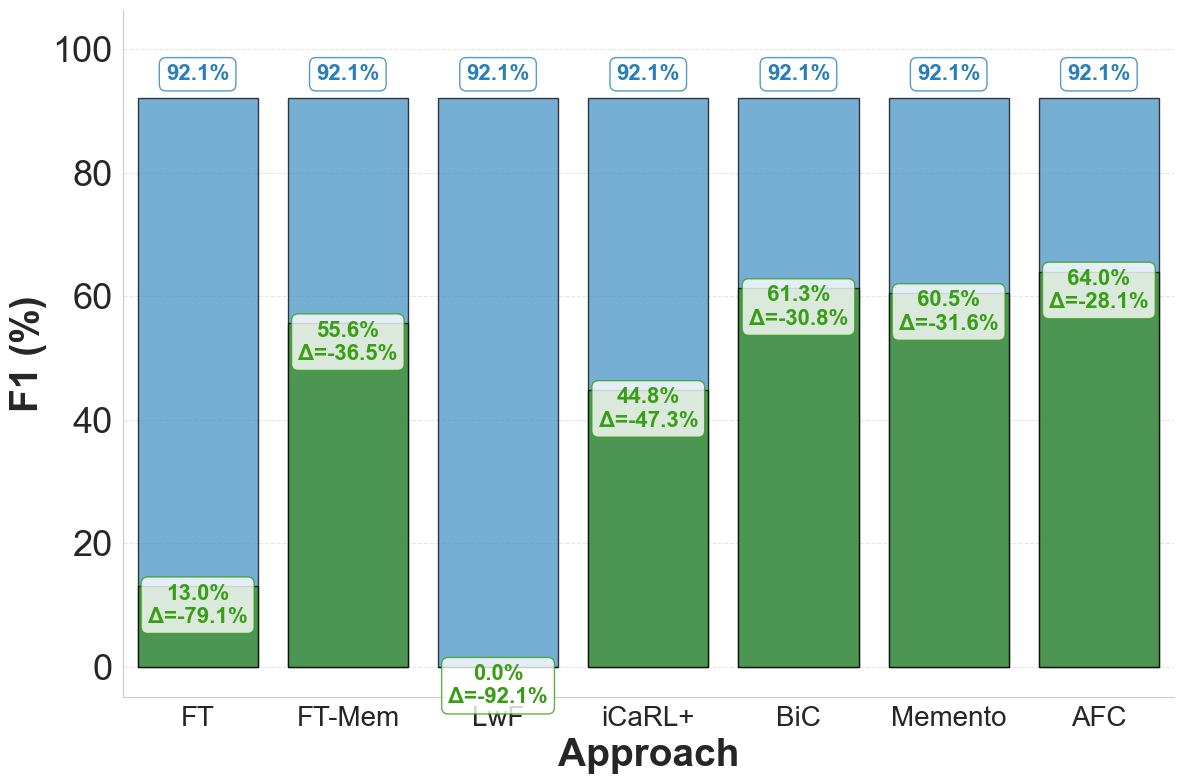

    Saved: f1_score_episode1_vs_scratch11_upperbound_no_upperbound_0to10_new.pdf

   Detailed statistics for F1 Score (without upperbound) - New:
      Scratch 11 classes upperbound: 92.1%
      FT: Episode 1 = 13.0% vs Upperbound = 92.1% (Gap: Δ==+79.1%, +85.8%)
      FT-Mem: Episode 1 = 55.6% vs Upperbound = 92.1% (Gap: Δ==+36.5%, +39.6%)
      LwF: Episode 1 = 0.0% vs Upperbound = 92.1% (Gap: Δ==+92.1%, +100.0%)
      iCaRL+: Episode 1 = 44.8% vs Upperbound = 92.1% (Gap: Δ==+47.3%, +51.3%)
      BiC: Episode 1 = 61.3% vs Upperbound = 92.1% (Gap: Δ==+30.8%, +33.4%)
      Memento: Episode 1 = 60.5% vs Upperbound = 92.1% (Gap: Δ==+31.6%, +34.3%)
      AFC: Episode 1 = 64.0% vs Upperbound = 92.1% (Gap: Δ==+28.1%, +30.5%)

Processing F1 Score, upperbound=False, type=All
   Using global Scratch 11 classes upperbound for All: 92.1%


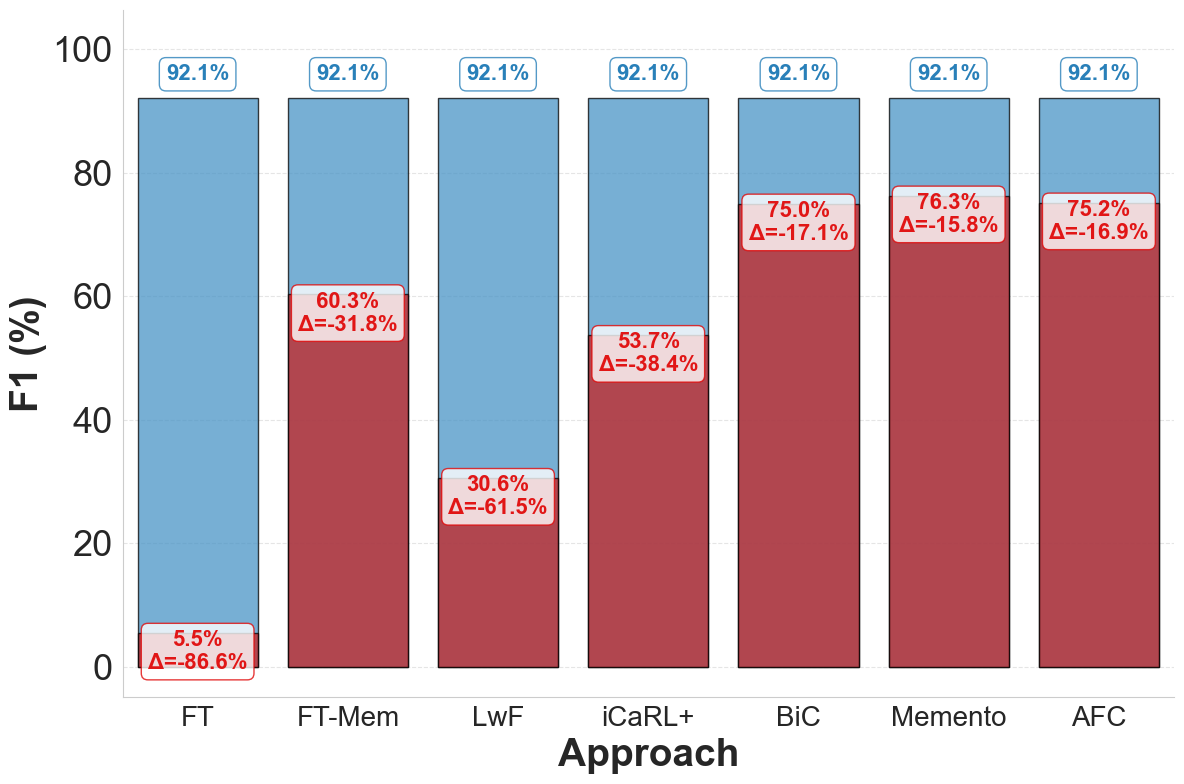

    Saved: f1_score_episode1_vs_scratch11_upperbound_no_upperbound_0to10_all.pdf

   Detailed statistics for F1 Score (without upperbound) - All:
      Scratch 11 classes upperbound: 92.1%
      FT: Episode 1 = 5.5% vs Upperbound = 92.1% (Gap: Δ==+86.6%, +94.0%)
      FT-Mem: Episode 1 = 60.3% vs Upperbound = 92.1% (Gap: Δ==+31.8%, +34.5%)
      LwF: Episode 1 = 30.6% vs Upperbound = 92.1% (Gap: Δ==+61.5%, +66.8%)
      iCaRL+: Episode 1 = 53.7% vs Upperbound = 92.1% (Gap: Δ==+38.4%, +41.7%)
      BiC: Episode 1 = 75.0% vs Upperbound = 92.1% (Gap: Δ==+17.1%, +18.5%)
      Memento: Episode 1 = 76.3% vs Upperbound = 92.1% (Gap: Δ==+15.8%, +17.1%)
      AFC: Episode 1 = 75.2% vs Upperbound = 92.1% (Gap: Δ==+16.9%, +18.4%)
Global Scratch 11 classes upperbound: 91.8%

Processing Balanced Accuracy, upperbound=False, type=Old
   Using global Scratch 11 classes upperbound for Old: 91.8%


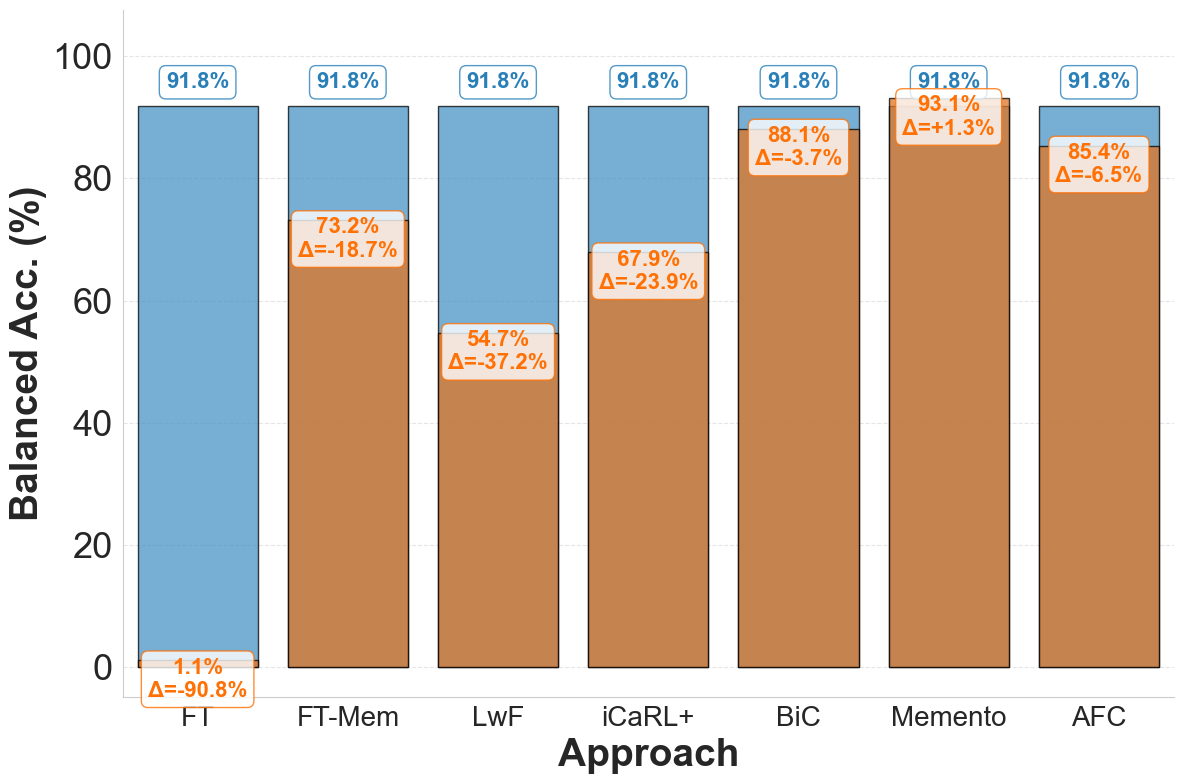

    Saved: balanced_accuracy_episode1_vs_scratch11_upperbound_no_upperbound_0to10_old.pdf

   Detailed statistics for Balanced Accuracy (without upperbound) - Old:
      Scratch 11 classes upperbound: 91.8%
      FT: Episode 1 = 1.1% vs Upperbound = 91.8% (Gap: Δ==+90.8%, +98.9%)
      FT-Mem: Episode 1 = 73.2% vs Upperbound = 91.8% (Gap: Δ==+18.7%, +20.3%)
      LwF: Episode 1 = 54.7% vs Upperbound = 91.8% (Gap: Δ==+37.2%, +40.5%)
      iCaRL+: Episode 1 = 67.9% vs Upperbound = 91.8% (Gap: Δ==+23.9%, +26.1%)
      BiC: Episode 1 = 88.1% vs Upperbound = 91.8% (Gap: Δ==+3.7%, +4.0%)
      Memento: Episode 1 = 93.1% vs Upperbound = 91.8% (Gap: Δ==-1.3%, -1.4%)
      AFC: Episode 1 = 85.4% vs Upperbound = 91.8% (Gap: Δ==+6.5%, +7.1%)

Processing Balanced Accuracy, upperbound=False, type=New
   Using global Scratch 11 classes upperbound for New: 91.8%


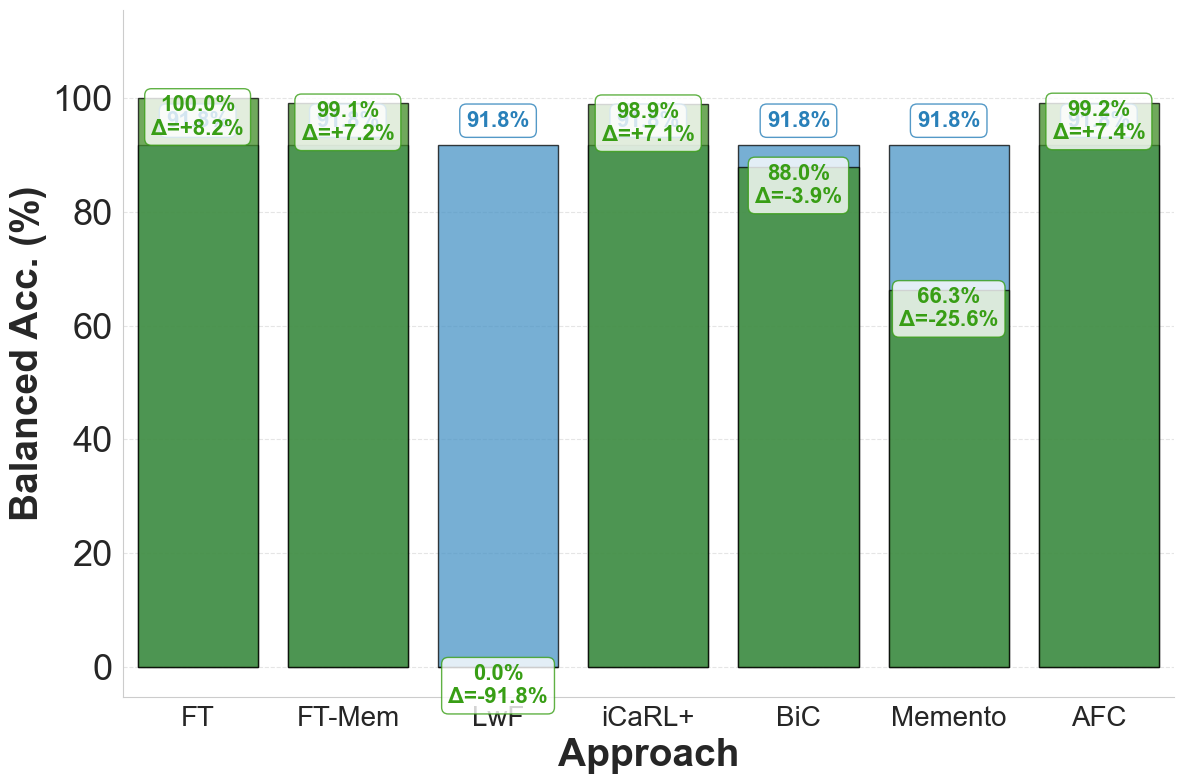

    Saved: balanced_accuracy_episode1_vs_scratch11_upperbound_no_upperbound_0to10_new.pdf

   Detailed statistics for Balanced Accuracy (without upperbound) - New:
      Scratch 11 classes upperbound: 91.8%
      FT: Episode 1 = 100.0% vs Upperbound = 91.8% (Gap: Δ==-8.2%, -8.9%)
      FT-Mem: Episode 1 = 99.1% vs Upperbound = 91.8% (Gap: Δ==-7.2%, -7.9%)
      LwF: Episode 1 = 0.0% vs Upperbound = 91.8% (Gap: Δ==+91.8%, +100.0%)
      iCaRL+: Episode 1 = 98.9% vs Upperbound = 91.8% (Gap: Δ==-7.1%, -7.7%)
      BiC: Episode 1 = 88.0% vs Upperbound = 91.8% (Gap: Δ==+3.9%, +4.2%)
      Memento: Episode 1 = 66.3% vs Upperbound = 91.8% (Gap: Δ==+25.6%, +27.9%)
      AFC: Episode 1 = 99.2% vs Upperbound = 91.8% (Gap: Δ==-7.4%, -8.0%)

Processing Balanced Accuracy, upperbound=False, type=All
   Using global Scratch 11 classes upperbound for All: 91.8%


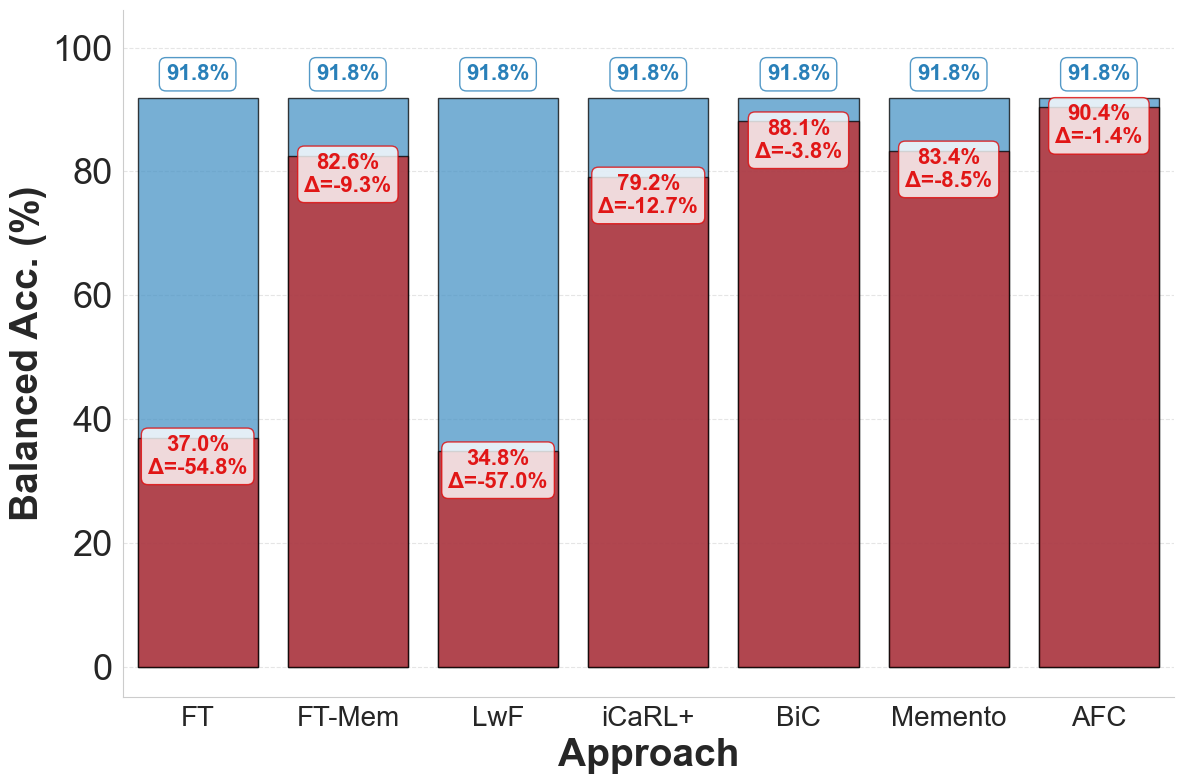

    Saved: balanced_accuracy_episode1_vs_scratch11_upperbound_no_upperbound_0to10_all.pdf

   Detailed statistics for Balanced Accuracy (without upperbound) - All:
      Scratch 11 classes upperbound: 91.8%
      FT: Episode 1 = 37.0% vs Upperbound = 91.8% (Gap: Δ==+54.8%, +59.7%)
      FT-Mem: Episode 1 = 82.6% vs Upperbound = 91.8% (Gap: Δ==+9.3%, +10.1%)
      LwF: Episode 1 = 34.8% vs Upperbound = 91.8% (Gap: Δ==+57.0%, +62.1%)
      iCaRL+: Episode 1 = 79.2% vs Upperbound = 91.8% (Gap: Δ==+12.7%, +13.8%)
      BiC: Episode 1 = 88.1% vs Upperbound = 91.8% (Gap: Δ==+3.8%, +4.1%)
      Memento: Episode 1 = 83.4% vs Upperbound = 91.8% (Gap: Δ==+8.5%, +9.2%)
      AFC: Episode 1 = 90.4% vs Upperbound = 91.8% (Gap: Δ==+1.4%, +1.6%)


In [85]:
def create_individual_barplots_0to10(df, output_dir='results_proposal_seaborn'):
    """Creates comparative barplots with Episode 1 vs Scratch 11 classes as upperbound for each Type"""


    episode1_colors = {
    'Old': "#FF7105",    
    'All': "#E00808EE",    
    'New': "#389E15"     
    }      


    print("Creating comparative barplots ")

    # Load Scratch 11 classes data first
    scratch_11_path = '/Users/luca/Desktop/Data Analysis & Cybersecurity/mykonos/results_proposal/images/in_sdn_scratch_scratch_11_classi'
    pattern_11 = os.path.join(scratch_11_path, '**', 'material', '*.parquet')
    files_11 = glob.glob(pattern_11, recursive=True)

    scratch_11_data = []
    if files_11:
        print(f"Found {len(files_11)} files with 11 classes data")
        for file_path in files_11:
            try:
                df_11 = pd.read_parquet(file_path)
                info = extract_info_from_path(file_path)
                for key, value in info.items():
                    df_11[key] = value
                df_11['scenario'] = '11_classes'
                scratch_11_data.append(df_11)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    # Combine original data with Scratch 11 classes
    all_data = [df]
    if scratch_11_data:
        all_data.extend(scratch_11_data)

    combined_df = pd.concat(all_data, ignore_index=True)

    # Filter only 0to10 scenarios OR 11_classes scenarios
    df_filtered = combined_df[
        (combined_df['scenario'].str.contains('0to10')) |
        (combined_df['scenario'] == '11_classes')
    ].copy()

    if df_filtered.empty:
        print("No data found for 0to10 or 11_classes scenarios")
        return

    # Ensure Episode column exists
    if 'Episode' not in df_filtered.columns:
        print("'Episode' column not found")
        return

    # Filtra solo Episode 1 per i dati principali e Episode 0 per Scratch 11 classes
    df_episodes = df_filtered[
        ((df_filtered['Episode'] == 1) & (df_filtered['scenario'].str.contains('0to10'))) |
        ((df_filtered['Episode'] == 0) & (df_filtered['scenario'] == '11_classes'))
    ].copy()

    if df_episodes.empty:
        print("No data found for episodes 1 and Scratch 11 classes")
        return

    # Aggiungi logica per i tipi di dataset
    if 'Type' not in df_episodes.columns:
        print("'Type' column not found")
        return

    # Determina i tipi di dataset disponibili
    available_types = df_episodes['Type'].unique()
    classes_types = []
    
    if 'Old' in available_types:
        classes_types.append('Old')
    if 'New' in available_types:
        classes_types.append('New')
    classes_types.append('All')  # Sempre incluso per vedere tutti i dati

    print(f"Dataset types to process: {classes_types}")

    # For each metric/upperbound combination
    for metric in ['F1 Score', 'Balanced Accuracy']:
        for upperbound in [False]:#, True]:
            # Calcola il valore di Scratch 11 classes UNA VOLTA SOLA (usando tutti i dati)
            scratch_11_global = df_episodes[
                (df_episodes['approach'] == 'Scratch') & 
                (df_episodes['scenario'] == '11_classes') &
                (df_episodes['Episode'] == 0) &
                (df_episodes['upperbound'] == upperbound)
            ]
            
            scratch_11_upperbound = None
            if not scratch_11_global.empty:
                scratch_11_upperbound = scratch_11_global[metric].mean()
                print(f"Global Scratch 11 classes upperbound: {scratch_11_upperbound:.1f}%")

            # Loop per ogni tipo di dataset
            for classes_type in classes_types:
                print(f"\nProcessing {metric}, upperbound={upperbound}, type={classes_type}")
                
                # Filtra per tipo di dataset
                if classes_type == 'All':
                    subset = df_episodes[
                        (df_episodes['upperbound'] == upperbound) & 
                        (df_episodes['Type'] != 'Base')  # Escludi Base
                    ]
                else:
                    subset = df_episodes[
                        (df_episodes['upperbound'] == upperbound) & 
                        (df_episodes['Type'] == classes_type)
                    ]
                
                if subset.empty:
                    print(f"   No data for {classes_type} type")
                    continue

                upperbound_label = "upperbound" if upperbound else "no_upperbound"
                type_suffix = f"_{classes_type.lower()}"

                if scratch_11_upperbound is not None:
                    print(f"   Using global Scratch 11 classes upperbound for {classes_type}: {scratch_11_upperbound:.1f}%")

                # Prepare data for plotting
                plot_data = []

                # Prima aggiungi la barra blu di Scratch 11 classes per tutti gli approcci
                subset_0to10 = subset[subset['scenario'].str.contains('0to10')]
                approaches_0to10 = subset_0to10['approach'].unique()
                
                # Order approaches: Scratch first, then others alphabetically
                #scratch_approaches = [app for app in approaches_0to10 if 'scratch' in app.lower()]
                #other_approaches = sorted([app for app in approaches_0to10 if 'scratch' not in app.lower()])

                # Ordine personalizzato specifico
                custom_order = ['Scratch', 'FT', 'FT-Mem', 'LwF', 'iCaRL+', 'BiC', 'Memento', 'AFC']
                ordered_approaches = []
                for desired_approach in custom_order:
                    if desired_approach in approaches_0to10:
                        ordered_approaches.append(desired_approach)
                # Aggiungi eventuali approcci non nella lista personalizzata
                for approach in approaches_0to10:
                    if approach not in ordered_approaches:
                        ordered_approaches.append(approach)

                for approach in ordered_approaches:
                    # Aggiungi la barra blu (Scratch 11 classes upperbound GLOBALE) per ogni approccio
                    if scratch_11_upperbound is not None:
                        plot_data.append({
                            'Approach': approach,
                            'Episode': 'Scratch 11 classes',  # Barra blu
                            'Score': scratch_11_upperbound,  # STESSO VALORE PER TUTTI
                            'std': 0,  # No std for upperbound
                            'count': 1
                        })

                    # Aggiungi Episode 1 per questo approccio
                    approach_data = subset_0to10[subset_0to10['approach'] == approach]
                    ep1_data = approach_data[approach_data['Episode'] == 1]

                    if not ep1_data.empty:
                        plot_data.append({
                            'Approach': approach,
                            'Episode': 'Episode 1',  # Barra rossa
                            'Score': ep1_data[metric].mean(),
                            'std': ep1_data[metric].std(),
                            'count': len(ep1_data)
                        })

                if not plot_data:
                    print(f"   No plot data for {classes_type}")
                    continue

                plot_df = pd.DataFrame(plot_data)

                episode1_color = episode1_colors.get(classes_type, '#EF1A02')  # Rosso di default se non Old/All

                # Create the plot
                plt.figure(figsize=(12, 8))

                # Cambia i colori - blu per upperbound, rosso per Episode 1
                ax = sns.barplot(
                    data=plot_df,
                    x='Approach',
                    y='Score',
                    hue='Episode',
                    palette=['#3498DB', episode1_color],  # Barra blu e barra dinamica
                    alpha=0.75,
                    dodge=False,
                    edgecolor='black',
                    linewidth=1
                )

                # Add value annotations con delta da Scratch 11 classes
                approach_positions = {approach: i for i, approach in enumerate(plot_df['Approach'].unique())}

                for _, row in plot_df.iterrows():
                    approach = row['Approach']
                    episode = row['Episode']
                    x_pos = approach_positions[approach]

                    # Position text based on episode type
                    if episode == 'Scratch 11 classes':
                        y_offset = 10
                        text_color = '#2980B9'
                        va = 'bottom'
                        # Per l'upperbound mostra solo il valore
                        annotation_text = f"{row['Score']:.1f}%"
                    else:  # Episode 1
                        y_offset = 2
                        text_color = episode1_color  # Usa colore dinamico
                        va = 'top'
                        if scratch_11_upperbound is not None:
                            delta = row['Score'] - scratch_11_upperbound
                            annotation_text = f"{row['Score']:.1f}%\nΔ={delta:+.1f}%"
                        else:
                            annotation_text = f"{row['Score']:.1f}%"

                    if row['Score'] is not None and pd.notna(row['Score']):
                        ax.annotate(
                            annotation_text,
                            xy=(x_pos, row['Score']),
                            xytext=(0, y_offset),
                            textcoords='offset points',
                            ha='center',
                            va=va,
                            fontsize=16,
                            fontweight='bold',
                            color=text_color,
                            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor=text_color)
                        )

                # Calculate performance gap for each approach
                performance_stats = []
                unique_approaches = plot_df['Approach'].unique()

                for approach in unique_approaches:
                    approach_data = plot_df[plot_df['Approach'] == approach]
                    upperbound_score = approach_data[approach_data['Episode'] == 'Scratch 11 classes']['Score'].values
                    ep1_score = approach_data[approach_data['Episode'] == 'Episode 1']['Score'].values

                    if len(upperbound_score) > 0 and len(ep1_score) > 0:
                        gap = upperbound_score[0] - ep1_score[0]
                        gap_pct = (gap / upperbound_score[0]) * 100 if upperbound_score[0] > 0 else 0
                        
                        performance_stats.append({
                            'approach': approach,
                            'upperbound': upperbound_score[0],
                            'ep1': ep1_score[0],
                            'gap': gap,
                            'gap_pct': gap_pct
                        })

                # Customization con font più grandi
                metric_short = metric.replace(' Score', '').replace(' Accuracy', ' Acc.')
                type_text = f" - {classes_type} Dataset" if classes_type != 'All' else " - All Data"
                #plt.title(f'{metric_short}: Episode 1 vs Scratch 11 classes upperbound ({"with" if upperbound else "without"} upperbound){type_text}',
                #        fontsize=32, fontweight='bold', pad=30)
                plt.xlabel('Approach', fontsize=28, fontweight='bold')
                plt.ylabel(f'{metric_short} (%)', fontsize=28, fontweight='bold')
                plt.xticks(fontsize=20)
                plt.yticks(fontsize=26)

                # Grid for better readability
                ax.grid(True, alpha=0.5, linestyle='--', axis='y')
                ax.set_axisbelow(True)

                # Update legend labels
                handles, labels = ax.get_legend_handles_labels()
                ax.legend(handles, labels, fontsize=18, loc='upper right')

                # Remove spines
                sns.despine()

                # Adjust y-axis to accommodate annotations
                y_min, y_max = ax.get_ylim()
                ax.set_ylim(y_min - (y_max - y_min) * 0.05, y_max + (y_max - y_min) * 0.1)

                ax.get_legend().remove() 
                plt.tight_layout()

                #Save with type suffix
                filename = f'{metric.lower().replace(" ", "_")}_episode1_vs_scratch11_upperbound_{upperbound_label}_0to10{type_suffix}.pdf'
                filepath = os.path.join(output_dir, filename)
                plt.savefig(filepath, dpi=300, bbox_inches='tight')
                plt.savefig(filepath.replace('.pdf', '.png'), format='png', dpi=300, bbox_inches='tight')
                plt.show()
                print(f"    Saved: {filename}")

                # Print detailed statistics con performance gap
                print(f"\n   Detailed statistics for {metric} ({'with' if upperbound else 'without'} upperbound) - {classes_type}:")
                if scratch_11_upperbound is not None:
                    print(f"      Scratch 11 classes upperbound: {scratch_11_upperbound:.1f}%")
                
                for stat in performance_stats:
                    print(f"      {stat['approach']}: Episode 1 = {stat['ep1']:.1f}% vs Upperbound = {stat['upperbound']:.1f}% "
                          f"(Gap: Δ=={stat['gap']:+.1f}%, {stat['gap_pct']:+.1f}%)")


create_individual_barplots_0to10(df_all, output_dir)

In [ ]:
# Order approaches: Scratch first, then others alphabetically
scratch_approaches = [app for app in approaches_0to10 if 'scratch' in app.lower()]
other_approaches = sorted([app for app in approaches_0to10 if 'scratch' not in app.lower()])
ordered_approaches = scratch_approaches + other_approaches

Creating comparative barplots for 6_SINGLE scenario
Found 4 files with 11 classes data
Dataset types to process: ['Old', 'New', 'All']
Global Scratch 11 classes upperbound: 92.1%

Processing F1 Score, upperbound=False, type=Old
   Using global Scratch 11 classes upperbound for Old: 92.1%


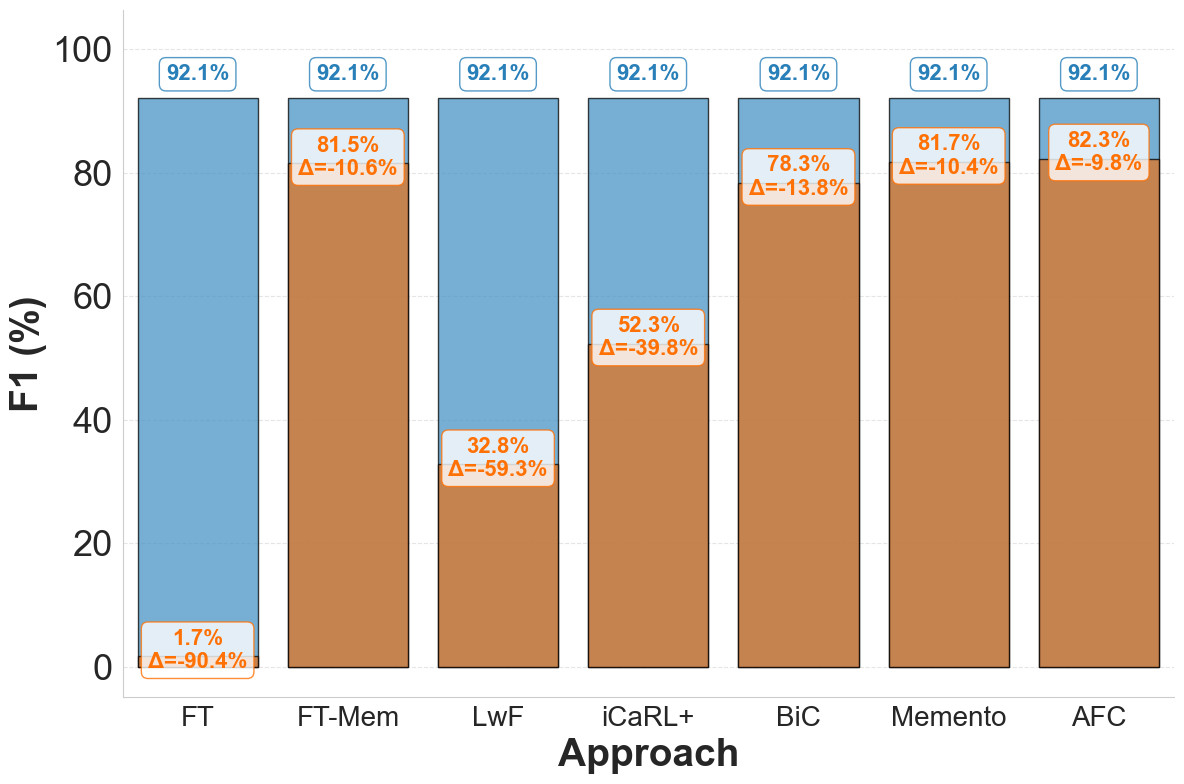

    Saved: f1_score_episode1_vs_scratch11_upperbound_no_upperbound_6_single_old.pdf

   Detailed statistics for F1 Score (without upperbound) - Old:
      Scratch 11 classes upperbound: 92.1%
      FT: Episode 1 = 1.7% vs Upperbound = 92.1% (Gap: Δ==+90.4%, +98.2%)
      FT-Mem: Episode 1 = 81.5% vs Upperbound = 92.1% (Gap: Δ==+10.6%, +11.5%)
      LwF: Episode 1 = 32.8% vs Upperbound = 92.1% (Gap: Δ==+59.3%, +64.4%)
      iCaRL+: Episode 1 = 52.3% vs Upperbound = 92.1% (Gap: Δ==+39.8%, +43.2%)
      BiC: Episode 1 = 78.3% vs Upperbound = 92.1% (Gap: Δ==+13.8%, +14.9%)
      Memento: Episode 1 = 81.7% vs Upperbound = 92.1% (Gap: Δ==+10.4%, +11.3%)
      AFC: Episode 1 = 82.3% vs Upperbound = 92.1% (Gap: Δ==+9.8%, +10.6%)

Processing F1 Score, upperbound=False, type=New
   Using global Scratch 11 classes upperbound for New: 92.1%


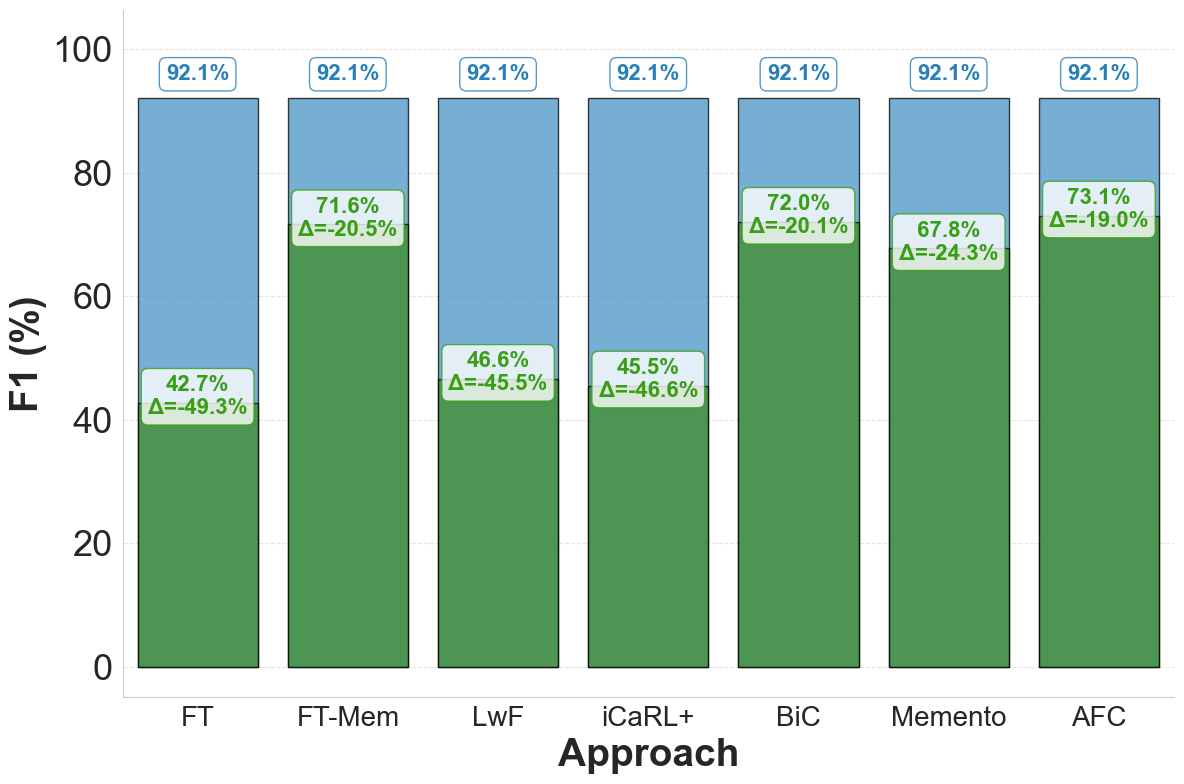

    Saved: f1_score_episode1_vs_scratch11_upperbound_no_upperbound_6_single_new.pdf

   Detailed statistics for F1 Score (without upperbound) - New:
      Scratch 11 classes upperbound: 92.1%
      FT: Episode 1 = 42.7% vs Upperbound = 92.1% (Gap: Δ==+49.3%, +53.6%)
      FT-Mem: Episode 1 = 71.6% vs Upperbound = 92.1% (Gap: Δ==+20.5%, +22.2%)
      LwF: Episode 1 = 46.6% vs Upperbound = 92.1% (Gap: Δ==+45.5%, +49.4%)
      iCaRL+: Episode 1 = 45.5% vs Upperbound = 92.1% (Gap: Δ==+46.6%, +50.6%)
      BiC: Episode 1 = 72.0% vs Upperbound = 92.1% (Gap: Δ==+20.1%, +21.8%)
      Memento: Episode 1 = 67.8% vs Upperbound = 92.1% (Gap: Δ==+24.3%, +26.4%)
      AFC: Episode 1 = 73.1% vs Upperbound = 92.1% (Gap: Δ==+19.0%, +20.7%)

Processing F1 Score, upperbound=False, type=All
   Using global Scratch 11 classes upperbound for All: 92.1%


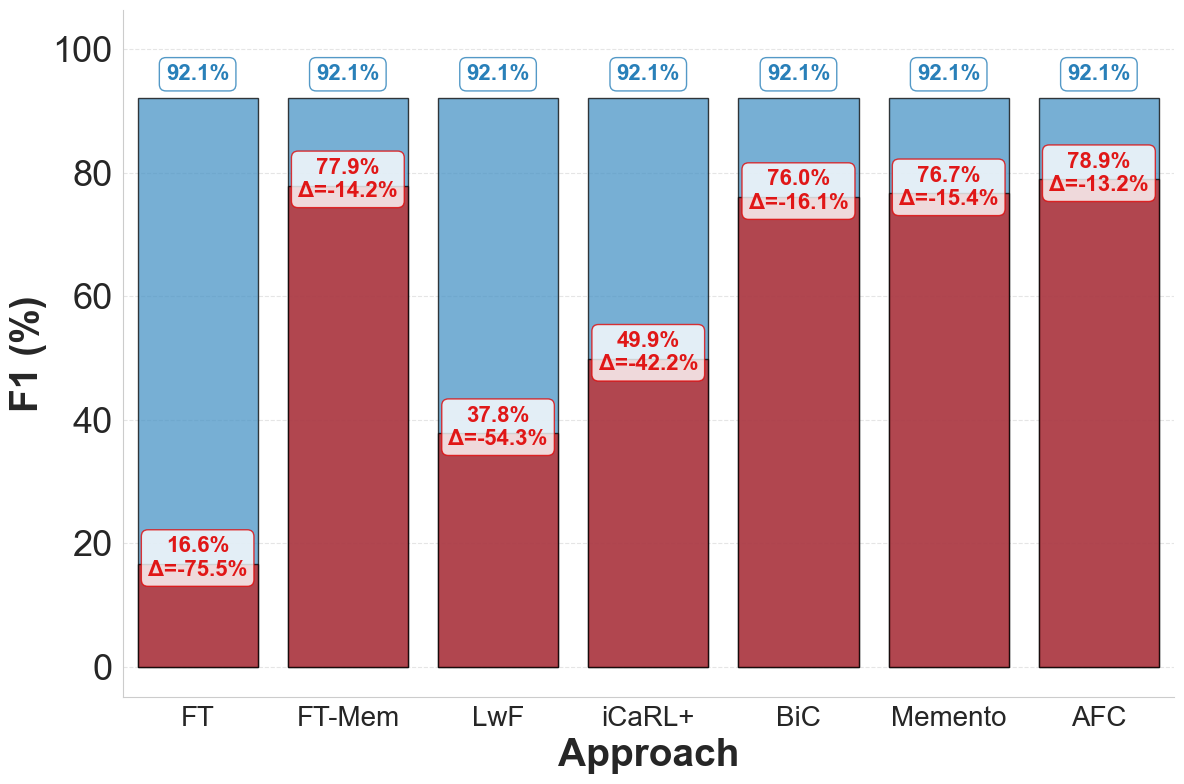

    Saved: f1_score_episode1_vs_scratch11_upperbound_no_upperbound_6_single_all.pdf

   Detailed statistics for F1 Score (without upperbound) - All:
      Scratch 11 classes upperbound: 92.1%
      FT: Episode 1 = 16.6% vs Upperbound = 92.1% (Gap: Δ==+75.5%, +82.0%)
      FT-Mem: Episode 1 = 77.9% vs Upperbound = 92.1% (Gap: Δ==+14.2%, +15.4%)
      LwF: Episode 1 = 37.8% vs Upperbound = 92.1% (Gap: Δ==+54.3%, +58.9%)
      iCaRL+: Episode 1 = 49.9% vs Upperbound = 92.1% (Gap: Δ==+42.2%, +45.9%)
      BiC: Episode 1 = 76.0% vs Upperbound = 92.1% (Gap: Δ==+16.1%, +17.4%)
      Memento: Episode 1 = 76.7% vs Upperbound = 92.1% (Gap: Δ==+15.4%, +16.8%)
      AFC: Episode 1 = 78.9% vs Upperbound = 92.1% (Gap: Δ==+13.2%, +14.3%)
Global Scratch 11 classes upperbound: 91.8%

Processing Balanced Accuracy, upperbound=False, type=Old
   Using global Scratch 11 classes upperbound for Old: 91.8%


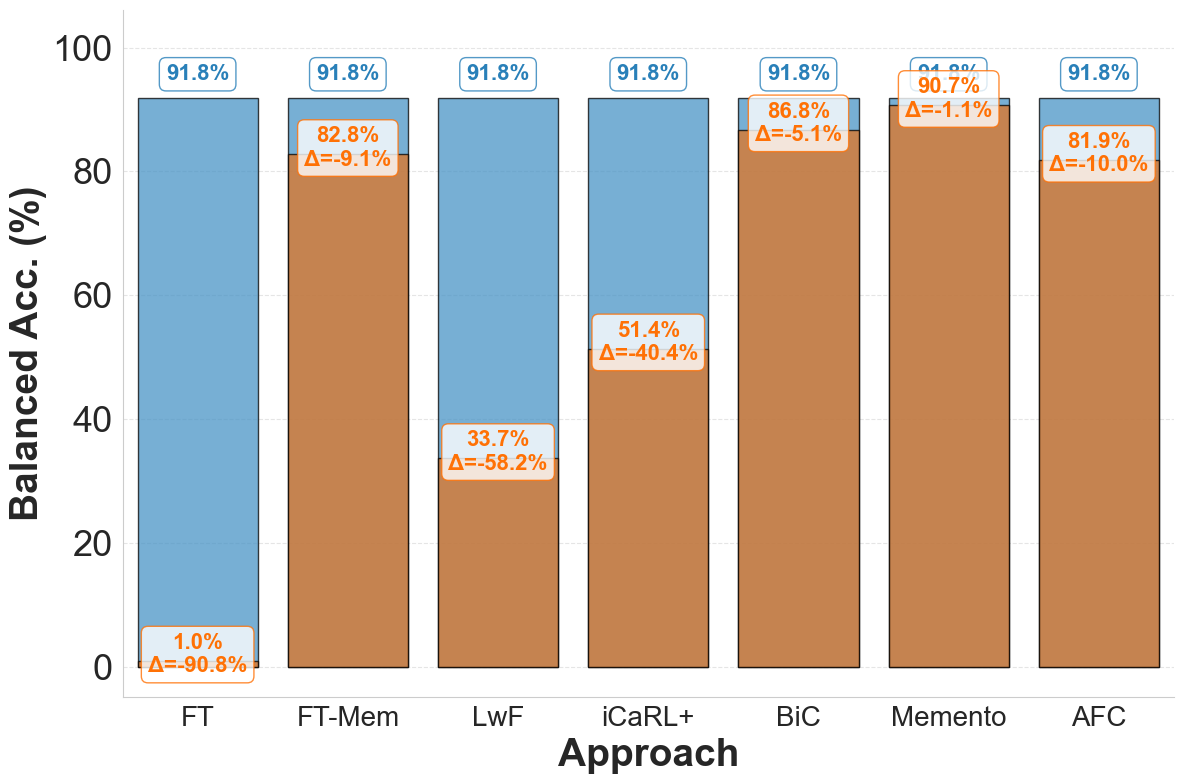

    Saved: balanced_accuracy_episode1_vs_scratch11_upperbound_no_upperbound_6_single_old.pdf

   Detailed statistics for Balanced Accuracy (without upperbound) - Old:
      Scratch 11 classes upperbound: 91.8%
      FT: Episode 1 = 1.0% vs Upperbound = 91.8% (Gap: Δ==+90.8%, +98.9%)
      FT-Mem: Episode 1 = 82.8% vs Upperbound = 91.8% (Gap: Δ==+9.1%, +9.9%)
      LwF: Episode 1 = 33.7% vs Upperbound = 91.8% (Gap: Δ==+58.2%, +63.3%)
      iCaRL+: Episode 1 = 51.4% vs Upperbound = 91.8% (Gap: Δ==+40.4%, +44.0%)
      BiC: Episode 1 = 86.8% vs Upperbound = 91.8% (Gap: Δ==+5.1%, +5.5%)
      Memento: Episode 1 = 90.7% vs Upperbound = 91.8% (Gap: Δ==+1.1%, +1.2%)
      AFC: Episode 1 = 81.9% vs Upperbound = 91.8% (Gap: Δ==+10.0%, +10.9%)

Processing Balanced Accuracy, upperbound=False, type=New
   Using global Scratch 11 classes upperbound for New: 91.8%


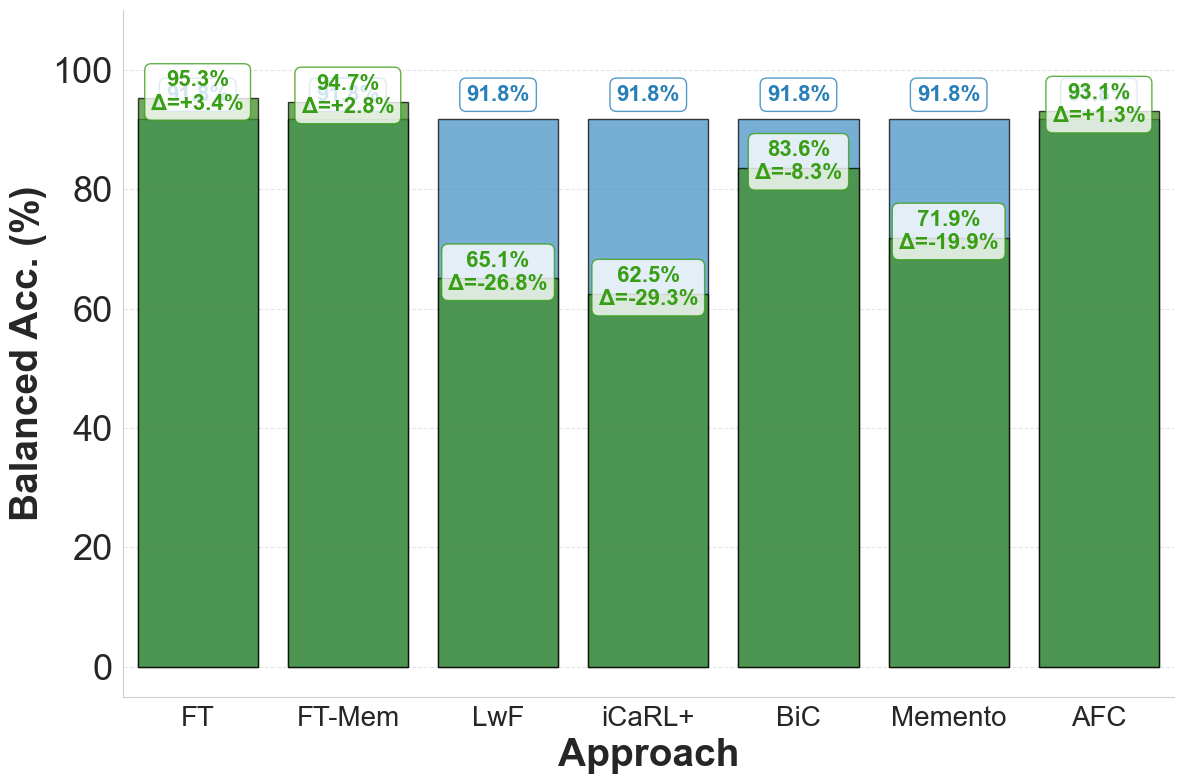

    Saved: balanced_accuracy_episode1_vs_scratch11_upperbound_no_upperbound_6_single_new.pdf

   Detailed statistics for Balanced Accuracy (without upperbound) - New:
      Scratch 11 classes upperbound: 91.8%
      FT: Episode 1 = 95.3% vs Upperbound = 91.8% (Gap: Δ==-3.4%, -3.7%)
      FT-Mem: Episode 1 = 94.7% vs Upperbound = 91.8% (Gap: Δ==-2.8%, -3.1%)
      LwF: Episode 1 = 65.1% vs Upperbound = 91.8% (Gap: Δ==+26.8%, +29.2%)
      iCaRL+: Episode 1 = 62.5% vs Upperbound = 91.8% (Gap: Δ==+29.3%, +32.0%)
      BiC: Episode 1 = 83.6% vs Upperbound = 91.8% (Gap: Δ==+8.3%, +9.0%)
      Memento: Episode 1 = 71.9% vs Upperbound = 91.8% (Gap: Δ==+19.9%, +21.7%)
      AFC: Episode 1 = 93.1% vs Upperbound = 91.8% (Gap: Δ==-1.3%, -1.4%)

Processing Balanced Accuracy, upperbound=False, type=All
   Using global Scratch 11 classes upperbound for All: 91.8%


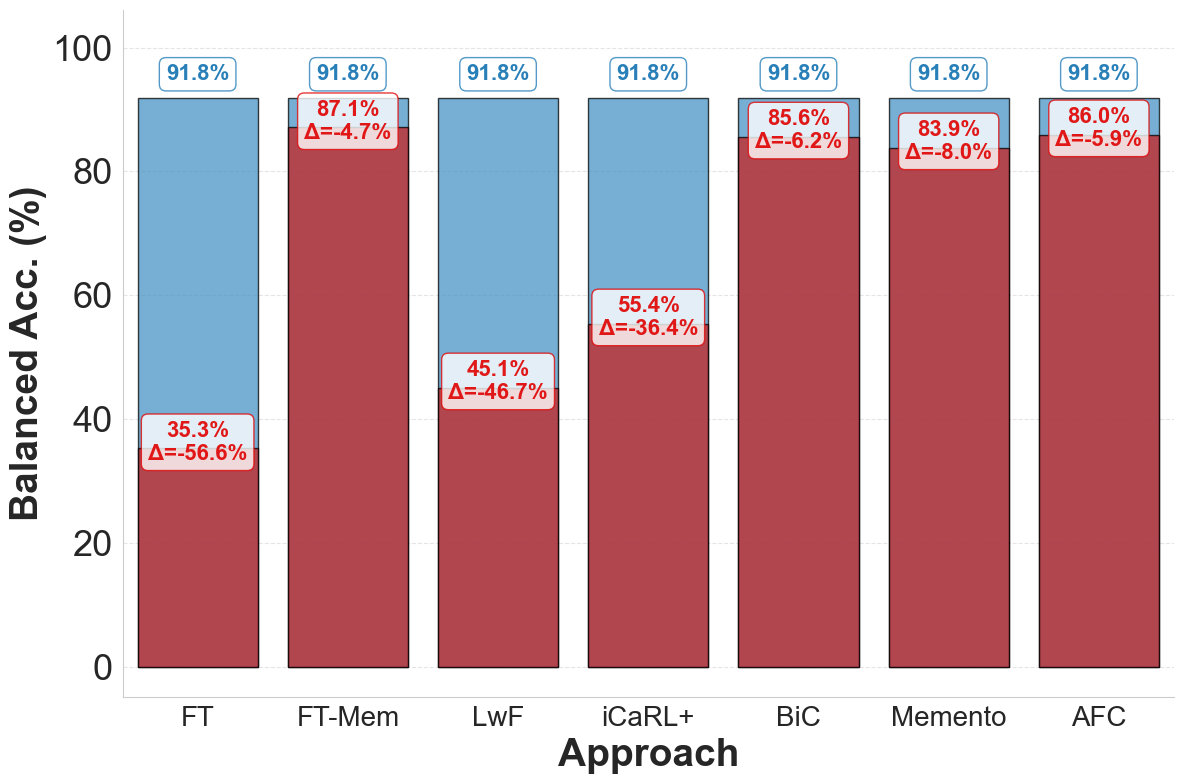

    Saved: balanced_accuracy_episode1_vs_scratch11_upperbound_no_upperbound_6_single_all.pdf

   Detailed statistics for Balanced Accuracy (without upperbound) - All:
      Scratch 11 classes upperbound: 91.8%
      FT: Episode 1 = 35.3% vs Upperbound = 91.8% (Gap: Δ==+56.6%, +61.6%)
      FT-Mem: Episode 1 = 87.1% vs Upperbound = 91.8% (Gap: Δ==+4.7%, +5.1%)
      LwF: Episode 1 = 45.1% vs Upperbound = 91.8% (Gap: Δ==+46.7%, +50.9%)
      iCaRL+: Episode 1 = 55.4% vs Upperbound = 91.8% (Gap: Δ==+36.4%, +39.6%)
      BiC: Episode 1 = 85.6% vs Upperbound = 91.8% (Gap: Δ==+6.2%, +6.8%)
      Memento: Episode 1 = 83.9% vs Upperbound = 91.8% (Gap: Δ==+8.0%, +8.7%)
      AFC: Episode 1 = 86.0% vs Upperbound = 91.8% (Gap: Δ==+5.9%, +6.4%)


In [83]:
def create_individual_barplots_6_single(df, output_dir='results_proposal_seaborn'):
    """Creates comparative barplots with Episode 1 vs Scratch 11 classes as upperbound for each Type - 6_SINGLE scenario"""

    episode1_colors = {
        'Old': "#FF7105",    
        'All': "#E00808EE",    
        'New': "#389E15"     
    }      

    print("Creating comparative barplots for 6_SINGLE scenario")

    # Load Scratch 11 classes data first
    scratch_11_path = '/Users/luca/Desktop/Data Analysis & Cybersecurity/mykonos/results_proposal/images/in_sdn_scratch_scratch_11_classi'
    pattern_11 = os.path.join(scratch_11_path, '**', 'material', '*.parquet')
    files_11 = glob.glob(pattern_11, recursive=True)

    scratch_11_data = []
    if files_11:
        print(f"Found {len(files_11)} files with 11 classes data")
        for file_path in files_11:
            try:
                df_11 = pd.read_parquet(file_path)
                info = extract_info_from_path(file_path)
                for key, value in info.items():
                    df_11[key] = value
                df_11['scenario'] = '11_classes'
                scratch_11_data.append(df_11)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    # Combine original data with Scratch 11 classes
    all_data = [df]
    if scratch_11_data:
        all_data.extend(scratch_11_data)

    combined_df = pd.concat(all_data, ignore_index=True)

    # Filter only 6_SINGLE scenarios OR 11_classes scenarios
    df_filtered = combined_df[
        (combined_df['scenario'].str.contains('6_SINGLE', case=False, na=False)) |
        (combined_df['scenario'] == '11_classes')
    ].copy()

    if df_filtered.empty:
        print("No data found for 6_SINGLE or 11_classes scenarios")
        return

    # Ensure Episode column exists
    if 'Episode' not in df_filtered.columns:
        print("'Episode' column not found")
        return

    # Filtra solo Episode 1 per i dati principali e Episode 0 per Scratch 11 classes
    df_episodes = df_filtered[
        ((df_filtered['Episode'] == 1) & (df_filtered['scenario'].str.contains('6_SINGLE', case=False, na=False))) |
        ((df_filtered['Episode'] == 0) & (df_filtered['scenario'] == '11_classes'))
    ].copy()

    if df_episodes.empty:
        print("No data found for episodes 1 (6_SINGLE) and Scratch 11 classes")
        return

    # Aggiungi logica per i tipi di dataset
    if 'Type' not in df_episodes.columns:
        print("'Type' column not found")
        return

    # Determina i tipi di dataset disponibili
    available_types = df_episodes['Type'].unique()
    classes_types = []
    
    if 'Old' in available_types:
        classes_types.append('Old')
    if 'New' in available_types:
        classes_types.append('New')
    classes_types.append('All')  # Sempre incluso per vedere tutti i dati

    print(f"Dataset types to process: {classes_types}")

    # For each metric/upperbound combination
    for metric in ['F1 Score', 'Balanced Accuracy']:
        for upperbound in [False]:#, True]:
            # NUOVO: Calcola il valore di Scratch 11 classes UNA VOLTA SOLA (usando tutti i dati)
            scratch_11_global = df_episodes[
                (df_episodes['approach'] == 'Scratch') & 
                (df_episodes['scenario'] == '11_classes') &
                (df_episodes['Episode'] == 0) &
                (df_episodes['upperbound'] == upperbound)
            ]
            
            scratch_11_upperbound = None
            if not scratch_11_global.empty:
                scratch_11_upperbound = scratch_11_global[metric].mean()
                print(f"Global Scratch 11 classes upperbound: {scratch_11_upperbound:.1f}%")

            # Loop per ogni tipo di dataset
            for classes_type in classes_types:
                print(f"\nProcessing {metric}, upperbound={upperbound}, type={classes_type}")
                
                # Filtra per tipo di dataset
                if classes_type == 'All':
                    subset = df_episodes[df_episodes['upperbound'] == upperbound]
                else:
                    subset = df_episodes[
                        (df_episodes['upperbound'] == upperbound) & 
                        (df_episodes['Type'] == classes_type)
                    ]
                
                if subset.empty:
                    print(f"   No data for {classes_type} type")
                    continue

                upperbound_label = "upperbound" if upperbound else "no_upperbound"
                type_suffix = f"_{classes_type.lower()}"

                if scratch_11_upperbound is not None:
                    print(f"   Using global Scratch 11 classes upperbound for {classes_type}: {scratch_11_upperbound:.1f}%")

                # Prepare data for plotting
                plot_data = []

                # Prima aggiungi la barra blu di Scratch 11 classes per tutti gli approcci
                subset_6single = subset[subset['scenario'].str.contains('6_SINGLE', case=False, na=False)]
                approaches_6single = subset_6single['approach'].unique()
                
                # Ordine personalizzato specifico
                custom_order = ['Scratch', 'FT', 'FT-Mem', 'LwF', 'iCaRL+', 'BiC', 'Memento', 'AFC']
                ordered_approaches = []
                for desired_approach in custom_order:
                    if desired_approach in approaches_6single:
                        ordered_approaches.append(desired_approach)
                # Aggiungi eventuali approcci non nella lista personalizzata
                for approach in approaches_6single:
                    if approach not in ordered_approaches:
                        ordered_approaches.append(approach)

                for approach in ordered_approaches:
                    # Aggiungi la barra blu (Scratch 11 classes upperbound GLOBALE) per ogni approccio
                    if scratch_11_upperbound is not None:
                        plot_data.append({
                            'Approach': approach,
                            'Episode': 'Scratch 11 classes',  # Barra blu
                            'Score': scratch_11_upperbound,  # STESSO VALORE PER TUTTI
                            'std': 0,  # No std for upperbound
                            'count': 1
                        })

                    # Aggiungi Episode 1 per questo approccio
                    approach_data = subset_6single[subset_6single['approach'] == approach]
                    ep1_data = approach_data[approach_data['Episode'] == 1]

                    if not ep1_data.empty:
                        plot_data.append({
                            'Approach': approach,
                            'Episode': 'Episode 1',  # Barra rossa
                            'Score': ep1_data[metric].mean(),
                            'std': ep1_data[metric].std(),
                            'count': len(ep1_data)
                        })

                if not plot_data:
                    print(f"   No plot data for {classes_type}")
                    continue

                plot_df = pd.DataFrame(plot_data)

                episode1_color = episode1_colors.get(classes_type, '#EF1A02')  # Rosso di default se non Old/All

                # Create the plot
                plt.figure(figsize=(12, 8))

                # Cambia i colori - blu per upperbound, rosso per Episode 1
                ax = sns.barplot(
                    data=plot_df,
                    x='Approach',
                    y='Score',
                    hue='Episode',
                    palette=['#3498DB', episode1_color],  # Barra blu e barra dinamica
                    alpha=0.75,
                    dodge=False,
                    edgecolor='black',
                    linewidth=1
                )

                # Add value annotations con delta da Scratch 11 classes
                approach_positions = {approach: i for i, approach in enumerate(plot_df['Approach'].unique())}

                for _, row in plot_df.iterrows():
                    approach = row['Approach']
                    episode = row['Episode']
                    x_pos = approach_positions[approach]

                    # Position text based on episode type
                    if episode == 'Scratch 11 classes':
                        y_offset = 10
                        text_color = '#2980B9'
                        va = 'bottom'
                        # Per l'upperbound mostra solo il valore
                        annotation_text = f"{row['Score']:.1f}%"
                    else:  # Episode 1
                        y_offset = 20
                        text_color = episode1_color  # Usa colore dinamico
                        va = 'top'
                        if scratch_11_upperbound is not None:
                            delta = row['Score'] - scratch_11_upperbound
                            annotation_text = f"{row['Score']:.1f}%\nΔ={delta:+.1f}%"
                        else:
                            annotation_text = f"{row['Score']:.1f}%"

                    if row['Score'] is not None and pd.notna(row['Score']):
                        ax.annotate(
                            annotation_text,
                            xy=(x_pos, row['Score']),
                            xytext=(0, y_offset),
                            textcoords='offset points',
                            ha='center',
                            va=va,
                            fontsize=16,
                            fontweight='bold',
                            color=text_color,
                            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor=text_color)
                        )

                # Calculate performance gap for each approach
                performance_stats = []
                unique_approaches = plot_df['Approach'].unique()

                for approach in unique_approaches:
                    approach_data = plot_df[plot_df['Approach'] == approach]
                    upperbound_score = approach_data[approach_data['Episode'] == 'Scratch 11 classes']['Score'].values
                    ep1_score = approach_data[approach_data['Episode'] == 'Episode 1']['Score'].values

                    if len(upperbound_score) > 0 and len(ep1_score) > 0:
                        gap = upperbound_score[0] - ep1_score[0]
                        gap_pct = (gap / upperbound_score[0]) * 100 if upperbound_score[0] > 0 else 0
                        
                        performance_stats.append({
                            'approach': approach,
                            'upperbound': upperbound_score[0],
                            'ep1': ep1_score[0],
                            'gap': gap,
                            'gap_pct': gap_pct
                        })

                # Customization con font più grandi
                metric_short = metric.replace(' Score', '').replace(' Accuracy', ' Acc.')
                type_text = f" - {classes_type} Dataset" if classes_type != 'All' else " - All Data"
                #plt.title(f'{metric_short}: Episode 1 vs Scratch 11 classes upperbound ({"with" if upperbound else "without"} upperbound){type_text}',
                #        fontsize=32, fontweight='bold', pad=30)
                plt.xlabel('Approach', fontsize=28, fontweight='bold')
                plt.ylabel(f'{metric_short} (%)', fontsize=28, fontweight='bold')
                plt.xticks(fontsize=20)
                plt.yticks(fontsize=26)

                # Grid for better readability
                ax.grid(True, alpha=0.5, linestyle='--', axis='y')
                ax.set_axisbelow(True)

                # Update legend labels
                handles, labels = ax.get_legend_handles_labels()
                ax.legend(handles, labels, fontsize=18, loc='upper right')

                # Remove spines
                sns.despine()

                # Adjust y-axis to accommodate annotations
                y_min, y_max = ax.get_ylim()
                ax.set_ylim(y_min - (y_max - y_min) * 0.05, y_max + (y_max - y_min) * 0.1)

                ax.get_legend().remove() 
                plt.tight_layout()

                # Save with type suffix and 6_single identifier
                filename = f'{metric.lower().replace(" ", "_")}_episode1_vs_scratch11_upperbound_{upperbound_label}_6_single{type_suffix}.pdf'
                filepath = os.path.join(output_dir, filename)
                plt.savefig(filepath, dpi=300, bbox_inches='tight')
                plt.savefig(filepath.replace('.pdf', '.png'), format='png', dpi=300, bbox_inches='tight')
                plt.show()
                print(f"    Saved: {filename}")

                # Print detailed statistics con performance gap
                print(f"\n   Detailed statistics for {metric} ({'with' if upperbound else 'without'} upperbound) - {classes_type}:")
                if scratch_11_upperbound is not None:
                    print(f"      Scratch 11 classes upperbound: {scratch_11_upperbound:.1f}%")
                
                for stat in performance_stats:
                    print(f"      {stat['approach']}: Episode 1 = {stat['ep1']:.1f}% vs Upperbound = {stat['upperbound']:.1f}% "
                          f"(Gap: Δ=={stat['gap']:+.1f}%, {stat['gap_pct']:+.1f}%)")


# Esegui la nuova funzione per 6_SINGLE
create_individual_barplots_6_single(df_all, output_dir)